<a href="https://colab.research.google.com/github/webercg/NLP---Daily-News-for-Stock-Market-Prediction/blob/main/Experimentos_%2B_EDA_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importação de bibliotecas

In [2]:
#pip install lazypredict
#pip install googletrans==4.0.0-rc1
#pip install textblob
#pip install vaderSentiment

In [3]:
#Manipulação de dados
import pandas as pd
import numpy as np

#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#Manipulação datas
from datetime import datetime

# Prototipação
from lazypredict.Supervised import LazyClassifier


#Pipeline e pré-process
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier

#Model Tunning
from sklearn.model_selection import GridSearchCV

#Model evaluation
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

C:\Users\HP ZBook 15\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# 2.0 Leitura dos arquivos

## Leitura de Noticias

In [4]:
dicionario_mes = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dec':'12'}

In [5]:
df = pd.DataFrame()

for i in dicionario_mes.keys():
    arquivo = "dataset-2021/" + dicionario_mes[i] + "_GoogleNews_Petr_" + i + "_21.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)

In [6]:
df.head()

title  \
0  A construção naval brasileira tem chances de a...   
1  Refinaria Abreu e Lima da Petrobras, a RNEST p...   
2  5 Dicas de Tony Robbins para Ficar Rico Invest...   
3  Acadêmicos de engenharia Mecânica criam projet...   
4  Multinacional dinamarquesa European Energy faz...   

                      media        date  \
0  CPG Click Petroleo e Gas  01/01/2021   
1  CPG Click Petroleo e Gas  01/01/2021   
2       The Capital Advisor  01/01/2021   
3  CPG Click Petroleo e Gas  01/01/2021   
4  CPG Click Petroleo e Gas  01/01/2021   

                                                desc  
0  Dentre os principais pontos do plano estratégi...  
1  Petrobras informou em fato relevante na última...  
2  O QUE LER AGORA... ibovespa-sobe-021-apos-demi...  
3  Petrobras cancela a venda da fábrica de fertil...  
4  Petrobras encerra sociedade com a Sete Brasil ...

In [7]:
#Transformando coluna data para datetime:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

title            object
media            object
date     datetime64[ns]
desc             object
dtype: object

## Leitura dos pregões

In [8]:
df_petro = pd.read_csv('dataset-2021/Hist_Preço_Petr_2021_.csv', sep='|')
df_petro.head()

Date  Adj Close    Volume  Var%
0  2021-01-04      19.27  74719700  0.02
1  2021-01-05      20.03  95181100  0.04
2  2021-01-06      20.07  96562500  0.00
3  2021-01-07      20.67  56171300  0.03
4  2021-01-08      20.75  67136300  0.00

In [9]:
#Transformando a coluna Date para datetime
df_petro['Date'] = pd.to_datetime(df_petro['Date'])
df_petro.dtypes

Date         datetime64[ns]
Adj Close           float64
Volume                int64
Var%                float64
dtype: object

# 3.0 EDA
**H1:** Há uma média razoável de noticias diárias   - **VERDADEIRO**  
**H2:** Há poucos dias sem noticias na base de dados  - **VERDADEIRO**   
**H3:** Há dias em que o pregão da bolsa não funciona (Finais de Semana) **VERDADEIRO**  
**H4:**  
**H5:**  

## 3.1 H1: Há uma média razoável de noticias diárias

In [10]:
df.date.value_counts()

2021-08-05    10
2021-03-10    10
2021-05-21    10
2021-11-06    10
2021-03-03    10
              ..
2021-03-22     2
2021-04-04     2
2021-02-14     2
2021-08-15     2
2021-07-25     1
Name: date, Length: 327, dtype: int64

In [11]:
# Coletando as datas e as frequencias de noticias:
datas = df.date.value_counts()  
data_df = datas.reset_index()
data_df

index  date
0   2021-08-05    10
1   2021-03-10    10
2   2021-05-21    10
3   2021-11-06    10
4   2021-03-03    10
..         ...   ...
322 2021-03-22     2
323 2021-04-04     2
324 2021-02-14     2
325 2021-08-15     2
326 2021-07-25     1

[327 rows x 2 columns]

In [12]:
#Visualizando os tipos dos dados
data_df.dtypes

index    datetime64[ns]
date              int64
dtype: object

In [13]:
#Alterando para o formato datetime
data_df['index'] = pd.to_datetime(data_df['index'])
data_df

index  date
0   2021-08-05    10
1   2021-03-10    10
2   2021-05-21    10
3   2021-11-06    10
4   2021-03-03    10
..         ...   ...
322 2021-03-22     2
323 2021-04-04     2
324 2021-02-14     2
325 2021-08-15     2
326 2021-07-25     1

[327 rows x 2 columns]

In [14]:
# Organizando o dataframe em ordem cronologica
data_df.sort_values(by = 'index', ascending = True, inplace = True) 
data_df.tail()

index  date
243 2021-12-27    10
100 2021-12-28    10
38  2021-12-29    10
193 2021-12-30    10
58  2021-12-31    10

In [15]:
data_df.describe()

date
count 327.00
mean    9.25
std     1.77
min     1.00
25%    10.00
50%    10.00
75%    10.00
max    10.00

Há uma média de 9.25 (+- 2) noticias por dia

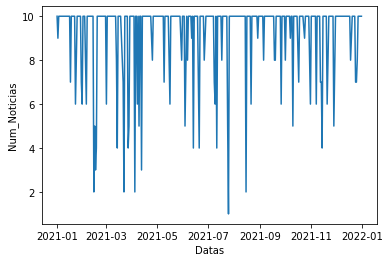

In [16]:
#Visualizando data vs quantidade de notícias
data_df.columns = ['Datas', 'Num_Noticias']
sns.lineplot(x = 'Datas', y = 'Num_Noticias', data = data_df)

In [17]:
# inserindo coluna de mês
data_df['Mes'] = data_df['Datas'].dt.month

# Calculando media de noticias por mês
df_noticia_mes = data_df.groupby('Mes').agg({'Num_Noticias':np.mean})
df_noticia_mes

Num_Noticias
Mes              
1            9.44
2            8.89
3            8.67
4            9.00
5            9.64
6            9.19
7            8.88
8            9.54
9            9.64
10           9.36
11           9.04
12           9.66

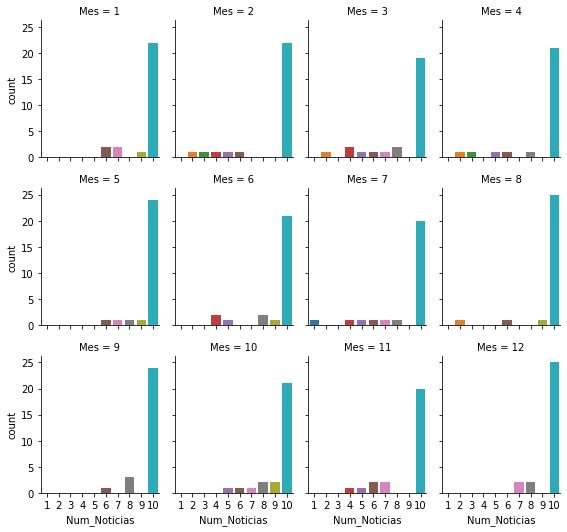

In [18]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
sns.catplot(x="Num_Noticias", col="Mes", col_wrap=4,
                data=data_df,
                kind="count", height=2.5, aspect=.8)

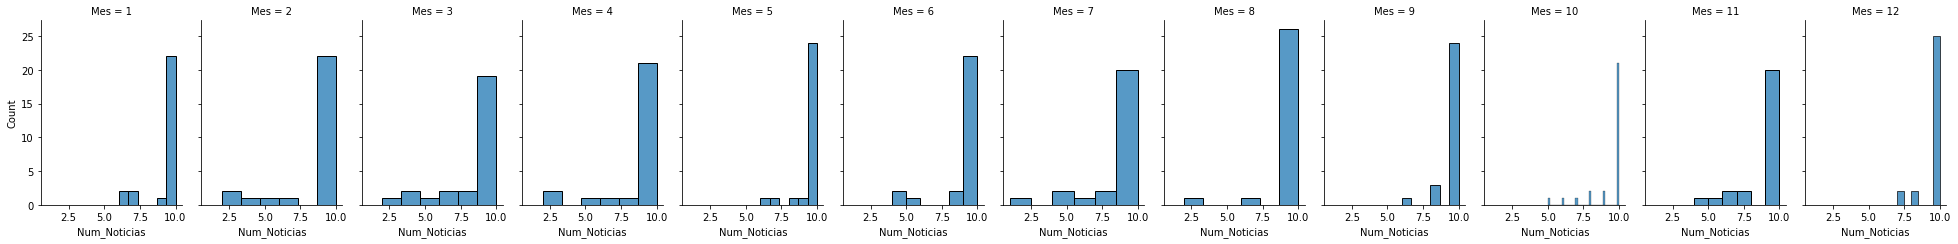

In [19]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
g = sns.FacetGrid(data_df, col="Mes", height=3.5, aspect=.65)
g.map(sns.histplot, "Num_Noticias")

Há poucas ocorrências de baixo numero de noticias por dia, a maior ocorrência da quantidade de noticias por dia é de 10.
Dessa forma, a média de noticias por mês varia de 8.6 á 9.65.

## 3.2 Há poucos dias sem noticias na base de dados

In [20]:
from datetime import datetime

In [21]:
## Gerando uma lista com todos os dias de 2021:
start_date = '01/01/2021'
end_date = '31/12/2021'

#Transformando para o padrão inglês
start_date = datetime.strptime(start_date, '%d/%m/%Y').strftime('%m-%d-%Y')
end_date = datetime.strptime(end_date, '%d/%m/%Y').strftime('%m-%d-%Y')

#Gerando a lista com todas as datas
todas_datas = pd.date_range(start=start_date, end=end_date, freq = '1D')
todas_datas = [i.strftime("%d/%m/%Y") for i in todas_datas ]

In [22]:
#Gerando lista com todas as datas com noticias
datas_com_noticias = [i.strftime("%d/%m/%Y") for i in data_df['Datas'] ]

In [23]:
#Gerando lista com todas as datas sem noticias em 2021
datas_sem_noticias = [i for i in todas_datas if i not in datas_com_noticias]
print("Há %s dias sem notícias em 2021!" % len(datas_sem_noticias))

Há 38 dias sem notícias em 2021!


Em apenas 38 dias de 2021 não houve retorno de noticias diárias da Petrobras

## 3.3 Há dias em que o pregão da bolsa não funciona (Finais de Semana)

In [24]:
datas_com_pregao = [i.strftime("%d/%m/%Y") for i in df_petro['Date'] ]

In [25]:
datas_sem_pregao = [i for i in todas_datas if i not in datas_com_pregao]

In [26]:
print("Há %s dias sem pregão em 2021!" % len(datas_sem_pregao))

Há 118 dias sem pregão em 2021!


# 4.0 Pré-Processamento

## 4.1 Padronização das palavras contidas nos títulos das noticias para minúsculo

In [27]:
df.head()

title  \
0  A construção naval brasileira tem chances de a...   
1  Refinaria Abreu e Lima da Petrobras, a RNEST p...   
2  5 Dicas de Tony Robbins para Ficar Rico Invest...   
3  Acadêmicos de engenharia Mecânica criam projet...   
4  Multinacional dinamarquesa European Energy faz...   

                      media       date  \
0  CPG Click Petroleo e Gas 2021-01-01   
1  CPG Click Petroleo e Gas 2021-01-01   
2       The Capital Advisor 2021-01-01   
3  CPG Click Petroleo e Gas 2021-01-01   
4  CPG Click Petroleo e Gas 2021-01-01   

                                                desc  
0  Dentre os principais pontos do plano estratégi...  
1  Petrobras informou em fato relevante na última...  
2  O QUE LER AGORA... ibovespa-sobe-021-apos-demi...  
3  Petrobras cancela a venda da fábrica de fertil...  
4  Petrobras encerra sociedade com a Sete Brasil ...

In [28]:
df['title'] = df['title'].apply(lambda x: x.lower())
df.head()

title  \
0  a construção naval brasileira tem chances de a...   
1  refinaria abreu e lima da petrobras, a rnest p...   
2  5 dicas de tony robbins para ficar rico invest...   
3  acadêmicos de engenharia mecânica criam projet...   
4  multinacional dinamarquesa european energy faz...   

                      media       date  \
0  CPG Click Petroleo e Gas 2021-01-01   
1  CPG Click Petroleo e Gas 2021-01-01   
2       The Capital Advisor 2021-01-01   
3  CPG Click Petroleo e Gas 2021-01-01   
4  CPG Click Petroleo e Gas 2021-01-01   

                                                desc  
0  Dentre os principais pontos do plano estratégi...  
1  Petrobras informou em fato relevante na última...  
2  O QUE LER AGORA... ibovespa-sobe-021-apos-demi...  
3  Petrobras cancela a venda da fábrica de fertil...  
4  Petrobras encerra sociedade com a Sete Brasil ...

## 4.2 Exclusão noticias que não contenham a palavra chave "Petrobras" no título
Embora tenha-se configurado A biblioteca GoogleNews() para baixar noticias pela palavra chave "Petrobras" pode ocorrer casos em que o termo não é citado no título e nem no corpo da noticia.

In [29]:
df.iloc[2][0]

'5 dicas de tony robbins para ficar rico investindo'

In [30]:
df.iloc[2][3]

'O QUE LER AGORA... ibovespa-sobe-021-apos-demissao-na-petrobras-prio3-.  Notícias. Ibovespa Sobe +0...'

Essa noticia "5 dicas de tony robbins para ficar rico investindo", por exemplo, não possui relação com a petrobras no título e nem no corpo do artigo ao checar direto na fonte em <https://comoinvestir.thecap.com.br/5-dicas-de-tony-robbins-para-ficar-rico-investindo>. A biblioteca GoogleNews() retornou essa noticia, pois, na pagina HTML há noticias recomendadas ao leitor que possuem a palavra chave "petrobras".

Noticias sem a palavra chave "petrobras" no título serão excluidas do dataset

In [31]:
df['title'] = df['title'].apply(lambda x: "" if "petrobras" not in x else x)
df

title  \
0     a construção naval brasileira tem chances de a...   
1     refinaria abreu e lima da petrobras, a rnest p...   
2                                                         
3                                                         
4                                                         
...                                                 ...   
3021  quer trabalhar na petrobras? falta menos de um...   
3022                                                      
3023                                                      
3024  unigel assina contratos para suprimento das fá...   
3025                                                      

                         media       date  \
0     CPG Click Petroleo e Gas 2021-01-01   
1     CPG Click Petroleo e Gas 2021-01-01   
2          The Capital Advisor 2021-01-01   
3     CPG Click Petroleo e Gas 2021-01-01   
4     CPG Click Petroleo e Gas 2021-01-01   
...                        ...        ...   
3021                 JC Online 2021-12-31   
3022                CNN Brasil 2021-12-31   
3023             PetroNotícias 2021-12-31   
3024  CPG Click Petroleo e Gas 2021-12-31   
3025       Correio Braziliense 2021-12-31   

                                                   desc  
0     Dentre os principais pontos do plano estratégi...  
1     Petrobras informou em fato relevante na última...  
2     O QUE LER AGORA... ibovespa-sobe-021-apos-demi...  
3     Petrobras cancela a venda da fábrica de fertil...  
4     Petrobras encerra sociedade com a Sete Brasil ...  
...                                                 ...  
3021  O processo seletivo público que oferece 757 va...  
3022  Para ele, a solução desta pressão não deve pas...  
3023  Isso porque a Petrobrás anunciou que registrou...  
3024  No dia 27 de dezembro a Unigel fechou contrato...  
3025  Petrobras manterá preços de mercado, garante p...  

[3026 rows x 4 columns]

In [32]:
df = df[(df['title'] != "")]
df

title  \
0     a construção naval brasileira tem chances de a...   
1     refinaria abreu e lima da petrobras, a rnest p...   
26    petrobras é condenada em arbitragem iniciada p...   
27    petrobras fez provisionamento para indenizar iesa   
28    petrobras é condenada, nos eua, a indenizar a ...   
...                                                 ...   
3018  aumento do preço do gás encanado: justiça inti...   
3019  presidente da petrobras diz que eleições não v...   
3020  petrobras conclui venda de ativos do rn, em me...   
3021  quer trabalhar na petrobras? falta menos de um...   
3024  unigel assina contratos para suprimento das fá...   

                         media       date  \
0     CPG Click Petroleo e Gas 2021-01-01   
1     CPG Click Petroleo e Gas 2021-01-01   
26               Forbes Brasil 2021-04-01   
27             Valor Econômico 2021-04-01   
28                 Money Times 2021-04-01   
...                        ...        ...   
3018                       FDR 2021-12-31   
3019                 Jovem Pan 2021-12-31   
3020                Saiba Mais 2021-12-31   
3021                 JC Online 2021-12-31   
3024  CPG Click Petroleo e Gas 2021-12-31   

                                                   desc  
0     Dentre os principais pontos do plano estratégi...  
1     Petrobras informou em fato relevante na última...  
26    A Petrobras disse que a sentença determinou qu...  
27    Petrobras fez provisionamento para indenizar I...  
28    A Petrobras (PETR3; PETR4) foi condenada por u...  
...                                                 ...  
3018  Na última quinta-feira, 30, a Petrobras recebe...  
3019  Para 2022, Joaquim Silva e Luna entende que a ...  
3020  Após os trabalhadores aprovarem estado de grev...  
3021  O processo seletivo público que oferece 757 va...  
3024  No dia 27 de dezembro a Unigel fechou contrato...  

[1532 rows x 4 columns]

1494 noticias não relacionadas ao termo "Petrobras" em seus títulos foram foram excluidas do dataset

## 4.4 Adição de classe "Fechamento" ao dataframe de Ações
Classe 1: Fechamento em alta  
Classe 0: Fechamento em queda  

In [33]:
df_petro

Date  Adj Close    Volume  Var%
0   2021-01-04      19.27  74719700  0.02
1   2021-01-05      20.03  95181100  0.04
2   2021-01-06      20.07  96562500  0.00
3   2021-01-07      20.67  56171300  0.03
4   2021-01-08      20.75  67136300  0.00
..         ...        ...       ...   ...
242 2021-12-23      23.24  28713600  0.01
243 2021-12-27      23.58  44227900  0.01
244 2021-12-28      23.61  30688100  0.00
245 2021-12-29      23.41  35508400 -0.01
246 2021-12-30      23.34  43229100 -0.00

[247 rows x 4 columns]

In [34]:
df_petro['Fechamento'] = df_petro['Var%'].apply(lambda x: 0 if x<0 else 1)
df_petro

Date  Adj Close    Volume  Var%  Fechamento
0   2021-01-04      19.27  74719700  0.02           1
1   2021-01-05      20.03  95181100  0.04           1
2   2021-01-06      20.07  96562500  0.00           1
3   2021-01-07      20.67  56171300  0.03           1
4   2021-01-08      20.75  67136300  0.00           1
..         ...        ...       ...   ...         ...
242 2021-12-23      23.24  28713600  0.01           1
243 2021-12-27      23.58  44227900  0.01           1
244 2021-12-28      23.61  30688100  0.00           1
245 2021-12-29      23.41  35508400 -0.01           0
246 2021-12-30      23.34  43229100 -0.00           0

[247 rows x 5 columns]

In [35]:
df_petro.Fechamento.value_counts()

1    131
0    116
Name: Fechamento, dtype: int64

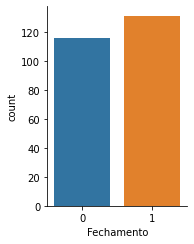

In [36]:
sns.catplot(x="Fechamento",
                data=df_petro,
                kind="count", height=3.5, aspect=.8)

Em 2021 houve 131 fechamentos com aumento nos valores de ações da Petrobras e 116 com fechamento em queda.

## 4.5 Concatenar noticias diárias

In [37]:
df_petro.head()

Date  Adj Close    Volume  Var%  Fechamento
0 2021-01-04      19.27  74719700  0.02           1
1 2021-01-05      20.03  95181100  0.04           1
2 2021-01-06      20.07  96562500  0.00           1
3 2021-01-07      20.67  56171300  0.03           1
4 2021-01-08      20.75  67136300  0.00           1

In [38]:
df.head()

title  \
0   a construção naval brasileira tem chances de a...   
1   refinaria abreu e lima da petrobras, a rnest p...   
26  petrobras é condenada em arbitragem iniciada p...   
27  petrobras fez provisionamento para indenizar iesa   
28  petrobras é condenada, nos eua, a indenizar a ...   

                       media       date  \
0   CPG Click Petroleo e Gas 2021-01-01   
1   CPG Click Petroleo e Gas 2021-01-01   
26             Forbes Brasil 2021-04-01   
27           Valor Econômico 2021-04-01   
28               Money Times 2021-04-01   

                                                 desc  
0   Dentre os principais pontos do plano estratégi...  
1   Petrobras informou em fato relevante na última...  
26  A Petrobras disse que a sentença determinou qu...  
27  Petrobras fez provisionamento para indenizar I...  
28  A Petrobras (PETR3; PETR4) foi condenada por u...

In [39]:
lista_datas = []
lista_news = []

for i in df.date.unique():
    news = ""
    for row in df[(df['date']==i)].iterrows():
        news = news + " " + row[1][0]
    lista_news.append(news)
    lista_datas.append(i)

In [40]:
pd.set_option('display.max_rows', 50)

In [41]:
df_news_diaria = pd.DataFrame(list(zip(lista_datas,lista_news)),
               columns =['Date', 'Noticias'])
df_news_diaria.sort_values(by = 'Date', ascending = True, inplace = True)
df_news_diaria

Date                                           Noticias
0   2021-01-01   a construção naval brasileira tem chances de ...
41  2021-01-03   petrobras reajusta preço da gasolina pela qui...
67  2021-01-04   tcu avalia barrar venda de refinaria da petro...
87  2021-01-05   petrobras (petr4) inicia contratação de nona ...
113 2021-01-06   valor de venda de refinaria da petrobras é qu...
..         ...                                                ...
294 2021-12-27   alerj vai à justiça contra a petrobras para b...
295 2021-12-28   distribuidoras de gás de 5 estados entram na ...
296 2021-12-29   petrobras vai recorrer de decisão que suspend...
297 2021-12-30   judicialização coloca mercado de gás em risco...
298 2021-12-31   cvm | petrobras (petr4) informa potencial de ...

[299 rows x 2 columns]

# 2 situações checar: 


1) Dias em que há pregão mas não há noticias, sendo que o dia anterior não tem pregão e tem noticias.  
2) Dias que há pregão e há noticias, sendo que no dia anterior não há pregão e há noticias.  

**Exemplo 1:** dia 29/11/2021 houve pregão mas não há noticias naquele dia, somente nos dias anteriores que nao houveram pregão e tiveram noticias 27/11/2021 e 28/11/2021.  
**Exemplo 2:** dia 18/01/2021 houve pregão e há noticias naquele dia, após concatenar as noticias do dia 18/01/2021 deverá incluir as noticias dos dias 16 e 17/01/2021 que não houve pregão;


In [42]:
## Itera sobre dias com pregao
for i in datas_com_pregao:
    
    ## Se o dia não tiver noticias retorna a data do dia anterior
    if i in datas_sem_noticias:
        dia_anterior = str(int(i[:2])-1) + i[2:10]
        
        # #Se o dia anterior não tiver pregão
        if dia_anterior in datas_sem_pregao:
                
            ## Se o dia anterior tiver noticias:
            if dia_anterior in datas_com_noticias:
                print(i)

29/11/2021


In [43]:
## 27/11/2021
noticia_dia_27 = df_news_diaria.iloc[267][1]
noticia_dia_27

' bolsonaro critica política de preços dos combustíveis da petrobras ibovespa: petrobras (petr4) e vale (vale3) têm maiores altas para itaú bba, pagamento de dividendos da petrobras (petr4) pode ser ainda maior usina termelétrica de camaçari: um dos principais investimentos da petrobras na bahia, foi arrendado ontem (26/11) para a petroquímica proquigel empreiteira de perfuração offshore seadrill conquista contratos de us$ 549 milhões com a petrobras, no campo de búzios'

In [44]:
## 28/11/2021
noticia_dia_28 = df_news_diaria.iloc[268][1]
noticia_dia_28

' por que a privatização da petrobras não é garantia de ... petrobras e mubadala assinam transferência final da rlam nos próximos dias petrobras deve começar a vender fatia na braskem no primeiro trimestre'

In [45]:
## 29/11/2021 -- NÂO EXISTE NOTICIA
noticia_dia_29 = ""

In [46]:
## 16/01/2021
noticia_dia_16 = df_news_diaria.iloc[11][1]
noticia_dia_16

' mais de 100 vagas de emprego no setor de petróleo e gás! ocyan inicia cadastro de currículo para contratos de manutenção da petrobras'

In [47]:
## 17/01/2021
noticia_dia_17 = df_news_diaria.iloc[12][1]
noticia_dia_17

' petrobras quer mudar gestão de plano de saúde'

In [48]:
## 18/01/2021
noticia_dia_18 = df_news_diaria.iloc[13][1]
noticia_dia_18

' a petrobras está represando preços de combustíveis? dados indicam que sim, mas analistas não veem motivo para pânico (ainda) petrobras anuncia aumento de mais de 8% na gasolina a partir desta terça-feira litro da gasolina sobe r$ 0,15 nas refinarias da petrobras petrobras avança na venda do maior campo de petróleo em ... ação da petrobras fecha em queda de 0,18% nesta segunda; veja valores petrobras (petr4) aprova abertura de novo plano de ... petrobras recebe em 15 dias propostas para construção de 2 plataformas no rio'

## 4.6 Concatenar noticias referentes a datas sem pregões.

- O próximo dia útil após o periodo sem pregões deverá consolidar as noticias acumuladas dos dias sem pregões.
- O dataset final deverá conter apenas as datas em que ocorreu o pregão

Dessa forma, iniciaremos o procedimento, concatenando as noticias de dias que não houveram pregões

In [49]:
## Iterar sobre as datas dos pregões (iniciando pelo segundo dia do pregão de 2021 df_petro.Date.iloc[1:])

## Calcular delta (diferença entre dias entre dois registros seguidos de pregões):
import datetime

df_news_sem_pregao = pd.DataFrame()
timedelta_1dia = datetime.timedelta(days=1)

lista_datas = []
lista_noticias_sem_pregao = []

for i, data in enumerate(df_petro.Date.iloc[1:]):
    data_anterior = df_petro['Date'].iloc[i]  
    delta = data - data_anterior

    
    # Se houver mais de 1 dia sem pregão:    
    if delta > timedelta_1dia:
            
            
        # Filtra as noticias entre as datas sem pregão:
        df_aux = df_news_diaria[ (df_news_diaria['Date']> data_anterior) & (df_news_diaria['Date']<= data)  ]
        
        ## Concatena as noticias das datas sem pregão
        news = ""
        for row in df_aux.iterrows():
            news = news + " " + row[1][1]


        ## Armazena as noticias e data do ultimo pregão valido em listas
        lista_noticias_sem_pregao.append(news)
        lista_datas.append(data)
        
        #Cria um dataframe auxiliar com a data do ultimo pregão e as noticias concatenadas dos dias sem pregões:
        df_aux2 = pd.DataFrame(list(zip(lista_datas,lista_noticias_sem_pregao)),
               columns =['Date', 'Noticias'])
    
        # Gera o dataframe com as noticias sem pregões + datas do ultimo pregão valido.
        df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
        
        #Resetando as listas para geração de novo DF
        lista_noticias_sem_pregao = []
        lista_datas = []
        
df_news_sem_pregao

Date                                           Noticias
0  2021-01-11    silva e luna 'militariza' cúpula da petrobra...
1  2021-01-18    mais de 100 vagas de emprego no setor de pet...
2  2021-01-26    petrobras encerra 2020 com quadro de funcion...
3  2021-02-01                                                   
4  2021-02-08    petrobras mira emissão no mercado internacio...
..        ...                                                ...
51 2021-11-29    bolsonaro critica política de preços dos com...
52 2021-12-06    petrobras aumenta exportação de óleo pelo po...
53 2021-12-13    petrobras fecha venda da six por 33 milhões ...
54 2021-12-20    petrobras abre o 1º concurso em 3 anos com s...
55 2021-12-27    petrobras vende carmópolis por us$ 1,1 bilhã...

[56 rows x 2 columns]

Obs: Note que nos dias 04/06/2021 e 01/02/2021 houveram pregão mas não houveram noticias referente a esses dias nem os dias que os precederam.
    
    # Situação OK!

# Checagem situação de 29/11/2021

In [50]:
noticias_concatenadas = " " + noticia_dia_27 + " " + noticia_dia_28 + " " + noticia_dia_29
noticias_concatenadas

'  bolsonaro critica política de preços dos combustíveis da petrobras ibovespa: petrobras (petr4) e vale (vale3) têm maiores altas para itaú bba, pagamento de dividendos da petrobras (petr4) pode ser ainda maior usina termelétrica de camaçari: um dos principais investimentos da petrobras na bahia, foi arrendado ontem (26/11) para a petroquímica proquigel empreiteira de perfuração offshore seadrill conquista contratos de us$ 549 milhões com a petrobras, no campo de búzios  por que a privatização da petrobras não é garantia de ... petrobras e mubadala assinam transferência final da rlam nos próximos dias petrobras deve começar a vender fatia na braskem no primeiro trimestre '

In [51]:
df_news_sem_pregao.iloc[51][1] + " "


'  bolsonaro critica política de preços dos combustíveis da petrobras ibovespa: petrobras (petr4) e vale (vale3) têm maiores altas para itaú bba, pagamento de dividendos da petrobras (petr4) pode ser ainda maior usina termelétrica de camaçari: um dos principais investimentos da petrobras na bahia, foi arrendado ontem (26/11) para a petroquímica proquigel empreiteira de perfuração offshore seadrill conquista contratos de us$ 549 milhões com a petrobras, no campo de búzios  por que a privatização da petrobras não é garantia de ... petrobras e mubadala assinam transferência final da rlam nos próximos dias petrobras deve começar a vender fatia na braskem no primeiro trimestre '

Codigo OK as noticias são iguais! 

# Checagem situação de 18/01/2021

In [52]:
noticias_concatenadas = " " + noticia_dia_16 + " " + noticia_dia_17 + " " + noticia_dia_18
noticias_concatenadas

'  mais de 100 vagas de emprego no setor de petróleo e gás! ocyan inicia cadastro de currículo para contratos de manutenção da petrobras  petrobras quer mudar gestão de plano de saúde  a petrobras está represando preços de combustíveis? dados indicam que sim, mas analistas não veem motivo para pânico (ainda) petrobras anuncia aumento de mais de 8% na gasolina a partir desta terça-feira litro da gasolina sobe r$ 0,15 nas refinarias da petrobras petrobras avança na venda do maior campo de petróleo em ... ação da petrobras fecha em queda de 0,18% nesta segunda; veja valores petrobras (petr4) aprova abertura de novo plano de ... petrobras recebe em 15 dias propostas para construção de 2 plataformas no rio'

In [53]:
df_news_sem_pregao.iloc[1][1] 

'  mais de 100 vagas de emprego no setor de petróleo e gás! ocyan inicia cadastro de currículo para contratos de manutenção da petrobras  petrobras quer mudar gestão de plano de saúde  a petrobras está represando preços de combustíveis? dados indicam que sim, mas analistas não veem motivo para pânico (ainda) petrobras anuncia aumento de mais de 8% na gasolina a partir desta terça-feira litro da gasolina sobe r$ 0,15 nas refinarias da petrobras petrobras avança na venda do maior campo de petróleo em ... ação da petrobras fecha em queda de 0,18% nesta segunda; veja valores petrobras (petr4) aprova abertura de novo plano de ... petrobras recebe em 15 dias propostas para construção de 2 plataformas no rio'

Codigo OK as noticias são iguais! 

## 4.7 Atualiza as noticias concatenadas no df_news_diaria:

In [54]:
df_news_diaria_atualizada = df_news_diaria.copy()

# itera sobre os dias com pregão cujo noticias de dias anteriores foram concatenadas:
for data in df_news_sem_pregao.Date.unique():
    
    #Filtra pelo dia com pregão que teve noticias concatenada
    df_noticia_dias_sem_pregao = df_news_sem_pregao[(df_news_sem_pregao['Date']==data)]


    #Checa se há registro referente a data no df de noticias
    df_check_noticias = df_news_diaria_atualizada[(df_news_diaria_atualizada['Date']==data)]
    
    # Se não houver registros referente á data então o registro deverá ser criado no df de noticias:
    # Se houver, então o registro será atualizado no df de noticias
    
    if len(df_check_noticias) > 0:
        
        #Substitui os registros
        df_news_diaria_atualizada = df_news_diaria_atualizada.replace ((df_news_diaria_atualizada.loc[df_news_diaria_atualizada['Date'].isin(df_noticia_dias_sem_pregao['Date'])])['Noticias'].values, df_noticia_dias_sem_pregao['Noticias'].values)
        
    else:
        #Insere o novo registro
        df_news_diaria_atualizada = df_news_diaria_atualizada.append(df_noticia_dias_sem_pregao, ignore_index = True)

In [55]:
len(df_news_diaria), len(df_news_diaria_atualizada)

(299, 306)

## 4.8 Mesclando o dataframe noticias finais e ações

In [56]:
df_final = pd.merge(left = df_petro, right = df_news_diaria_atualizada, how = 'left', on = 'Date')
df_final.head(10)

Date  Adj Close    Volume  Var%  Fechamento  \
0 2021-01-04      19.27  74719700  0.02           1   
1 2021-01-05      20.03  95181100  0.04           1   
2 2021-01-06      20.07  96562500  0.00           1   
3 2021-01-07      20.67  56171300  0.03           1   
4 2021-01-08      20.75  67136300  0.00           1   
5 2021-01-11      20.57  48744700 -0.01           0   
6 2021-01-12      20.42  65691900 -0.01           0   
7 2021-01-13      19.43  93826600 -0.05           0   
8 2021-01-14      19.63  50745400  0.01           1   
9 2021-01-15      18.75  80673300 -0.05           0   

                                            Noticias  
0   tcu avalia barrar venda de refinaria da petro...  
1   petrobras (petr4) inicia contratação de nona ...  
2   valor de venda de refinaria da petrobras é qu...  
3   petrobras confirma venda da fatia na br distr...  
4                                                NaN  
5    silva e luna 'militariza' cúpula da petrobra...  
6   árabes assumem nesta quarta primeira refinari...  
7   petrobras é a segunda maior do mundo em opera...  
8                                                NaN  
9                                                NaN

In [57]:
df_news_diaria_atualizada.head(12)

Date                                           Noticias
0  2021-01-01   a construção naval brasileira tem chances de ...
1  2021-01-03   petrobras reajusta preço da gasolina pela qui...
2  2021-01-04   tcu avalia barrar venda de refinaria da petro...
3  2021-01-05   petrobras (petr4) inicia contratação de nona ...
4  2021-01-06   valor de venda de refinaria da petrobras é qu...
5  2021-01-07   petrobras confirma venda da fatia na br distr...
6  2021-01-09   silva e luna 'militariza' cúpula da petrobras...
7  2021-01-10   bolsonaro sugere usar dividendos da petrobras...
8  2021-01-11    silva e luna 'militariza' cúpula da petrobra...
9  2021-01-12   árabes assumem nesta quarta primeira refinari...
10 2021-01-13   petrobras é a segunda maior do mundo em opera...
11 2021-01-16   mais de 100 vagas de emprego no setor de petr...

In [58]:
df_final[(df_final['Noticias'].isnull())].Date, len(df_final[(df_final['Noticias'].isnull())].Date)

(4     2021-01-08
 8     2021-01-14
 9     2021-01-15
 13    2021-01-21
 16    2021-01-27
 22    2021-02-04
 40    2021-03-04
 41    2021-03-05
 43    2021-03-09
 51    2021-03-19
 63    2021-04-07
 68    2021-04-14
 72    2021-04-20
 83    2021-05-06
 87    2021-05-12
 117   2021-06-24
 122   2021-07-01
 134   2021-07-20
 136   2021-07-22
 140   2021-07-28
 142   2021-07-30
 146   2021-08-05
 147   2021-08-06
 152   2021-08-13
 170   2021-09-09
 171   2021-09-10
 208   2021-11-04
 220   2021-11-23
 Name: Date, dtype: datetime64[ns],
 28)

No total houveram 28 registros de pregões sem atribuição de noticias.

Para esses registros observou-se que:  

**1) Não houveram noticias na respectiva data e/ou**  
**2) Considerando as datas sem pregões que antecederam a data do pregão também não houveram noticias.**  

In [59]:
len(df_final), len(df_final[(df_final['Noticias'].isnull())].Date)

(247, 28)

## 4.9 Exclusão dias com pregões sem noticias

In [60]:
df_final = df_final.dropna()

In [61]:
len(df_final)

219

# 5.0 NLP

Será realizado o levantamento das palavras mais frequentes em notícias para inputação de polaridade no dicionário SentilexPT caso não existam ainda.

# 5.1 SentilexPT: Inputação de polaridade de novos termos ao dicionário SentilexPT

In [62]:
sentilexpt = open('SentiLex-lem-PT01.txt','r')

Criando um dicionário com polaridades

In [63]:
dic_palavra_polaridade = {}
for i in sentilexpt.readlines():
    pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
    palavra = (i[:pos_ponto])          # Pega a palavra
    pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
    dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade

In [64]:
print (dic_palavra_polaridade.get('legal'))

1


In [65]:
print (dic_palavra_polaridade.get('chato'))

-1


In [66]:
def Score_sentimento(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    l_sentimento = []                         # cria uma lista vazia
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade
    #print (l_sentimento)                                                # imprime a lista de polaridades
    score = sum(l_sentimento)                                           # soma todos os valores da lista
    #if score > 0:
        #return 'Positivo, Score:{}'.format(score)                       # se maior que 0 retorna 'positivo'
    #elif score == 0:
        #return 'Neutro, Score:{}'.format(score)                         # se igual a 0 retorna 'neutro'
    #else:
        #return 'Negativo, Score:{}'.format(score)                       # se menor que 0 retorna 'negativo'
        
    return score

In [67]:
def sentimento(score):
    if score > 0:
        return 'Positivo'                      # se maior que 0 retorna 'positivo'
    elif score == 0:
        return 'Neutro'                     # se igual a 0 retorna 'neutro'
    else:
        return 'Negativo'                     # se menor que 0 retorna 'negativo'
        
    return score

In [68]:
testescore = Score_sentimento("DescaRadO e feIo")
testescore

-2

In [69]:
sentimento(testescore)

'Negativo'

In [70]:
df_final2 = df_final.copy()

In [71]:
df_final2['score'] = df_final2['Noticias'].apply(lambda x: Score_sentimento(x))
df_final2['Sentimento'] = df_final2['score'].apply(lambda x: sentimento(x))
df_final2

Date  Adj Close    Volume  Var%  Fechamento  \
0   2021-01-04      19.27  74719700  0.02           1   
1   2021-01-05      20.03  95181100  0.04           1   
2   2021-01-06      20.07  96562500  0.00           1   
3   2021-01-07      20.67  56171300  0.03           1   
5   2021-01-11      20.57  48744700 -0.01           0   
..         ...        ...       ...   ...         ...   
242 2021-12-23      23.24  28713600  0.01           1   
243 2021-12-27      23.58  44227900  0.01           1   
244 2021-12-28      23.61  30688100  0.00           1   
245 2021-12-29      23.41  35508400 -0.01           0   
246 2021-12-30      23.34  43229100 -0.00           0   

                                              Noticias  score Sentimento  
0     tcu avalia barrar venda de refinaria da petro...     -1   Negativo  
1     petrobras (petr4) inicia contratação de nona ...      0     Neutro  
2     valor de venda de refinaria da petrobras é qu...     -1   Negativo  
3     petrobras confirma venda da fatia na br distr...      0     Neutro  
5      silva e luna 'militariza' cúpula da petrobra...      0     Neutro  
..                                                 ...    ...        ...  
242   programa da petrobras que reforça capital de ...     -1   Negativo  
243    petrobras vende carmópolis por us$ 1,1 bilhã...      3   Positivo  
244   distribuidoras de gás de 5 estados entram na ...      0     Neutro  
245   petrobras vai recorrer de decisão que suspend...      3   Positivo  
246   judicialização coloca mercado de gás em risco...      0     Neutro  

[219 rows x 8 columns]

## Criando novo DF com etapas de stopwords e lemmatization:

In [72]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to C:\Users\HP ZBook
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to C:\Users\HP ZBook
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [73]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [74]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [75]:
def Preprocessing_pt(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))


In [76]:
def Preprocessing_en(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [77]:
df_final2_tratado = df_final2.copy()

In [78]:
df_final2_tratado['Noticias'] = df_final2_tratado['Noticias'].apply(lambda x: Preprocessing_pt(x))

In [79]:
df_final2_tratado['score'] = df_final2_tratado['Noticias'].apply(lambda x: Score_sentimento(x))
df_final2_tratado['Sentimento'] = df_final2_tratado['score'].apply(lambda x: sentimento(x))
df_final2_tratado.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2021-01-04      19.27  74719700  0.02           1   
1 2021-01-05      20.03  95181100  0.04           1   
2 2021-01-06      20.07  96562500  0.00           1   
3 2021-01-07      20.67  56171300  0.03           1   
5 2021-01-11      20.57  48744700 -0.01           0   

                                            Noticias  score Sentimento  
0  tcu aval barr vend refin petrobr fund árab ven...      0     Neutro  
1  petrobr (petr4) inic contrat non unidad camp b...      0     Neutro  
2  val vend refin petrobr question ... rad traz v...      1   Positivo  
3  petrobr confirm vend fati br distribu embols r...      0     Neutro  
5  silv lun 'militariza' cúpul petrobr petrobr co...      0     Neutro

# 5.2 Tradução e aplicação textblob e vader sentiment

### Instanciando função de tradução

In [173]:
from googletrans import Translator

In [174]:
trans = Translator()

In [175]:
trans.translate("The book is on the table", dest = 'pt').text

'O livro está sobre a mesa'

In [176]:
def traduzir(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    frase = trans.translate(frase, dest = 'en').text
    return frase

In [177]:
frase_teste = traduzir("A comida está muito boa")
frase_teste

'the food is very good'

### Instanciando calculo de polaridade e subjetividade

In [178]:
from textblob import TextBlob

In [179]:
text_blob = TextBlob(frase_teste)
polaridade = text_blob.polarity
subjetividade = text_blob.subjectivity

polaridade, subjetividade

(0.9099999999999999, 0.7800000000000001)

In [180]:
def polaridade(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    text_blob = TextBlob(frase)
    polaridade = text_blob.polarity
    return polaridade

def subjetividade(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    text_blob = TextBlob(frase)
    subjetividade = text_blob.subjectivity
    return subjetividade

In [181]:
polaridade("tudo ótimo e perfeito"), subjetividade("tudo ótimo e perfeito")

(0.0, 0.0)

### Instanciando calculo de sentimento

In [182]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [183]:
s_analyze = SentimentIntensityAnalyzer()
sentiment= s_analyze.polarity_scores(frase_teste)

In [184]:
sentiment

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [185]:
type(sentiment)
sentiment.get('neu')

0.556

In [186]:
def negatividade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('neg')
    return sentimento

def neutralidade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('neu')
    return sentimento

def positividade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('pos')
    return sentimento

def composicao(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('compound')
    return sentimento

In [187]:
negatividade("tudo ótimo e perfeito"), neutralidade("tudo ótimo e perfeito"), positividade("tudo ótimo e perfeito"), composicao("tudo ótimo e perfeito")

(0.0, 1.0, 0.0, 0.0)

In [188]:
df_final3 = df_final.copy()

### Realiza tradução - Cuidado pode demorar muito. 
Caso já tenha sido traduzido previamente deve ser realizado a leitura do arquivo 'df_noticias_traduzidas.csv' na linha de baixo

In [189]:
#Tradução alternativa
df_final3.reset_index(inplace=True)
df_final3.drop(['index'], axis = 1, inplace = True) 

import time
for i in range(0, len(df_final3['Noticias'])):
    if len(df_final3['Noticias'][i])>0:
        df_final3['Noticias'][i] = trans.translate(df_final3['Noticias'][i]).text
        time.sleep(2)

In [190]:
#Opção para tradução sem sleep(2)
#df_final3['Noticias'] = df_final3['Noticias'].apply(lambda x: traduzir(x))

In [191]:
#df_final3.to_csv('df_noticias_traduzidas.csv',sep = '|',header=True,encoding='utf-8-sig', index=False)

In [192]:
# ler arquivo previamente traduzido
#df_final3 = pd.read_csv('df_noticias_traduzidas.csv', sep='|')

In [193]:
#Limpando linhas com noticias nulas após a tradução
#df_final3 = df_final3[df_final3['Noticias']!='']

In [194]:
df_final3.head(19)

Date  Adj Close     Volume  Var%  Fechamento  \
0  2021-01-04      19.27   74719700  0.02           1   
1  2021-01-05      20.03   95181100  0.04           1   
2  2021-01-06      20.07   96562500  0.00           1   
3  2021-01-07      20.67   56171300  0.03           1   
4  2021-01-11      20.57   48744700 -0.01           0   
5  2021-01-12      20.42   65691900 -0.01           0   
6  2021-01-13      19.43   93826600 -0.05           0   
7  2021-01-18      18.71   68855700 -0.00           0   
8  2021-01-19      19.13   61656000  0.02           1   
9  2021-01-20      18.81   60306200 -0.02           0   
10 2021-01-22      18.06   51181900 -0.02           0   
11 2021-01-26      18.00   64514600 -0.00           0   
12 2021-01-28      18.51   67827000  0.01           1   
13 2021-01-29      17.79   67555300 -0.04           0   
14 2021-02-01      18.35   44449500  0.03           1   
15 2021-02-02      19.11   91663000  0.04           1   
16 2021-02-03      19.29   47486800  0.01           1   
17 2021-02-05      19.23  121098700  0.00           1   
18 2021-02-08      18.74   98821700 -0.03           0   

                                             Noticias  
0   tcu evaluates barring sale of petrobras refine...  
1   petrobras (petr4) starts contracting the ninth...  
2   value of sale of petrobras refinery is questio...  
3   petrobras confirms sale of stake in br distrib...  
4   silva and luna 'militariza' petrobras dome pet...  
5   Arabs take over this fourth petrobras refinery...  
6   petrobras is the second largest in the world i...  
7   more than 100 jobs in the oil and gas sector! ...  
8   proposal prohibits creation of petrobras subsi...  
9   ultrapar negotiates purchase of petrobras refi...  
10  gas dealers promise to strike on February 1 ag...  
11  petrobras ends 2020 with 10.4 employees ... ho...  
12  petrobras (petr4): deal with Chinese partners ...  
13  petrobras announces pre-salt discovery of fiel...  
14                                                     
15  petrobras announces sale of pole peroá to 3r p...  
16  guedes: let's take the petrobras dividends and...  
17  supported by unions, families occupy petrobras...  
18  petrobras targets issuance in the internationa...

In [195]:
df_final3['polaridade'] = df_final3['Noticias'].apply(lambda x: polaridade(str(x)))
df_final3['subjetividade'] = df_final3['Noticias'].apply(lambda x: subjetividade(str(x)))
df_final3['negatividade'] = df_final3['Noticias'].apply(lambda x: negatividade(str(x)))
df_final3['neutralidade'] = df_final3['Noticias'].apply(lambda x: neutralidade(str(x)))
df_final3['positividade'] = df_final3['Noticias'].apply(lambda x: positividade(str(x)))
df_final3['composicao'] = df_final3['Noticias'].apply(lambda x: composicao(str(x)))
df_final3

Date  Adj Close    Volume  Var%  Fechamento  \
0   2021-01-04      19.27  74719700  0.02           1   
1   2021-01-05      20.03  95181100  0.04           1   
2   2021-01-06      20.07  96562500  0.00           1   
3   2021-01-07      20.67  56171300  0.03           1   
4   2021-01-11      20.57  48744700 -0.01           0   
..         ...        ...       ...   ...         ...   
214 2021-12-23      23.24  28713600  0.01           1   
215 2021-12-27      23.58  44227900  0.01           1   
216 2021-12-28      23.61  30688100  0.00           1   
217 2021-12-29      23.41  35508400 -0.01           0   
218 2021-12-30      23.34  43229100 -0.00           0   

                                              Noticias  polaridade  \
0    tcu evaluates barring sale of petrobras refine...        0.00   
1    petrobras (petr4) starts contracting the ninth...        0.00   
2    value of sale of petrobras refinery is questio...        0.25   
3    petrobras confirms sale of stake in br distrib...        0.35   
4    silva and luna 'militariza' petrobras dome pet...        0.18   
..                                                 ...         ...   
214  petrobras program that reinforces working capi...        0.37   
215  petrobras sells carmópolis for us$ 1.1 billion...        0.26   
216  gas distributors in 5 states go to court again...        0.47   
217  petrobras will appeal the decision that suspen...        0.12   
218  judicialization puts gas market at risk, says ...        0.00   

     subjetividade  negatividade  neutralidade  positividade  composicao  
0             0.00          0.17          0.83          0.00       -0.78  
1             0.00          0.00          1.00          0.00        0.00  
2             0.50          0.06          0.91          0.03       -0.38  
3             0.30          0.03          0.87          0.10        0.74  
4             0.40          0.04          0.90          0.06        0.45  
..             ...           ...           ...           ...         ...  
214           0.43          0.00          0.92          0.08        0.60  
215           0.40          0.05          0.88          0.07        0.54  
216           0.57          0.03          0.91          0.07        0.59  
217           0.33          0.03          0.83          0.13        0.88  
218           0.53          0.05          0.91          0.04       -0.05  

[219 rows x 12 columns]

## Criando novo DF com etapas de stopwords e lemmatization:

In [196]:
df_final3_tratado = df_final.copy()
df_final3_tratado['Noticias'] = df_final3['Noticias']

In [197]:
df_final3_tratado['Noticias'] = df_final3_tratado['Noticias'].apply(lambda x: Preprocessing_en(str(x)))
df_final3_tratado.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2021-01-04      19.27  74719700  0.02           1   
1 2021-01-05      20.03  95181100  0.04           1   
2 2021-01-06      20.07  96562500  0.00           1   
3 2021-01-07      20.67  56171300  0.03           1   
5 2021-01-11      20.57  48744700 -0.01           0   

                                            Noticias  
0  tcu evaluat barring sal petrobr refinery arab ...  
1  petrobr (petr4) start contracting ninth unit b...  
2  valu sal petrobr refinery questioned ... rad b...  
3  petrobr confirm sal stak br distribu pocket r$...  
5  arab tak fourth petrobr refinery put sal petro...

In [198]:
df_final3_tratado['polaridade'] = df_final3_tratado['Noticias'].apply(lambda x: polaridade(str(x)))
df_final3_tratado['subjetividade'] = df_final3_tratado['Noticias'].apply(lambda x: subjetividade(str(x)))
df_final3_tratado['negatividade'] = df_final3_tratado['Noticias'].apply(lambda x: negatividade(str(x)))
df_final3_tratado['neutralidade'] = df_final3_tratado['Noticias'].apply(lambda x: neutralidade(str(x)))
df_final3_tratado['positividade'] = df_final3_tratado['Noticias'].apply(lambda x: positividade(str(x)))
df_final3_tratado['composicao'] = df_final3_tratado['Noticias'].apply(lambda x: composicao(str(x)))
df_final3_tratado.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2021-01-04      19.27  74719700  0.02           1   
1 2021-01-05      20.03  95181100  0.04           1   
2 2021-01-06      20.07  96562500  0.00           1   
3 2021-01-07      20.67  56171300  0.03           1   
5 2021-01-11      20.57  48744700 -0.01           0   

                                            Noticias  polaridade  \
0  tcu evaluat barring sal petrobr refinery arab ...        0.00   
1  petrobr (petr4) start contracting ninth unit b...        0.00   
2  valu sal petrobr refinery questioned ... rad b...        0.22   
3  petrobr confirm sal stak br distribu pocket r$...        0.35   
5  arab tak fourth petrobr refinery put sal petro...       -0.03   

   subjetividade  negatividade  neutralidade  positividade  composicao  
0           0.00          0.22          0.78          0.00       -0.78  
1           0.00          0.00          1.00          0.00        0.00  
2           0.58          0.09          0.85          0.06       -0.25  
3           0.30          0.04          0.92          0.04        0.15  
5           0.12          0.00          0.93          0.07        0.53

# 5.3 Tradução e aplicação do modelo pré-treinado de Roberta
https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook

In [199]:
#pip install –upgrade pip

In [200]:
#pip install tensorflow

In [201]:
#pip install transformers

In [202]:
#pip install torch

In [203]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [204]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [205]:
example = "This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [206]:
def neg_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    neg_roberta = scores[0]
   # neu_roberta = scores[1]
   # pos_roberta = scores[2]
    return neg_roberta

def neu_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    #neg_roberta = scores[0]
    neu_roberta = scores[1]
    #pos_roberta = scores[2]
    return neu_roberta

def pos_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    #neg_roberta = scores[0]
    #neu_roberta = scores[1]
    pos_roberta = scores[2]
    return pos_roberta
    

In [207]:
df_final4 = df_final.copy()

In [208]:
#df_final4['Noticias'] = df_final4['Noticias'].apply(lambda x: traduzir(x))

In [209]:
df_final4['Noticias'] = df_final3['Noticias']
df_final4.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2021-01-04      19.27  74719700  0.02           1   
1 2021-01-05      20.03  95181100  0.04           1   
2 2021-01-06      20.07  96562500  0.00           1   
3 2021-01-07      20.67  56171300  0.03           1   
5 2021-01-11      20.57  48744700 -0.01           0   

                                            Noticias  
0  tcu evaluates barring sale of petrobras refine...  
1  petrobras (petr4) starts contracting the ninth...  
2  value of sale of petrobras refinery is questio...  
3  petrobras confirms sale of stake in br distrib...  
5  Arabs take over this fourth petrobras refinery...

In [210]:
df_final4['neg_rob'] = df_final4['Noticias'].apply(lambda x: neg_rob(str(x)))
df_final4['neu_rob'] = df_final4['Noticias'].apply(lambda x: neu_rob(str(x)))
df_final4['pos_rob'] = df_final4['Noticias'].apply(lambda x: pos_rob(str(x)))
df_final4

Date  Adj Close    Volume  Var%  Fechamento  \
0   2021-01-04      19.27  74719700  0.02           1   
1   2021-01-05      20.03  95181100  0.04           1   
2   2021-01-06      20.07  96562500  0.00           1   
3   2021-01-07      20.67  56171300  0.03           1   
5   2021-01-11      20.57  48744700 -0.01           0   
..         ...        ...       ...   ...         ...   
242 2021-12-23      23.24  28713600  0.01           1   
243 2021-12-27      23.58  44227900  0.01           1   
244 2021-12-28      23.61  30688100  0.00           1   
245 2021-12-29      23.41  35508400 -0.01           0   
246 2021-12-30      23.34  43229100 -0.00           0   

                                              Noticias  neg_rob  neu_rob  \
0    tcu evaluates barring sale of petrobras refine...     0.62     0.37   
1    petrobras (petr4) starts contracting the ninth...     0.17     0.80   
2    value of sale of petrobras refinery is questio...     0.56     0.42   
3    petrobras confirms sale of stake in br distrib...     0.06     0.86   
5    Arabs take over this fourth petrobras refinery...     0.10     0.82   
..                                                 ...      ...      ...   
242                                                NaN     0.24     0.53   
243                                                NaN     0.24     0.53   
244                                                NaN     0.24     0.53   
245                                                NaN     0.24     0.53   
246                                                NaN     0.24     0.53   

     pos_rob  
0       0.01  
1       0.02  
2       0.02  
3       0.08  
5       0.08  
..       ...  
242     0.23  
243     0.23  
244     0.23  
245     0.23  
246     0.23  

[219 rows x 9 columns]

## Criando novo DF com etapas de stopwords e lemmatization

In [211]:
df_final4_tratado = df_final.copy()
df_final4_tratado['Noticias'] = df_final4['Noticias']

In [212]:
df_final4_tratado['Noticias'] = df_final4_tratado['Noticias'].apply(lambda x: Preprocessing_en(str(x)))
df_final4_tratado.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2021-01-04      19.27  74719700  0.02           1   
1 2021-01-05      20.03  95181100  0.04           1   
2 2021-01-06      20.07  96562500  0.00           1   
3 2021-01-07      20.67  56171300  0.03           1   
5 2021-01-11      20.57  48744700 -0.01           0   

                                            Noticias  
0  tcu evaluat barring sal petrobr refinery arab ...  
1  petrobr (petr4) start contracting ninth unit b...  
2  valu sal petrobr refinery questioned ... rad b...  
3  petrobr confirm sal stak br distribu pocket r$...  
5  arab tak fourth petrobr refinery put sal petro...

In [213]:
df_final4_tratado['neg_rob'] = df_final4_tratado['Noticias'].apply(lambda x: neg_rob(str(x)))
df_final4_tratado['neu_rob'] = df_final4_tratado['Noticias'].apply(lambda x: neu_rob(str(x)))
df_final4_tratado['pos_rob'] = df_final4_tratado['Noticias'].apply(lambda x: pos_rob(str(x)))
df_final4_tratado

Date  Adj Close    Volume  Var%  Fechamento  \
0   2021-01-04      19.27  74719700  0.02           1   
1   2021-01-05      20.03  95181100  0.04           1   
2   2021-01-06      20.07  96562500  0.00           1   
3   2021-01-07      20.67  56171300  0.03           1   
5   2021-01-11      20.57  48744700 -0.01           0   
..         ...        ...       ...   ...         ...   
242 2021-12-23      23.24  28713600  0.01           1   
243 2021-12-27      23.58  44227900  0.01           1   
244 2021-12-28      23.61  30688100  0.00           1   
245 2021-12-29      23.41  35508400 -0.01           0   
246 2021-12-30      23.34  43229100 -0.00           0   

                                              Noticias  neg_rob  neu_rob  \
0    tcu evaluat barring sal petrobr refinery arab ...     0.41     0.58   
1    petrobr (petr4) start contracting ninth unit b...     0.08     0.89   
2    valu sal petrobr refinery questioned ... rad b...     0.20     0.76   
3    petrobr confirm sal stak br distribu pocket r$...     0.05     0.87   
5    arab tak fourth petrobr refinery put sal petro...     0.07     0.84   
..                                                 ...      ...      ...   
242                                                nan     0.24     0.53   
243                                                nan     0.24     0.53   
244                                                nan     0.24     0.53   
245                                                nan     0.24     0.53   
246                                                nan     0.24     0.53   

     pos_rob  
0       0.01  
1       0.03  
2       0.04  
3       0.08  
5       0.10  
..       ...  
242     0.23  
243     0.23  
244     0.23  
245     0.23  
246     0.23  

[219 rows x 9 columns]

# 6.0 Machine Learning: Testes iniciais com seleção de conjunto features utilizando classificação com algorítmos ingênuos.

## 6.1 SentilexPT

In [214]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier


In [121]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final2.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias','Sentimento'])
    y = df_final2['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.41it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
CalibratedClassifierCV             0.56               0.54     0.54      0.52
LinearDiscriminantAnalysis         0.56               0.54     0.54      0.51
LogisticRegression                 0.56               0.54     0.54      0.51
RidgeClassifierCV                  0.56               0.54     0.54      0.51
RidgeClassifier                    0.56               0.54     0.54      0.51
LinearSVC                          0.56               0.54     0.54      0.51
NearestCentroid                    0.53               0.54     0.54      0.49
QuadraticDiscriminantAnalysis      0.55               0.53     0.53      0.51
GaussianNB                         0.55               0.53     0.53      0.51
BernoulliNB                        0.53               0.52     0.52      0.46
Perceptron                         0.52               0.52     0.52      0.45
LGBMClassifier                     0.53               0.51     0.51      0.48
PassiveAggressiveClassifier        0.53               0.51     0.51      0.43
SGDClassifier                      0.52               0.51     0.51      0.44
KNeighborsClassifier               0.50               0.50     0.50      0.45
DummyClassifier                    0.51               0.50     0.50      0.51
LabelSpreading                     0.51               0.49     0.49      0.44
LabelPropagation                   0.51               0.49     0.49      0.44
NuSVC                              0.50               0.49     0.49      0.44
XGBClassifier                      0.50               0.49     0.49      0.44
SVC                                0.51               0.49     0.49      0.42
ExtraTreeClassifier                0.50               0.49     0.49      0.43
AdaBoostClassifier                 0.50               0.49     0.49      0.43
RandomForestClassifier             0.50               0.49     0.49      0.43
BaggingClassifier                  0.50               0.49     0.49      0.43
ExtraTreesClassifier               0.50               0.49     0.49      0.43
DecisionTreeClassifier             0.50               0.49     0.49      0.43

A acurácia dos top 5 algorítmos variou entre 56%
- CalibratedClassifierCV
- LinearDiscriminantAnalysis
- LogisticRegression
- RidgeClassifierCV
- RidgeClassifier
- LinearSVC


## 6.1.2 SentilexPT com noticias tratadas

In [431]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final2_tratado.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias','Sentimento'])
    y = df_final2_tratado['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
DummyClassifier                    0.51               0.50     0.50      0.51
CalibratedClassifierCV             0.53               0.50     0.50      0.40
LinearSVC                          0.53               0.50     0.50      0.40
RidgeClassifierCV                  0.53               0.50     0.50      0.40
LogisticRegression                 0.53               0.50     0.50      0.40
LinearDiscriminantAnalysis         0.53               0.50     0.50      0.40
RidgeClassifier                    0.53               0.50     0.50      0.40
NuSVC                              0.52               0.50     0.50      0.37
LGBMClassifier                     0.53               0.50     0.50      0.37
SGDClassifier                      0.51               0.50     0.50      0.36
XGBClassifier                      0.52               0.50     0.50      0.39
RandomForestClassifier             0.52               0.50     0.50      0.40
LabelPropagation                   0.52               0.50     0.50      0.40
LabelSpreading                     0.52               0.50     0.50      0.40
ExtraTreesClassifier               0.52               0.50     0.50      0.40
ExtraTreeClassifier                0.52               0.50     0.50      0.40
DecisionTreeClassifier             0.52               0.50     0.50      0.40
PassiveAggressiveClassifier        0.51               0.50     0.50      0.37
BernoulliNB                        0.52               0.49     0.49      0.37
AdaBoostClassifier                 0.52               0.49     0.49      0.39
NearestCentroid                    0.48               0.49     0.49      0.35
Perceptron                         0.49               0.49     0.49      0.37
SVC                                0.52               0.49     0.49      0.38
BaggingClassifier                  0.52               0.49     0.49      0.39
KNeighborsClassifier               0.50               0.49     0.49      0.36
GaussianNB                         0.50               0.49     0.49      0.39
QuadraticDiscriminantAnalysis      0.50               0.49     0.49      0.39

Sem os dados tratados (stopwods e lemmatization) o algorítmo performou melhor

## 6.2 Tradução + Vader Sentiment

In [432]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final3.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias'])
    y = df_final3['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.25it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
BernoulliNB                        0.60               0.60     0.60      0.60
RidgeClassifierCV                  0.59               0.59     0.59      0.58
LogisticRegression                 0.59               0.59     0.59      0.58
LinearSVC                          0.59               0.58     0.58      0.58
RidgeClassifier                    0.59               0.58     0.58      0.58
XGBClassifier                      0.58               0.58     0.58      0.58
LinearDiscriminantAnalysis         0.59               0.58     0.58      0.58
LGBMClassifier                     0.58               0.58     0.58      0.58
NearestCentroid                    0.58               0.58     0.58      0.58
RandomForestClassifier             0.57               0.57     0.57      0.57
ExtraTreesClassifier               0.57               0.57     0.57      0.57
SVC                                0.57               0.56     0.56      0.56
AdaBoostClassifier                 0.56               0.56     0.56      0.55
LabelPropagation                   0.56               0.55     0.55      0.55
LabelSpreading                     0.55               0.55     0.55      0.55
GaussianNB                         0.53               0.54     0.54      0.52
BaggingClassifier                  0.54               0.54     0.54      0.53
CalibratedClassifierCV             0.55               0.54     0.54      0.51
ExtraTreeClassifier                0.54               0.53     0.53      0.53
DecisionTreeClassifier             0.53               0.53     0.53      0.53
PassiveAggressiveClassifier        0.53               0.53     0.53      0.50
NuSVC                              0.53               0.53     0.53      0.52
SGDClassifier                      0.52               0.52     0.52      0.51
Perceptron                         0.52               0.52     0.52      0.50
QuadraticDiscriminantAnalysis      0.49               0.51     0.51      0.36
DummyClassifier                    0.51               0.50     0.50      0.51
KNeighborsClassifier               0.50               0.50     0.50      0.50

A acurácia dos top 5 algorítmos variou de 60% á 59% 
- BernoulliNB
- RidgeClassifierCV
- LogisticRegression
- LinearSVC
- RidgeClassifier
- XGBClassifier
 

## 6.2.1 Tradução + Vader Sentiment com dados tratados

In [433]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final3_tratado.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias'])
    y = df_final3_tratado['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.48it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
NearestCentroid                    0.55               0.54     0.54      0.54
LabelSpreading                     0.53               0.53     0.53      0.52
LabelPropagation                   0.53               0.52     0.52      0.52
KNeighborsClassifier               0.52               0.52     0.52      0.52
DecisionTreeClassifier             0.53               0.52     0.52      0.52
GaussianNB                         0.53               0.52     0.52      0.51
BernoulliNB                        0.52               0.52     0.52      0.52
SVC                                0.52               0.51     0.51      0.51
NuSVC                              0.52               0.51     0.51      0.51
BaggingClassifier                  0.51               0.51     0.51      0.51
LogisticRegression                 0.52               0.51     0.51      0.50
RidgeClassifierCV                  0.52               0.51     0.51      0.50
LGBMClassifier                     0.51               0.51     0.51      0.51
RidgeClassifier                    0.52               0.51     0.51      0.50
LinearDiscriminantAnalysis         0.52               0.51     0.51      0.50
LinearSVC                          0.52               0.51     0.51      0.50
RandomForestClassifier             0.51               0.51     0.51      0.50
XGBClassifier                      0.51               0.51     0.51      0.50
Perceptron                         0.51               0.51     0.51      0.48
PassiveAggressiveClassifier        0.51               0.51     0.51      0.48
ExtraTreeClassifier                0.51               0.50     0.50      0.50
DummyClassifier                    0.51               0.50     0.50      0.51
SGDClassifier                      0.50               0.50     0.50      0.48
ExtraTreesClassifier               0.50               0.50     0.50      0.49
CalibratedClassifierCV             0.51               0.49     0.49      0.45
AdaBoostClassifier                 0.49               0.48     0.48      0.48
QuadraticDiscriminantAnalysis      0.47               0.47     0.47      0.39

Sem os dados tratados (stopwods e lemmatization) o algorítmo performou melhor

## 6.3 Modelo pré-treinado de Roberta

In [434]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final4.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias'])
    y = df_final4['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
ExtraTreesClassifier               0.54               0.54     0.54      0.53
LabelSpreading                     0.54               0.54     0.54      0.53
LabelPropagation                   0.54               0.53     0.53      0.53
XGBClassifier                      0.51               0.51     0.51      0.51
QuadraticDiscriminantAnalysis      0.52               0.51     0.51      0.50
GaussianNB                         0.52               0.51     0.51      0.49
DummyClassifier                    0.51               0.50     0.50      0.51
ExtraTreeClassifier                0.50               0.50     0.50      0.50
LGBMClassifier                     0.50               0.50     0.50      0.50
BaggingClassifier                  0.50               0.50     0.50      0.49
KNeighborsClassifier               0.50               0.49     0.49      0.49
Perceptron                         0.49               0.49     0.49      0.44
DecisionTreeClassifier             0.49               0.49     0.49      0.49
BernoulliNB                        0.50               0.49     0.49      0.48
PassiveAggressiveClassifier        0.49               0.49     0.49      0.43
NuSVC                              0.49               0.49     0.49      0.49
SGDClassifier                      0.49               0.49     0.49      0.46
NearestCentroid                    0.49               0.49     0.49      0.49
RandomForestClassifier             0.49               0.49     0.49      0.48
SVC                                0.49               0.48     0.48      0.47
AdaBoostClassifier                 0.49               0.48     0.48      0.48
CalibratedClassifierCV             0.50               0.48     0.48      0.43
RidgeClassifierCV                  0.48               0.47     0.47      0.47
LinearSVC                          0.48               0.47     0.47      0.47
RidgeClassifier                    0.48               0.47     0.47      0.47
LinearDiscriminantAnalysis         0.48               0.47     0.47      0.47
LogisticRegression                 0.48               0.47     0.47      0.47

A acurácia dos top 5 algorítmos variou de 54 a 52%

# 6.3.2 Modelo pré-treinado de Roberta com dados tratados

In [435]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final4_tratado.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias'])
    y = df_final4_tratado['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
LabelPropagation                   0.56               0.55     0.55      0.55
RandomForestClassifier             0.55               0.55     0.55      0.55
LabelSpreading                     0.55               0.55     0.55      0.55
ExtraTreesClassifier               0.54               0.54     0.54      0.54
XGBClassifier                      0.54               0.54     0.54      0.54
AdaBoostClassifier                 0.54               0.54     0.54      0.53
KNeighborsClassifier               0.54               0.53     0.53      0.53
BaggingClassifier                  0.53               0.53     0.53      0.53
ExtraTreeClassifier                0.53               0.53     0.53      0.53
DecisionTreeClassifier             0.53               0.52     0.52      0.52
LGBMClassifier                     0.51               0.51     0.51      0.51
SGDClassifier                      0.51               0.51     0.51      0.46
DummyClassifier                    0.51               0.50     0.50      0.51
SVC                                0.51               0.50     0.50      0.49
PassiveAggressiveClassifier        0.50               0.50     0.50      0.43
Perceptron                         0.49               0.49     0.49      0.45
CalibratedClassifierCV             0.51               0.49     0.49      0.44
BernoulliNB                        0.50               0.49     0.49      0.48
NearestCentroid                    0.49               0.48     0.48      0.48
LogisticRegression                 0.49               0.47     0.47      0.44
LinearDiscriminantAnalysis         0.49               0.47     0.47      0.44
RidgeClassifier                    0.49               0.47     0.47      0.44
LinearSVC                          0.49               0.47     0.47      0.44
RidgeClassifierCV                  0.49               0.47     0.47      0.44
NuSVC                              0.46               0.46     0.46      0.46
GaussianNB                         0.47               0.46     0.46      0.44
QuadraticDiscriminantAnalysis      0.47               0.45     0.45      0.44

## Apenas para o modelo pré-treinado de Roberta houve um aumento na performance dos algorítmos ingênuos ao aplicar a remoção de stopwords e lemmatization, seguiremos os experimentos combinando as features e aplicando o pré-processamento apenas às features provindas do modelo de Roberta

A acurácia dos top 5 modelos variou de 56 á 54%
- LabelPropagation
- RandomForestClassifier
- LabelSpreading
- ExtraTreesClassifier
- XGBClassifier
- AdaBoostClassifier
- KNeighborsClassifier

## 6.4 Composição SentilextPT + Tradução & Vader Sentiment

In [215]:
df_final5 = df_final3.merge(df_final2, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final5

Date  Adj Close    Volume  Var%  Fechamento  \
0   2021-01-04      19.27  74719700  0.02           1   
1   2021-01-05      20.03  95181100  0.04           1   
2   2021-01-06      20.07  96562500  0.00           1   
3   2021-01-07      20.67  56171300  0.03           1   
4   2021-01-11      20.57  48744700 -0.01           0   
..         ...        ...       ...   ...         ...   
214 2021-12-23      23.24  28713600  0.01           1   
215 2021-12-27      23.58  44227900  0.01           1   
216 2021-12-28      23.61  30688100  0.00           1   
217 2021-12-29      23.41  35508400 -0.01           0   
218 2021-12-30      23.34  43229100 -0.00           0   

                                            Noticias_x  polaridade  \
0    tcu evaluates barring sale of petrobras refine...        0.00   
1    petrobras (petr4) starts contracting the ninth...        0.00   
2    value of sale of petrobras refinery is questio...        0.25   
3    petrobras confirms sale of stake in br distrib...        0.35   
4    silva and luna 'militariza' petrobras dome pet...        0.18   
..                                                 ...         ...   
214  petrobras program that reinforces working capi...        0.37   
215  petrobras sells carmópolis for us$ 1.1 billion...        0.26   
216  gas distributors in 5 states go to court again...        0.47   
217  petrobras will appeal the decision that suspen...        0.12   
218  judicialization puts gas market at risk, says ...        0.00   

     subjetividade  negatividade  neutralidade  positividade  composicao  \
0             0.00          0.17          0.83          0.00       -0.78   
1             0.00          0.00          1.00          0.00        0.00   
2             0.50          0.06          0.91          0.03       -0.38   
3             0.30          0.03          0.87          0.10        0.74   
4             0.40          0.04          0.90          0.06        0.45   
..             ...           ...           ...           ...         ...   
214           0.43          0.00          0.92          0.08        0.60   
215           0.40          0.05          0.88          0.07        0.54   
216           0.57          0.03          0.91          0.07        0.59   
217           0.33          0.03          0.83          0.13        0.88   
218           0.53          0.05          0.91          0.04       -0.05   

                                            Noticias_y  score Sentimento  
0     tcu avalia barrar venda de refinaria da petro...     -1   Negativo  
1     petrobras (petr4) inicia contratação de nona ...      0     Neutro  
2     valor de venda de refinaria da petrobras é qu...     -1   Negativo  
3     petrobras confirma venda da fatia na br distr...      0     Neutro  
4      silva e luna 'militariza' cúpula da petrobra...      0     Neutro  
..                                                 ...    ...        ...  
214   programa da petrobras que reforça capital de ...     -1   Negativo  
215    petrobras vende carmópolis por us$ 1,1 bilhã...      3   Positivo  
216   distribuidoras de gás de 5 estados entram na ...      0     Neutro  
217   petrobras vai recorrer de decisão que suspend...      3   Positivo  
218   judicialização coloca mercado de gás em risco...      0     Neutro  

[219 rows x 15 columns]

In [437]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final5.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y','Sentimento'])
    y = df_final5['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
ExtraTreesClassifier               0.61               0.61     0.61      0.61
RandomForestClassifier             0.61               0.61     0.61      0.61
NearestCentroid                    0.61               0.61     0.61      0.61
SVC                                0.61               0.60     0.60      0.60
RidgeClassifierCV                  0.61               0.60     0.60      0.60
LogisticRegression                 0.60               0.60     0.60      0.60
RidgeClassifier                    0.60               0.60     0.60      0.60
LinearSVC                          0.60               0.60     0.60      0.60
BernoulliNB                        0.60               0.59     0.59      0.59
LinearDiscriminantAnalysis         0.60               0.59     0.59      0.59
LabelPropagation                   0.59               0.59     0.59      0.59
NuSVC                              0.59               0.59     0.59      0.59
LabelSpreading                     0.59               0.59     0.59      0.59
XGBClassifier                      0.58               0.58     0.58      0.58
LGBMClassifier                     0.58               0.58     0.58      0.58
CalibratedClassifierCV             0.57               0.56     0.56      0.56
AdaBoostClassifier                 0.57               0.56     0.56      0.56
KNeighborsClassifier               0.56               0.56     0.56      0.56
BaggingClassifier                  0.55               0.56     0.56      0.55
GaussianNB                         0.54               0.55     0.55      0.53
SGDClassifier                      0.54               0.54     0.54      0.52
Perceptron                         0.53               0.53     0.53      0.52
DecisionTreeClassifier             0.54               0.53     0.53      0.53
ExtraTreeClassifier                0.53               0.53     0.53      0.53
PassiveAggressiveClassifier        0.53               0.53     0.53      0.51
QuadraticDiscriminantAnalysis      0.49               0.52     0.52      0.37
DummyClassifier                    0.51               0.50     0.50      0.51

A acurácia dos top 5 algorítmos ficou em 61%
- ExtraTreesClassifier
- RandomForestClassifier
- NearestCentroid
- SVC
- RidgeClassifierCV
- LogisticRegression                       

## 6.5 Composição SentilextPT + Tradução & Roberta

In [216]:
df_final6 = df_final4_tratado.merge(df_final2, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final6

Date  Adj Close    Volume  Var%  Fechamento  \
0   2021-01-04      19.27  74719700  0.02           1   
1   2021-01-05      20.03  95181100  0.04           1   
2   2021-01-06      20.07  96562500  0.00           1   
3   2021-01-07      20.67  56171300  0.03           1   
4   2021-01-11      20.57  48744700 -0.01           0   
..         ...        ...       ...   ...         ...   
214 2021-12-23      23.24  28713600  0.01           1   
215 2021-12-27      23.58  44227900  0.01           1   
216 2021-12-28      23.61  30688100  0.00           1   
217 2021-12-29      23.41  35508400 -0.01           0   
218 2021-12-30      23.34  43229100 -0.00           0   

                                            Noticias_x  neg_rob  neu_rob  \
0    tcu evaluat barring sal petrobr refinery arab ...     0.41     0.58   
1    petrobr (petr4) start contracting ninth unit b...     0.08     0.89   
2    valu sal petrobr refinery questioned ... rad b...     0.20     0.76   
3    petrobr confirm sal stak br distribu pocket r$...     0.05     0.87   
4    arab tak fourth petrobr refinery put sal petro...     0.07     0.84   
..                                                 ...      ...      ...   
214                                                nan     0.24     0.53   
215                                                nan     0.24     0.53   
216                                                nan     0.24     0.53   
217                                                nan     0.24     0.53   
218                                                nan     0.24     0.53   

     pos_rob                                         Noticias_y  score  \
0       0.01   tcu avalia barrar venda de refinaria da petro...     -1   
1       0.03   petrobras (petr4) inicia contratação de nona ...      0   
2       0.04   valor de venda de refinaria da petrobras é qu...     -1   
3       0.08   petrobras confirma venda da fatia na br distr...      0   
4       0.10    silva e luna 'militariza' cúpula da petrobra...      0   
..       ...                                                ...    ...   
214     0.23   programa da petrobras que reforça capital de ...     -1   
215     0.23    petrobras vende carmópolis por us$ 1,1 bilhã...      3   
216     0.23   distribuidoras de gás de 5 estados entram na ...      0   
217     0.23   petrobras vai recorrer de decisão que suspend...      3   
218     0.23   judicialização coloca mercado de gás em risco...      0   

    Sentimento  
0     Negativo  
1       Neutro  
2     Negativo  
3       Neutro  
4       Neutro  
..         ...  
214   Negativo  
215   Positivo  
216     Neutro  
217   Positivo  
218     Neutro  

[219 rows x 12 columns]

In [ ]:
X = df_final6.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y','Sentimento'])
y = df_final6['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X_train

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

In [440]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final6.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y','Sentimento'])
    y = df_final6['Fechamento']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
RandomForestClassifier             0.56               0.55     0.55      0.55
XGBClassifier                      0.55               0.55     0.55      0.55
AdaBoostClassifier                 0.56               0.55     0.55      0.55
LGBMClassifier                     0.55               0.54     0.54      0.54
BaggingClassifier                  0.54               0.54     0.54      0.54
ExtraTreeClassifier                0.54               0.54     0.54      0.54
ExtraTreesClassifier               0.54               0.54     0.54      0.54
DecisionTreeClassifier             0.54               0.54     0.54      0.54
LabelPropagation                   0.53               0.53     0.53      0.53
SVC                                0.54               0.53     0.53      0.52
LabelSpreading                     0.53               0.53     0.53      0.53
PassiveAggressiveClassifier        0.53               0.53     0.53      0.49
KNeighborsClassifier               0.52               0.52     0.52      0.52
NuSVC                              0.52               0.52     0.52      0.52
LinearSVC                          0.53               0.52     0.52      0.51
LinearDiscriminantAnalysis         0.53               0.52     0.52      0.51
RidgeClassifier                    0.53               0.52     0.52      0.51
LogisticRegression                 0.53               0.51     0.51      0.51
RidgeClassifierCV                  0.52               0.51     0.51      0.50
Perceptron                         0.51               0.51     0.51      0.49
NearestCentroid                    0.52               0.51     0.51      0.51
QuadraticDiscriminantAnalysis      0.52               0.51     0.51      0.49
DummyClassifier                    0.51               0.50     0.50      0.51
SGDClassifier                      0.50               0.50     0.50      0.47
CalibratedClassifierCV             0.51               0.49     0.49      0.45
BernoulliNB                        0.50               0.49     0.49      0.49
GaussianNB                         0.50               0.49     0.49      0.48

A acurácia dos top 5 algorítmos variou de 56% á 54%

- RandomForestClassifier
- XGBClassifier
- AdaBoostClassifier
- LGBMClassifier
- BaggingClassifier               

## 6.6 Composição Tradução & Vader Sentiment + Tradução & Roberta


In [217]:
df_final7 = df_final4_tratado.merge(df_final3, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final7

Date  Adj Close    Volume  Var%  Fechamento  \
0   2021-01-04      19.27  74719700  0.02           1   
1   2021-01-05      20.03  95181100  0.04           1   
2   2021-01-06      20.07  96562500  0.00           1   
3   2021-01-07      20.67  56171300  0.03           1   
4   2021-01-11      20.57  48744700 -0.01           0   
..         ...        ...       ...   ...         ...   
214 2021-12-23      23.24  28713600  0.01           1   
215 2021-12-27      23.58  44227900  0.01           1   
216 2021-12-28      23.61  30688100  0.00           1   
217 2021-12-29      23.41  35508400 -0.01           0   
218 2021-12-30      23.34  43229100 -0.00           0   

                                            Noticias_x  neg_rob  neu_rob  \
0    tcu evaluat barring sal petrobr refinery arab ...     0.41     0.58   
1    petrobr (petr4) start contracting ninth unit b...     0.08     0.89   
2    valu sal petrobr refinery questioned ... rad b...     0.20     0.76   
3    petrobr confirm sal stak br distribu pocket r$...     0.05     0.87   
4    arab tak fourth petrobr refinery put sal petro...     0.07     0.84   
..                                                 ...      ...      ...   
214                                                nan     0.24     0.53   
215                                                nan     0.24     0.53   
216                                                nan     0.24     0.53   
217                                                nan     0.24     0.53   
218                                                nan     0.24     0.53   

     pos_rob                                         Noticias_y  polaridade  \
0       0.01  tcu evaluates barring sale of petrobras refine...        0.00   
1       0.03  petrobras (petr4) starts contracting the ninth...        0.00   
2       0.04  value of sale of petrobras refinery is questio...        0.25   
3       0.08  petrobras confirms sale of stake in br distrib...        0.35   
4       0.10  silva and luna 'militariza' petrobras dome pet...        0.18   
..       ...                                                ...         ...   
214     0.23  petrobras program that reinforces working capi...        0.37   
215     0.23  petrobras sells carmópolis for us$ 1.1 billion...        0.26   
216     0.23  gas distributors in 5 states go to court again...        0.47   
217     0.23  petrobras will appeal the decision that suspen...        0.12   
218     0.23  judicialization puts gas market at risk, says ...        0.00   

     subjetividade  negatividade  neutralidade  positividade  composicao  
0             0.00          0.17          0.83          0.00       -0.78  
1             0.00          0.00          1.00          0.00        0.00  
2             0.50          0.06          0.91          0.03       -0.38  
3             0.30          0.03          0.87          0.10        0.74  
4             0.40          0.04          0.90          0.06        0.45  
..             ...           ...           ...           ...         ...  
214           0.43          0.00          0.92          0.08        0.60  
215           0.40          0.05          0.88          0.07        0.54  
216           0.57          0.03          0.91          0.07        0.59  
217           0.33          0.03          0.83          0.13        0.88  
218           0.53          0.05          0.91          0.04       -0.05  

[219 rows x 16 columns]

In [443]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final7.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y'])
    y = df_final7['Fechamento']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
BernoulliNB                        0.59               0.59     0.59      0.59
LGBMClassifier                     0.58               0.58     0.58      0.58
XGBClassifier                      0.57               0.57     0.57      0.57
RandomForestClassifier             0.57               0.57     0.57      0.57
NearestCentroid                    0.57               0.56     0.56      0.56
ExtraTreesClassifier               0.56               0.56     0.56      0.55
RidgeClassifier                    0.56               0.55     0.55      0.55
LinearSVC                          0.56               0.55     0.55      0.55
LinearDiscriminantAnalysis         0.56               0.55     0.55      0.55
RidgeClassifierCV                  0.56               0.55     0.55      0.55
SVC                                0.56               0.55     0.55      0.55
LogisticRegression                 0.56               0.55     0.55      0.55
AdaBoostClassifier                 0.55               0.55     0.55      0.55
BaggingClassifier                  0.55               0.55     0.55      0.54
KNeighborsClassifier               0.55               0.55     0.55      0.55
NuSVC                              0.55               0.54     0.54      0.54
DecisionTreeClassifier             0.54               0.54     0.54      0.54
Perceptron                         0.53               0.53     0.53      0.52
ExtraTreeClassifier                0.53               0.53     0.53      0.52
LabelSpreading                     0.52               0.52     0.52      0.52
QuadraticDiscriminantAnalysis      0.49               0.52     0.52      0.37
LabelPropagation                   0.52               0.52     0.52      0.52
GaussianNB                         0.51               0.52     0.52      0.50
PassiveAggressiveClassifier        0.52               0.51     0.51      0.51
SGDClassifier                      0.51               0.51     0.51      0.50
CalibratedClassifierCV             0.52               0.50     0.50      0.47
DummyClassifier                    0.51               0.50     0.50      0.51

A acurácia dos top 5 algorítmos variou de 59% á 57%

- BernoulliNB
- LGBMClassifier
- XGBClassifier
- RandomForestClassifier
- NearestCentroid          

## 6.7 Composição SentilexPT + Tradução & Vader Sentiment + Tradução & Roberta


In [218]:
# Sentilex + Vader
df_final8 = df_final3.merge(df_final2, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])

In [219]:
# + Roberta
df_final8 = df_final8.merge(df_final4_tratado, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final8.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2021-01-04      19.27  74719700  0.02           1   
1 2021-01-05      20.03  95181100  0.04           1   
2 2021-01-06      20.07  96562500  0.00           1   
3 2021-01-07      20.67  56171300  0.03           1   
4 2021-01-11      20.57  48744700 -0.01           0   

                                          Noticias_x  polaridade  \
0  tcu evaluates barring sale of petrobras refine...        0.00   
1  petrobras (petr4) starts contracting the ninth...        0.00   
2  value of sale of petrobras refinery is questio...        0.25   
3  petrobras confirms sale of stake in br distrib...        0.35   
4  silva and luna 'militariza' petrobras dome pet...        0.18   

   subjetividade  negatividade  neutralidade  positividade  composicao  \
0           0.00          0.17          0.83          0.00       -0.78   
1           0.00          0.00          1.00          0.00        0.00   
2           0.50          0.06          0.91          0.03       -0.38   
3           0.30          0.03          0.87          0.10        0.74   
4           0.40          0.04          0.90          0.06        0.45   

                                          Noticias_y  score Sentimento  \
0   tcu avalia barrar venda de refinaria da petro...     -1   Negativo   
1   petrobras (petr4) inicia contratação de nona ...      0     Neutro   
2   valor de venda de refinaria da petrobras é qu...     -1   Negativo   
3   petrobras confirma venda da fatia na br distr...      0     Neutro   
4    silva e luna 'militariza' cúpula da petrobra...      0     Neutro   

                                            Noticias  neg_rob  neu_rob  \
0  tcu evaluat barring sal petrobr refinery arab ...     0.41     0.58   
1  petrobr (petr4) start contracting ninth unit b...     0.08     0.89   
2  valu sal petrobr refinery questioned ... rad b...     0.20     0.76   
3  petrobr confirm sal stak br distribu pocket r$...     0.05     0.87   
4  arab tak fourth petrobr refinery put sal petro...     0.07     0.84   

   pos_rob  
0     0.01  
1     0.03  
2     0.04  
3     0.08  
4     0.10

In [459]:
df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_final8.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y', 'Noticias', 'Sentimento'])
    y = df_final8['Fechamento']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True) 
    
df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
SVC                                0.61               0.60     0.60      0.60
ExtraTreesClassifier               0.60               0.60     0.60      0.60
RidgeClassifierCV                  0.60               0.60     0.60      0.60
NearestCentroid                    0.59               0.59     0.59      0.59
LinearSVC                          0.60               0.59     0.59      0.59
RidgeClassifier                    0.60               0.59     0.59      0.59
LinearDiscriminantAnalysis         0.60               0.59     0.59      0.59
BernoulliNB                        0.59               0.59     0.59      0.59
LGBMClassifier                     0.59               0.59     0.59      0.59
LogisticRegression                 0.59               0.59     0.59      0.59
NuSVC                              0.58               0.58     0.58      0.58
RandomForestClassifier             0.58               0.58     0.58      0.58
LabelSpreading                     0.58               0.58     0.58      0.58
LabelPropagation                   0.58               0.57     0.57      0.57
XGBClassifier                      0.57               0.57     0.57      0.57
BaggingClassifier                  0.56               0.56     0.56      0.56
DecisionTreeClassifier             0.55               0.54     0.54      0.54
ExtraTreeClassifier                0.54               0.54     0.54      0.54
KNeighborsClassifier               0.54               0.54     0.54      0.54
AdaBoostClassifier                 0.54               0.54     0.54      0.54
CalibratedClassifierCV             0.55               0.54     0.54      0.52
SGDClassifier                      0.53               0.53     0.53      0.52
PassiveAggressiveClassifier        0.53               0.53     0.53      0.52
QuadraticDiscriminantAnalysis      0.50               0.52     0.52      0.39
GaussianNB                         0.51               0.52     0.52      0.51
Perceptron                         0.52               0.51     0.51      0.51
DummyClassifier                    0.51               0.50     0.50      0.51

A acurácia dos top 5 algorítmos variou de 61% á 59%

- SVC
- ExtraTreesClassifier
- RidgeClassifierCV
- NearestCentroid
- LinearSVC
              

# 6.8 Teste: Todas as features do dia atual - PCA e Normalização

In [215]:
df_models = pd.DataFrame()

## repetir o experimento 30x
for rep in range(0,30,1):
    
    print("Repeticão = %s!" % rep)
   
    #Lista de features consideradas e definição de X e Y:
    X = df_final8.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y', 'Noticias', 'Sentimento'])
    y = df_final8['Fechamento']  
    
    #Holdout em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rep) ###
    
    
    #Testando sem PCA e sem Normalizacao
    reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = reg.fit(X_train, X_test, y_train, y_test) 
    #models['conjunto_features'] = k
    models['n_PCA'] = "N/A"
    models['Normalizado'] = False
    df_models = df_models.append(models.reset_index(), ignore_index=True)
    
    
    ## iterar sobre a quantidade de reduções de dimensionalidade das features (PCA)
    for i in range(2,len(X.columns),1):
    
        #Aplicando PCA
        pca = PCA(n_components=i)
        x_train_pca = pca.fit_transform(x_train)
        x_test_pca = pca.fit_transform(x_test)

        #Aplicando Normalização
        scaler_train = StandardScaler()
        scaler_test = StandardScaler()

        scaler_train.fit(x_train_pca)
        scaler_test.fit(x_test_pca)

        x_train_pca_normalized = scaler_train.transform(x_train_pca)
        x_test_pca_normalized = scaler_test.transform(x_test_pca)


        #Testando PCA + normalizado 
        reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models, predictions = reg.fit(x_train_pca_normalized, x_test_pca_normalized, y_train, y_test)
        #models['conjunto_features'] = k
        models['n_PCA'] = i
        models['Normalizado'] = True
        # Armazenando os modelos
        df_models = df_models.append(models.reset_index(), ignore_index=True)

        #Testando PCA
        reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models, predictions = reg.fit(x_train_pca, x_test_pca, y_train, y_test)
        #models['conjunto_features'] = k
        models['n_PCA'] = i 
        models['Normalizado'] = False
        # Armazenando os modelos
        df_models = df_models.append(models.reset_index(), ignore_index=True)    


Repeticão = 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.43it/s]


Repeticão = 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Repeticão = 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Repeticão = 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.66it/s]


Repeticão = 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Repeticão = 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.93it/s]


Repeticão = 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Repeticão = 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.65it/s]


Repeticão = 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.94it/s]


Repeticão = 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.48it/s]


Repeticão = 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Repeticão = 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Repeticão = 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Repeticão = 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Repeticão = 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Repeticão = 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.76it/s]


Repeticão = 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.42it/s]


Repeticão = 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.60it/s]


Repeticão = 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.81it/s]


Repeticão = 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Repeticão = 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Repeticão = 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.79it/s]


Repeticão = 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Repeticão = 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.58it/s]


Repeticão = 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Repeticão = 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Repeticão = 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.58it/s]


Repeticão = 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.06it/s]


Repeticão = 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.09it/s]


Repeticão = 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.75it/s]


In [217]:
df_models.groupby(['Model','n_PCA','Normalizado']).agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

Accuracy  Balanced Accuracy  ROC AUC  \
Model                n_PCA Normalizado                                         
KNeighborsClassifier 2     True             0.58               0.58     0.58   
                           False            0.58               0.58     0.58   
LabelPropagation     2     False            0.58               0.58     0.58   
LabelSpreading       2     False            0.58               0.58     0.58   
                           True             0.57               0.57     0.57   
...                                          ...                ...      ...   
Perceptron           5     True             0.49               0.49     0.49   
ExtraTreeClassifier  9     False            0.49               0.49     0.49   
LabelSpreading       9     True             0.49               0.49     0.49   
LabelPropagation     9     True             0.49               0.49     0.49   
Perceptron           5     False            0.49               0.49     0.49   

                                        F1 Score  
Model                n_PCA Normalizado            
KNeighborsClassifier 2     True             0.58  
                           False            0.58  
LabelPropagation     2     False            0.57  
LabelSpreading       2     False            0.57  
                           True             0.56  
...                                          ...  
Perceptron           5     True             0.48  
ExtraTreeClassifier  9     False            0.48  
LabelSpreading       9     True             0.49  
LabelPropagation     9     True             0.49  
Perceptron           5     False            0.47  

[432 rows x 4 columns]

A acurácia dos top 5 algorítmos fiocu entre 58% e 57% aplicando PCA e Normalização em algums casos

- KNeighborsClassifier c/ PCA = 2 e Normalização
- KNeighborsClassifier c/ PCA = 2 
- LabelPropagation c/ PCA = 2
- LabelSpreading	 c/ PCA = 2
- LabelSpreading	 c/ PCA = 2  Normalização


Conclusões: Aplicando PCA e normalização á todas as features do dia atual aumenta a performance dos modelos de ML

# 7.0 Feature Engineering - Seleção do conjunto de features de dias anteriores

De acordo com as análises preliminares selecionaremos o conjunto de features composto pelos métodos de NLP 
- Composição SentilextPT + Tradução & Vader Sentiment + Roberta

adicionaremos as features de n dias anteriores para avaliar a performance da classificação

In [220]:
df_final99 = df_final8.copy()
df_final99

Date  Adj Close    Volume  Var%  Fechamento  \
0   2021-01-04      19.27  74719700  0.02           1   
1   2021-01-05      20.03  95181100  0.04           1   
2   2021-01-06      20.07  96562500  0.00           1   
3   2021-01-07      20.67  56171300  0.03           1   
4   2021-01-11      20.57  48744700 -0.01           0   
..         ...        ...       ...   ...         ...   
214 2021-12-23      23.24  28713600  0.01           1   
215 2021-12-27      23.58  44227900  0.01           1   
216 2021-12-28      23.61  30688100  0.00           1   
217 2021-12-29      23.41  35508400 -0.01           0   
218 2021-12-30      23.34  43229100 -0.00           0   

                                            Noticias_x  polaridade  \
0    tcu evaluates barring sale of petrobras refine...        0.00   
1    petrobras (petr4) starts contracting the ninth...        0.00   
2    value of sale of petrobras refinery is questio...        0.25   
3    petrobras confirms sale of stake in br distrib...        0.35   
4    silva and luna 'militariza' petrobras dome pet...        0.18   
..                                                 ...         ...   
214  petrobras program that reinforces working capi...        0.37   
215  petrobras sells carmópolis for us$ 1.1 billion...        0.26   
216  gas distributors in 5 states go to court again...        0.47   
217  petrobras will appeal the decision that suspen...        0.12   
218  judicialization puts gas market at risk, says ...        0.00   

     subjetividade  negatividade  neutralidade  positividade  composicao  \
0             0.00          0.17          0.83          0.00       -0.78   
1             0.00          0.00          1.00          0.00        0.00   
2             0.50          0.06          0.91          0.03       -0.38   
3             0.30          0.03          0.87          0.10        0.74   
4             0.40          0.04          0.90          0.06        0.45   
..             ...           ...           ...           ...         ...   
214           0.43          0.00          0.92          0.08        0.60   
215           0.40          0.05          0.88          0.07        0.54   
216           0.57          0.03          0.91          0.07        0.59   
217           0.33          0.03          0.83          0.13        0.88   
218           0.53          0.05          0.91          0.04       -0.05   

                                            Noticias_y  score Sentimento  \
0     tcu avalia barrar venda de refinaria da petro...     -1   Negativo   
1     petrobras (petr4) inicia contratação de nona ...      0     Neutro   
2     valor de venda de refinaria da petrobras é qu...     -1   Negativo   
3     petrobras confirma venda da fatia na br distr...      0     Neutro   
4      silva e luna 'militariza' cúpula da petrobra...      0     Neutro   
..                                                 ...    ...        ...   
214   programa da petrobras que reforça capital de ...     -1   Negativo   
215    petrobras vende carmópolis por us$ 1,1 bilhã...      3   Positivo   
216   distribuidoras de gás de 5 estados entram na ...      0     Neutro   
217   petrobras vai recorrer de decisão que suspend...      3   Positivo   
218   judicialização coloca mercado de gás em risco...      0     Neutro   

                                              Noticias  neg_rob  neu_rob  \
0    tcu evaluat barring sal petrobr refinery arab ...     0.41     0.58   
1    petrobr (petr4) start contracting ninth unit b...     0.08     0.89   
2    valu sal petrobr refinery questioned ... rad b...     0.20     0.76   
3    petrobr confirm sal stak br distribu pocket r$...     0.05     0.87   
4    arab tak fourth petrobr refinery put sal petro...     0.07     0.84   
..                                                 ...      ...      ...   
214                                                nan     0.24     0.53   
215                                               

In [221]:
features = ['polaridade', 'subjetividade', 'negatividade', 'neutralidade',  'positividade', 'composicao','score', 'neg_rob','neu_rob','pos_rob']
featuresd1 = [i + "d1" for i in features]
featuresd2 = [i + "d2" for i in features]
featuresd3 = [i + "d3" for i in features]
featuresd4 = [i + "d4" for i in features]

In [222]:
#Criando as colunas de features para d-1, d-2, d-3, d-4 e inicializando com valores zeros:
for i in features:
    df_final99[i+"d1"] = 0
    df_final99[i+"d2"] = 0
    df_final99[i+"d3"] = 0
    df_final99[i+"d4"] = 0
df_final99.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2021-01-04      19.27  74719700  0.02           1   
1 2021-01-05      20.03  95181100  0.04           1   
2 2021-01-06      20.07  96562500  0.00           1   
3 2021-01-07      20.67  56171300  0.03           1   
4 2021-01-11      20.57  48744700 -0.01           0   

                                          Noticias_x  polaridade  \
0  tcu evaluates barring sale of petrobras refine...        0.00   
1  petrobras (petr4) starts contracting the ninth...        0.00   
2  value of sale of petrobras refinery is questio...        0.25   
3  petrobras confirms sale of stake in br distrib...        0.35   
4  silva and luna 'militariza' petrobras dome pet...        0.18   

   subjetividade  negatividade  neutralidade  ...  neg_robd3  neg_robd4  \
0           0.00          0.17          0.83  ...          0          0   
1           0.00          0.00          1.00  ...          0          0   
2           0.50          0.06          0.91  ...          0          0   
3           0.30          0.03          0.87  ...          0          0   
4           0.40          0.04          0.90  ...          0          0   

  neu_robd1  neu_robd2 neu_robd3 neu_robd4  pos_robd1  pos_robd2  pos_robd3  \
0         0          0         0         0          0          0          0   
1         0          0         0         0          0          0          0   
2         0          0         0         0          0          0          0   
3         0          0         0         0          0          0          0   
4         0          0         0         0          0          0          0   

   pos_robd4  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 59 columns]

In [223]:
df_final99[['Date','composicao','composicaod4']]

Date  composicao  composicaod4
0   2021-01-04       -0.78             0
1   2021-01-05        0.00             0
2   2021-01-06       -0.38             0
3   2021-01-07        0.74             0
4   2021-01-11        0.45             0
..         ...         ...           ...
214 2021-12-23        0.60             0
215 2021-12-27        0.54             0
216 2021-12-28        0.59             0
217 2021-12-29        0.88             0
218 2021-12-30       -0.05             0

[219 rows x 3 columns]

In [224]:
import itertools

#atualiza as features de d-1
for a,b in itertools.zip_longest(features,featuresd1):
    df_final99[b] = df_final99.shift(periods=1)[a]
    
#atualiza as features de d-2
for a,b in itertools.zip_longest(features,featuresd2):
    df_final99[b] = df_final99.shift(periods=2)[a]
    
#atualiza as features de d-3
for a,b in itertools.zip_longest(features,featuresd3):
    df_final99[b] = df_final99.shift(periods=3)[a]
    
#atualiza as features de d-4
for a,b in itertools.zip_longest(features,featuresd4):
    df_final99[b] = df_final99.shift(periods=4)[a]


In [225]:
df_final99[['Date','composicao','composicaod4']]

Date  composicao  composicaod4
0   2021-01-04       -0.78           nan
1   2021-01-05        0.00           nan
2   2021-01-06       -0.38           nan
3   2021-01-07        0.74           nan
4   2021-01-11        0.45         -0.78
..         ...         ...           ...
214 2021-12-23        0.60          0.76
215 2021-12-27        0.54          0.97
216 2021-12-28        0.59         -0.25
217 2021-12-29        0.88          0.82
218 2021-12-30       -0.05          0.60

[219 rows x 3 columns]

In [226]:
df_final99.isnull().sum()

Date          0
Adj Close     0
Volume        0
Var%          0
Fechamento    0
             ..
neu_robd4     4
pos_robd1     1
pos_robd2     2
pos_robd3     3
pos_robd4     4
Length: 59, dtype: int64

In [227]:
## Eliminação dos registros sem as features de dias anteriores (os primeiros 4 dias)
df_final99 = df_final99.dropna()
df_final99.isnull().sum()

Date          0
Adj Close     0
Volume        0
Var%          0
Fechamento    0
             ..
neu_robd4     0
pos_robd1     0
pos_robd2     0
pos_robd3     0
pos_robd4     0
Length: 59, dtype: int64

In [228]:
df_final99.columns

Index(['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x',
       'polaridade', 'subjetividade', 'negatividade', 'neutralidade',
       'positividade', 'composicao', 'Noticias_y', 'score', 'Sentimento',
       'Noticias', 'neg_rob', 'neu_rob', 'pos_rob', 'polaridaded1',
       'polaridaded2', 'polaridaded3', 'polaridaded4', 'subjetividaded1',
       'subjetividaded2', 'subjetividaded3', 'subjetividaded4',
       'negatividaded1', 'negatividaded2', 'negatividaded3', 'negatividaded4',
       'neutralidaded1', 'neutralidaded2', 'neutralidaded3', 'neutralidaded4',
       'positividaded1', 'positividaded2', 'positividaded3', 'positividaded4',
       'composicaod1', 'composicaod2', 'composicaod3', 'composicaod4',
       'scored1', 'scored2', 'scored3', 'scored4', 'neg_robd1', 'neg_robd2',
       'neg_robd3', 'neg_robd4', 'neu_robd1', 'neu_robd2', 'neu_robd3',
       'neu_robd4', 'pos_robd1', 'pos_robd2', 'pos_robd3', 'pos_robd4'],
      dtype='object')

## Experimentos
iterando sobre d á d-n; 1<=n<=4  
c/ s/ PCA  
c/ s/ normalização  


In [140]:
#Criando um dicionário com o conjunto de features do dia atual ao d-4:
feature_dias = {'dia atual': features, 'd-1': features+featuresd1, 'd-2':features+featuresd1+featuresd2, 'd-3':features+featuresd1+featuresd2+featuresd3, 'd-4':features+featuresd1+featuresd2+featuresd3+featuresd4}


In [481]:
df_models = pd.DataFrame()

## repetir o experimento 30x 
for rep in range(0,30,1):
    
    #print("Repeticão = %s!" % rep)
    
    ## iterar sobre o conjunto de features entre a data e o dia -n (para 1<=n<=4)
    for k in feature_dias.keys():
    
        #Lista de features consideradas e definição de X e Y:
        lista_features = feature_dias[k]
        X = df_final99[lista_features]
        y = df_final99['Fechamento']  
    
        #Holdout em treino e teste
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rep) ###
           
    
         #Testando sem PCA e sem Normalizacao
        #print("Testando para conjunto de features do dia atual à %s!" % k)
        reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models, predictions = reg.fit(x_train, x_test, y_train, y_test)
        models['conjunto_features'] = k
        models['n_PCA'] = "N/A"
        models['Normalizado'] = False
        models['repeticao'] = rep
        df_models = df_models.append(models.reset_index(), ignore_index=True)
        
        
    
        ## iterar sobre a quantidade de reduções de dimensionalidade das features (PCA)
        for i in range(2,len(X.columns),1):
    
            #Aplicando PCA
            pca = PCA(n_components=i)
            x_train_pca = pca.fit_transform(x_train)
            x_test_pca = pca.fit_transform(x_test)
    
            #Aplicando Normalização
            scaler_train = StandardScaler()
            scaler_test = StandardScaler()

            scaler_train.fit(x_train_pca)
            scaler_test.fit(x_test_pca)

            x_train_pca_normalized = scaler_train.transform(x_train_pca)
            x_test_pca_normalized = scaler_test.transform(x_test_pca)


            #Testando PCA + normalizado
            print("Testando para conjunto de features do dia atual à %s com PCA = %s e Normalização - Rep %s!" % (k,i,rep)) 
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(x_train_pca_normalized, x_test_pca_normalized, y_train, y_test)
            models['conjunto_features'] = k
            models['n_PCA'] = i
            models['Normalizado'] = True
            models['repeticao'] = rep
        
            # Armazenando os modelos e resultados
            df_models = df_models.append(models.reset_index(), ignore_index=True)
    
            #Testando PCA
            #print("Testando para conjunto de features do dia atual à %s com PCA = %s! - Rep %s" % (k,i,rep))
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(x_train_pca, x_test_pca, y_train, y_test)
            models['conjunto_features'] = k
            models['n_PCA'] = i 
            models['Normalizado'] = False
            models['repeticao'] = rep
            # Armazenando os modelos e resultados
            df_models = df_models.append(models.reset_index(), ignore_index=True)    

    

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.11it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.91it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.17it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.31it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.21it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.92it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.90it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.51it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.45it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.13it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.67it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.19it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.61it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.30it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.04it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.07it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.52it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.46it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.05it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.11it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.07it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.45it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.92it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.06it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.83it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.92it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.95it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.81it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.55it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.01it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.85it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.70it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.09it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.58it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.29it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.74it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.64it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.61it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.76it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.90it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.01it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.22it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.79it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.76it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.26it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.00it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.42it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.61it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.57it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.13it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.75it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.95it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.60it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.63it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.19it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.71it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.91it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.42it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.81it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.37it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.31it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.37it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.96it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.07it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.04it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.55it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.47it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.04it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.92it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.79it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.03it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.01it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.14it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.07it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.31it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.11it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.60it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.48it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.44it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.89it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.09it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.04it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.01it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.74it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.01it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.11it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.70it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.14it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.70it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.89it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.55it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.26it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.67it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.42it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.19it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.94it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.74it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.81it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.78it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.53it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.16it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.67it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.55it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.20it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.03it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.01it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.86it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.78it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.55it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.14it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.48it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.42it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.81it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.01it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.24it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.23it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.13it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.11it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.40it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.07it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.93it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.45it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.42it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.79it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.86it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.52it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.96it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.55it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.11it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.01it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.37it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.14it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.76it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.39it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.14it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.14it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.55it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.19it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.07it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.48it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.54it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.80it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.55it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.96it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.89it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.60it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.04it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.93it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.42it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.34it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.11it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.98it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.49it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.34it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.01it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.19it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.76it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.77it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.24it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.96it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.34it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.24it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.85it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.50it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.34it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.21it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.60it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.61it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.26it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.22it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.79it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.74it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.81it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.96it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.65it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.71it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.26it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.83it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.91it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.58it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.14it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.07it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.63it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.55it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.92it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.01it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.19it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.54it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.37it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.76it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.48it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.14it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.19it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.14it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.55it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.90it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.76it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.96it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.86it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.20it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.96it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.95it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.03it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.73it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.01it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.01it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.39it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.27it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.14it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.50it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.26it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.48it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.89it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.96it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.61it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.19it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 29.00it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.71it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.40it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.26it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.03it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.56it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.67it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.78it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.69it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.04it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.67it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.77it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.55it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.91it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.11it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.18it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.01it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.84it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.70it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.01it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.14it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.37it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.76it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.23it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.61it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.74it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.85it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.59it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.79it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.48it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.64it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.50it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.87it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.81it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.10it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.76it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.44it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.44it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.36it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.53it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.42it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.82it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.31it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.17it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.44it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.07it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.70it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.61it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.86it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.52it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.07it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.02it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.41it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.72it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.28it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.87it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.65it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.96it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.50it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.48it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.60it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.03it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.64it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.90it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.96it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.16it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.22it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.81it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.61it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.73it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.37it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.93it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.69it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.52it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.38it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.16it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.30it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.01it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.98it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.84it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.05it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.93it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.04it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.05it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.44it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.76it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.96it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.36it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.38it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.25it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.21it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.42it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.53it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.20it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.99it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.78it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.77it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.51it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.30it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.14it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.00it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.14it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.90it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.07it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.21it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.39it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.29it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.77it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.02it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.81it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.00it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.77it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.86it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.52it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.96it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.98it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.94it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.12it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.32it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.95it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.07it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.68it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.63it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.95it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.22it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.95it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.48it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.16it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.96it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.89it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.81it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.21it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.24it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.74it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.37it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.09it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.79it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.01it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.31it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.96it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.76it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.71it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.91it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.13it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.65it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.02it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.84it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.45it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.22it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.30it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.88it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.00it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.28it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.11it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.11it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.12it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.77it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.01it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.02it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.17it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.26it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.60it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.49it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.99it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.26it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.55it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.74it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.19it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.69it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.73it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.70it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.62it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.93it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.68it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.61it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.51it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.76it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.32it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.52it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.94it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.84it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.22it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.48it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.57it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.28it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.56it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.43it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.50it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.77it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.94it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.90it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.18it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.92it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.05it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.17it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.28it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.82it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.04it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.73it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.64it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.48it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.19it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.92it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.37it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.84it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.62it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.81it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.40it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.39it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.19it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.90it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.46it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.75it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.91it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.56it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.17it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.81it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.22it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.61it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.95it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.67it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.47it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.04it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.79it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.12it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.25it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.92it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.82it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.79it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.58it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.22it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.75it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.35it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.48it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.88it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.02it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.74it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.27it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.11it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.97it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.67it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.25it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.08it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.43it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.51it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.29it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.93it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.28it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.68it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.30it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.95it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.91it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.44it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.91it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.31it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.44it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.53it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.62it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.29it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.64it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.86it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.49it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.44it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.85it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.83it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.42it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.35it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.81it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.81it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.66it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.04it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.13it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.29it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.40it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.79it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.32it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.83it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.09it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.01it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.15it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.61it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.19it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.49it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.03it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.31it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.44it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.11it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.45it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.74it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.68it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.12it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.45it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.85it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.29it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.54it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.28it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.91it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.10it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.53it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.15it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.99it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.60it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.13it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.80it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.30it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.46it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.72it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 2 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.29it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 3 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.24it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 4 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 5 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 6 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.09it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 7 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.35it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 8 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.88it/s]


Testando para conjunto de features do dia atual à dia atual com PCA = 9 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.66it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 2 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 3 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.47it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 4 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 5 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.03it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 6 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.49it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 7 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 8 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.00it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 9 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 10 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.23it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 11 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.14it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 12 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.63it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 13 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.09it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 14 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.33it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 15 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.58it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 16 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 17 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 18 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.35it/s]


Testando para conjunto de features do dia atual à d-1 com PCA = 19 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.74it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 2 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 3 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.97it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 4 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 5 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.98it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 6 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.80it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 7 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.37it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 8 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.08it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 9 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.18it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 10 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.47it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 11 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.94it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 12 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.26it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 13 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.68it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 14 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.24it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 15 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.32it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 16 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.76it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 17 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.38it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 18 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 19 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.33it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 20 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.65it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 21 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.11it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 22 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 23 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 24 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.47it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 25 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.71it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 26 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.53it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 27 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.11it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 28 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.31it/s]


Testando para conjunto de features do dia atual à d-2 com PCA = 29 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.57it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 2 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.46it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 3 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.33it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 4 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.37it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 5 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 6 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 7 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 8 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.59it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 9 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.53it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 10 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 11 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 12 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.66it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 13 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 14 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 15 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 16 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.26it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 17 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.43it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 18 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 19 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 20 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.72it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 21 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 22 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 23 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 24 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.48it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 25 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.85it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 26 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.71it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 27 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.51it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 28 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.63it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 29 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.06it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 30 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 31 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 32 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.86it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 33 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.99it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 34 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.93it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 35 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.07it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 36 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.39it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 37 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.60it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 38 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.87it/s]


Testando para conjunto de features do dia atual à d-3 com PCA = 39 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.87it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 2 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 3 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.34it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 4 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 5 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.37it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 6 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 7 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 8 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 9 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.42it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 10 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 11 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.64it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 12 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.92it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 13 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 14 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.63it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 15 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.56it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 16 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 17 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.06it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 18 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.71it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 19 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 20 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.89it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 21 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.95it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 22 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 23 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 24 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 25 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 26 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.47it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 27 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.49it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 28 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 29 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 30 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.23it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 31 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 32 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.81it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 33 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 34 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.77it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 35 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.57it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 36 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.70it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 37 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.03it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 38 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 39 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.83it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 40 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.18it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 41 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.01it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 42 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.69it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 43 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.39it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 44 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.65it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 45 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.14it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 46 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.55it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 47 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.38it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 48 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.21it/s]


Testando para conjunto de features do dia atual à d-4 com PCA = 49 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.45it/s]


In [482]:
df_models.groupby(['Model','conjunto_features','n_PCA','Normalizado']).agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

Accuracy  \
Model                conjunto_features n_PCA Normalizado             
NuSVC                d-1               N/A   False            0.58   
                     dia atual         N/A   False            0.58   
ExtraTreesClassifier dia atual         N/A   False            0.57   
BernoulliNB          dia atual         N/A   False            0.57   
SVC                  d-1               N/A   False            0.57   
...                                                            ...   
BaggingClassifier    d-2               5     True             0.46   
ExtraTreesClassifier d-2               4     True             0.46   
XGBClassifier        d-2               3     True             0.47   
LabelSpreading       d-2               4     True             0.46   
LabelPropagation     d-2               4     True             0.46   

                                                          Balanced Accuracy  \
Model                conjunto_features n_PCA Normalizado                      
NuSVC                d-1               N/A   False                     0.58   
                     dia atual         N/A   False                     0.58   
ExtraTreesClassifier dia atual         N/A   False                     0.58   
BernoulliNB          dia atual         N/A   False                     0.57   
SVC                  d-1               N/A   False                     0.57   
...                                                                     ...   
BaggingClassifier    d-2               5     True                      0.47   
ExtraTreesClassifier d-2               4     True                      0.47   
XGBClassifier        d-2               3     True                      0.47   
LabelSpreading       d-2               4     True                      0.46   
LabelPropagation     d-2               4     True                      0.46   

                                                          ROC AUC  F1 Score  
Model                conjunto_features n_PCA Normalizado                     
NuSVC                d-1               N/A   False           0.58      0.58  
                     dia atual         N/A   False           0.58      0.58  
ExtraTreesClassifier dia atual         N/A   False           0.58      0.57  
BernoulliNB          dia atual         N/A   False           0.57      0.57  
SVC                  d-1               N/A   False           0.57      0.56  
...                                                           ...       ...  
BaggingClassifier    d-2               5     True            0.47      0.46  
ExtraTreesClassifier d-2               4     True            0.47      0.46  
XGBClassifier        d-2               3     True            0.47      0.46  
LabelSpreading       d-2               4     True            0.46      0.46  
LabelPropagation     d-2               4     True            0.46      0.46  

[7695 rows x 4 columns]

In [489]:
df_models.groupby(['Model','conjunto_features','n_PCA','Normalizado']).agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False).head(50)

Accuracy  \
Model                      conjunto_features n_PCA Normalizado             
NuSVC                      d-1               N/A   False            0.58   
                           dia atual         N/A   False            0.58   
ExtraTreesClassifier       dia atual         N/A   False            0.57   
BernoulliNB                dia atual         N/A   False            0.57   
SVC                        d-1               N/A   False            0.57   
                           dia atual         N/A   False            0.56   
LGBMClassifier             dia atual         N/A   False            0.56   
LabelSpreading             dia atual         N/A   False            0.57   
XGBClassifier              dia atual         N/A   False            0.56   
LabelPropagation           dia atual         N/A   False            0.56   
RidgeClassifierCV          dia atual         2     False            0.56   
LogisticRegression         dia atual         2     False            0.56   
RidgeClassifier            dia atual         2     False            0.56   
LinearDiscriminantAnalysis dia atual         2     False            0.56   
LinearSVC                  dia atual         2     False            0.56   
RandomForestClassifier     d-2               N/A   False            0.56   
RidgeClassifierCV          dia atual         2     True             0.55   
RandomForestClassifier     dia atual         N/A   False            0.56   
CalibratedClassifierCV     dia atual         2     True             0.55   
                                                   False            0.55   
RidgeClassifier            dia atual         5     True             0.55   
LinearSVC                  dia atual         5     True             0.55   
LinearDiscriminantAnalysis dia atual         5     True             0.55   
LinearSVC                  dia atual         2     True             0.55   
LogisticRegression         dia atual         2     True             0.55   
LinearDiscriminantAnalysis dia atual         2     True             0.55   
                                             6     False            0.55   
RidgeClassifierCV          dia atual         9     True             0.55   
RidgeClassifier            dia atual         2     True             0.55   
NearestCentroid            dia atual         9     True             0.56   
RidgeClassifier            dia atual         6     False            0.55   
BaggingClassifier          dia atual         N/A   False            0.55   
LabelSpreading             d-1               N/A   False            0.56   
LinearSVC                  dia atual         6     False            0.55   
LabelPropagation           d-1               N/A   False            0.56   
LogisticRegression         dia atual         5     True             0.55   
GaussianNB                 dia atual         2     False            0.55   
RidgeClassifierCV          dia atual         6     False            0.55   
NearestCentroid            dia atual         8     True             0.56   
GaussianNB                 d-4               48    True             0.55   
LogisticRegression         dia atual         6     False            0.55   
LinearDiscriminantAnalysis dia atual         7     False            0.55   
RidgeClassifier            dia atual         7     False            0.55   
NearestCentroid            dia atual         N/A   False            0.56   
                                             5     True             0.55   
GaussianNB                 d-4               44    True             0.55   
LinearSVC                  dia atual         7     False            0.55   
RidgeClassifierCV          dia atual         5     True             0.55   
GaussianNB                 d-4               40    True             0.55   
                                             39    True             0.55   

                                                                Balanced Accuracy  \
Model                     

Realizando experimentações com todos os conjuntos de features dos dias anteriores observamos maior performance ao optar pelas features do dia atual sem aplicar PCA e sem normalização.

Vamos seguir uma segunda bateria de experimentos avaliando cada feature indivualmente e escolhendo as que mais tem correlação com a variavel alvo (Fechamento) e menos correlação entre si

# 8.0 Análise de Dados e seleção de features

In [229]:
df_analise = df_final99.copy()
df_analise.head()

Date  Adj Close    Volume  Var%  Fechamento  \
4 2021-01-11      20.57  48744700 -0.01           0   
5 2021-01-12      20.42  65691900 -0.01           0   
6 2021-01-13      19.43  93826600 -0.05           0   
7 2021-01-18      18.71  68855700 -0.00           0   
8 2021-01-19      19.13  61656000  0.02           1   

                                          Noticias_x  polaridade  \
4  silva and luna 'militariza' petrobras dome pet...        0.18   
5  Arabs take over this fourth petrobras refinery...       -0.02   
6  petrobras is the second largest in the world i...       -0.06   
7  more than 100 jobs in the oil and gas sector! ...        0.22   
8  proposal prohibits creation of petrobras subsi...        0.07   

   subjetividade  negatividade  neutralidade  ...  neg_robd3  neg_robd4  \
4           0.40          0.04          0.90  ...       0.08       0.41   
5           0.08          0.00          0.95  ...       0.20       0.08   
6           0.38          0.11          0.89  ...       0.05       0.20   
7           0.31          0.06          0.84  ...       0.07       0.05   
8           0.45          0.06          0.88  ...       0.53       0.07   

  neu_robd1  neu_robd2 neu_robd3 neu_robd4  pos_robd1  pos_robd2  pos_robd3  \
4      0.87       0.76      0.89      0.58       0.08       0.04       0.03   
5      0.84       0.87      0.76      0.89       0.10       0.08       0.04   
6      0.43       0.84      0.87      0.76       0.04       0.10       0.08   
7      0.71       0.43      0.84      0.87       0.06       0.04       0.10   
8      0.93       0.71      0.43      0.84       0.04       0.06       0.04   

   pos_robd4  
4       0.01  
5       0.03  
6       0.04  
7       0.08  
8       0.10  

[5 rows x 59 columns]

### Correlação

Queremos selecionar as variáveis com alta correlação com a variável de resposta (Fechamento) e baixa correlação entre si

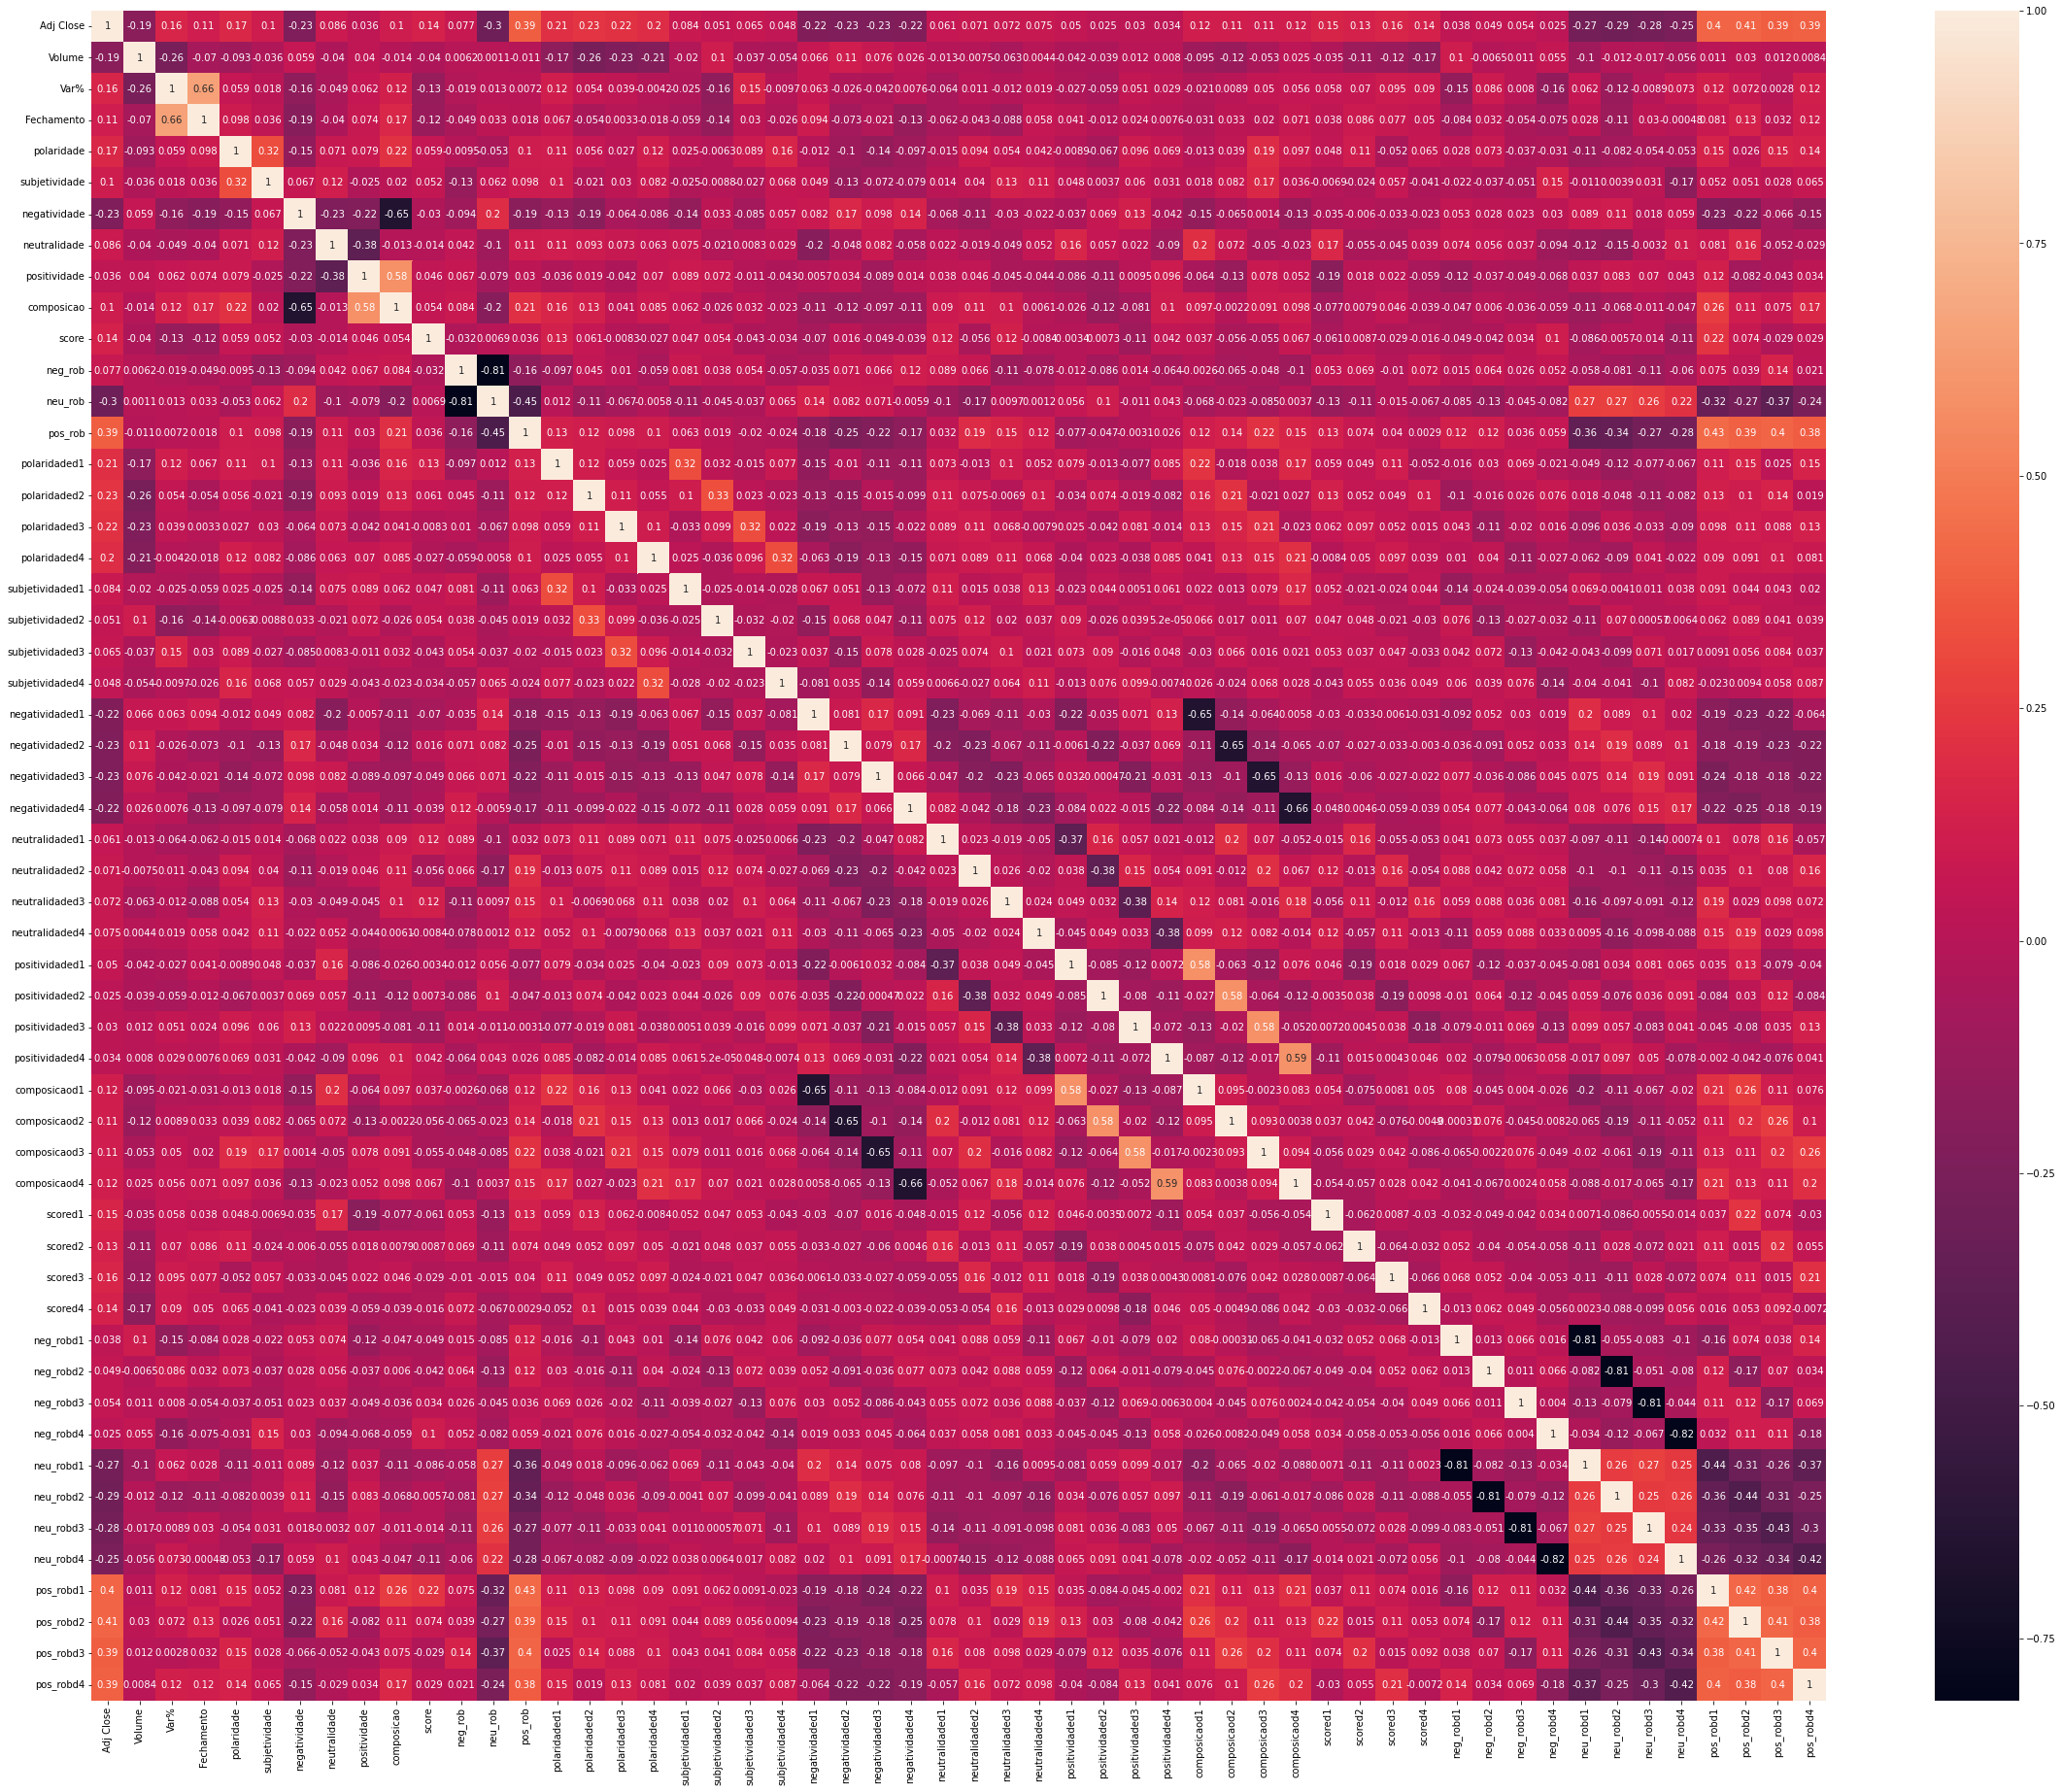

In [139]:
plt.figure(figsize=(40,32))
sns.heatmap(df_analise.corr(),annot=True)
plt.show()

In [142]:
df_analise.corr().sort_values(by = "Fechamento", ascending = True).head(10)

Adj Close  Volume  Var%  Fechamento  polaridade  \
negatividade         -0.23    0.06 -0.16       -0.19       -0.15   
subjetividaded2       0.05    0.10 -0.16       -0.14       -0.01   
negatividaded4       -0.22    0.03  0.01       -0.13       -0.10   
score                 0.14   -0.04 -0.13       -0.12        0.06   
neu_robd2            -0.29   -0.01 -0.12       -0.11       -0.08   
neutralidaded3        0.07   -0.06 -0.01       -0.09        0.05   
neg_robd1             0.04    0.10 -0.15       -0.08        0.03   
neg_robd4             0.03    0.06 -0.16       -0.07       -0.03   
negatividaded2       -0.23    0.11 -0.03       -0.07       -0.10   
Volume               -0.19    1.00 -0.26       -0.07       -0.09   

                 subjetividade  negatividade  neutralidade  positividade  \
negatividade              0.07          1.00         -0.23         -0.22   
subjetividaded2          -0.01          0.03         -0.02          0.07   
negatividaded4           -0.08          0.14         -0.06          0.01   
score                     0.05         -0.03         -0.01          0.05   
neu_robd2                 0.00          0.11         -0.15          0.08   
neutralidaded3            0.13         -0.03         -0.05         -0.04   
neg_robd1                -0.02          0.05          0.07         -0.12   
neg_robd4                 0.15          0.03         -0.09         -0.07   
negatividaded2           -0.13          0.17         -0.05          0.03   
Volume                   -0.04          0.06         -0.04          0.04   

                 composicao  ...  neg_robd3  neg_robd4  neu_robd1  neu_robd2  \
negatividade          -0.65  ...       0.02       0.03       0.09       0.11   
subjetividaded2       -0.03  ...      -0.03      -0.03      -0.11       0.07   
negatividaded4        -0.11  ...      -0.04      -0.06       0.08       0.08   
score                  0.05  ...       0.03       0.10      -0.09      -0.01   
neu_robd2             -0.07  ...      -0.08      -0.12       0.26       1.00   
neutralidaded3         0.10  ...       0.04       0.08      -0.16      -0.10   
neg_robd1             -0.05  ...       0.07       0.02      -0.81      -0.06   
neg_robd4             -0.06  ...       0.00       1.00      -0.03      -0.12   
negatividaded2        -0.12  ...       0.05       0.03       0.14       0.19   
Volume                -0.01  ...       0.01       0.06      -0.10      -0.01   

                 neu_robd3  neu_robd4  pos_robd1  pos_robd2  pos_robd3  \
negatividade          0.02       0.06      -0.23      -0.22      -0.07   
subjetividaded2       0.00       0.01       0.06       0.09       0.04   
negatividaded4        0.15       0.17      -0.22      -0.25      -0.18   
score                -0.01      -0.11       0.22       0.07      -0.03   
neu_robd2             0.25       0.26      -0.36      -0.44      -0.31   
neutralidaded3       -0.09      -0.12       0.19       0.03       0.10   
neg_robd1            -0.08      -0.10      -0.16       0.07       0.04   
neg_robd4            -0.07      -0.82       0.03       0.11       0.11   
negatividaded2        0.09       0.10      -0.18      -0.19      -0.23   
Volume               -0.02      -0.06       0.01       0.03       0.01   

                 pos_robd4  
negatividade         -0.15  
subjetividaded2       0.04  
negatividaded4       -0.19  
score                 0.03  
neu_robd2            -0.25  
neutralidaded3        0.07  
neg_robd1             0.14  
neg_robd4            -0.18  
negatividaded2       -0.22  
Volume                0.01  

[10 rows x 54 columns]

In [143]:
df_analise.corr().sort_values(by = "Fechamento", ascending = False).head(10)

Adj Close  Volume  Var%  Fechamento  polaridade  \
Fechamento           0.11   -0.07  0.66        1.00        0.10   
Var%                 0.16   -0.26  1.00        0.66        0.06   
composicao           0.10   -0.01  0.12        0.17        0.22   
pos_robd2            0.41    0.03  0.07        0.13        0.03   
pos_robd4            0.39    0.01  0.12        0.12        0.14   
Adj Close            1.00   -0.19  0.16        0.11        0.17   
polaridade           0.17   -0.09  0.06        0.10        1.00   
negatividaded1      -0.22    0.07  0.06        0.09       -0.01   
scored2              0.13   -0.11  0.07        0.09        0.11   
pos_robd1            0.40    0.01  0.12        0.08        0.15   

                subjetividade  negatividade  neutralidade  positividade  \
Fechamento               0.04         -0.19         -0.04          0.07   
Var%                     0.02         -0.16         -0.05          0.06   
composicao               0.02         -0.65         -0.01          0.58   
pos_robd2                0.05         -0.22          0.16         -0.08   
pos_robd4                0.06         -0.15         -0.03          0.03   
Adj Close                0.10         -0.23          0.09          0.04   
polaridade               0.32         -0.15          0.07          0.08   
negatividaded1           0.05          0.08         -0.20         -0.01   
scored2                 -0.02         -0.01         -0.05          0.02   
pos_robd1                0.05         -0.23          0.08          0.12   

                composicao  ...  neg_robd3  neg_robd4  neu_robd1  neu_robd2  \
Fechamento            0.17  ...      -0.05      -0.07       0.03      -0.11   
Var%                  0.12  ...       0.01      -0.16       0.06      -0.12   
composicao            1.00  ...      -0.04      -0.06      -0.11      -0.07   
pos_robd2             0.11  ...       0.12       0.11      -0.31      -0.44   
pos_robd4             0.17  ...       0.07      -0.18      -0.37      -0.25   
Adj Close             0.10  ...       0.05       0.03      -0.27      -0.29   
polaridade            0.22  ...      -0.04      -0.03      -0.11      -0.08   
negatividaded1       -0.11  ...       0.03       0.02       0.20       0.09   
scored2               0.01  ...      -0.05      -0.06      -0.11       0.03   
pos_robd1             0.26  ...       0.11       0.03      -0.44      -0.36   

                neu_robd3  neu_robd4  pos_robd1  pos_robd2  pos_robd3  \
Fechamento           0.03      -0.00       0.08       0.13       0.03   
Var%                -0.01       0.07       0.12       0.07       0.00   
composicao          -0.01      -0.05       0.26       0.11       0.07   
pos_robd2           -0.35      -0.32       0.42       1.00       0.41   
pos_robd4           -0.30      -0.42       0.40       0.38       0.40   
Adj Close           -0.28      -0.25       0.40       0.41       0.39   
polaridade          -0.05      -0.05       0.15       0.03       0.15   
negatividaded1       0.10       0.02      -0.19      -0.23      -0.22   
scored2             -0.07       0.02       0.11       0.02       0.20   
pos_robd1           -0.33      -0.26       1.00       0.42       0.38   

                pos_robd4  
Fechamento           0.12  
Var%                 0.12  
composicao           0.17  
pos_robd2            0.38  
pos_robd4            1.00  
Adj Close            0.39  
polaridade           0.14  
negatividaded1      -0.06  
scored2              0.05  
pos_robd1            0.40  

[10 rows x 54 columns]

- As features negatividade vs composição possui alta correlação (0.65), assim como positividade vs composição (0.58). A feature composição tenta resumir o sentimento geral da noticia é esperado que tenha alta correlação com as outras
- As features Fechamento e Var% possui alta correlação 0.66

As seguintes features são as que possui maior correlação com o Fechamento:

- negatividade	-0.19
- subjetividaded2	-0.14
- negatividaded4	-0.13
- score	-0.12
- neu_robd2	-0.11
- neutralidaded3	-0.09
	
- composicao	0.17
- pos_robd2	0.13
- pos_robd4	0.12
- polaridade	0.10
- negatividaded1	0.09
- scored2	0.09





In [142]:
conjunto_features_corr = ['neutralidaded3','negatividaded1','scored2','polaridade','neu_robd2','score','pos_robd4','negatividaded4','pos_robd2','subjetividaded2','composicao','negatividade']
variavel_alvo = ['Fechamento']

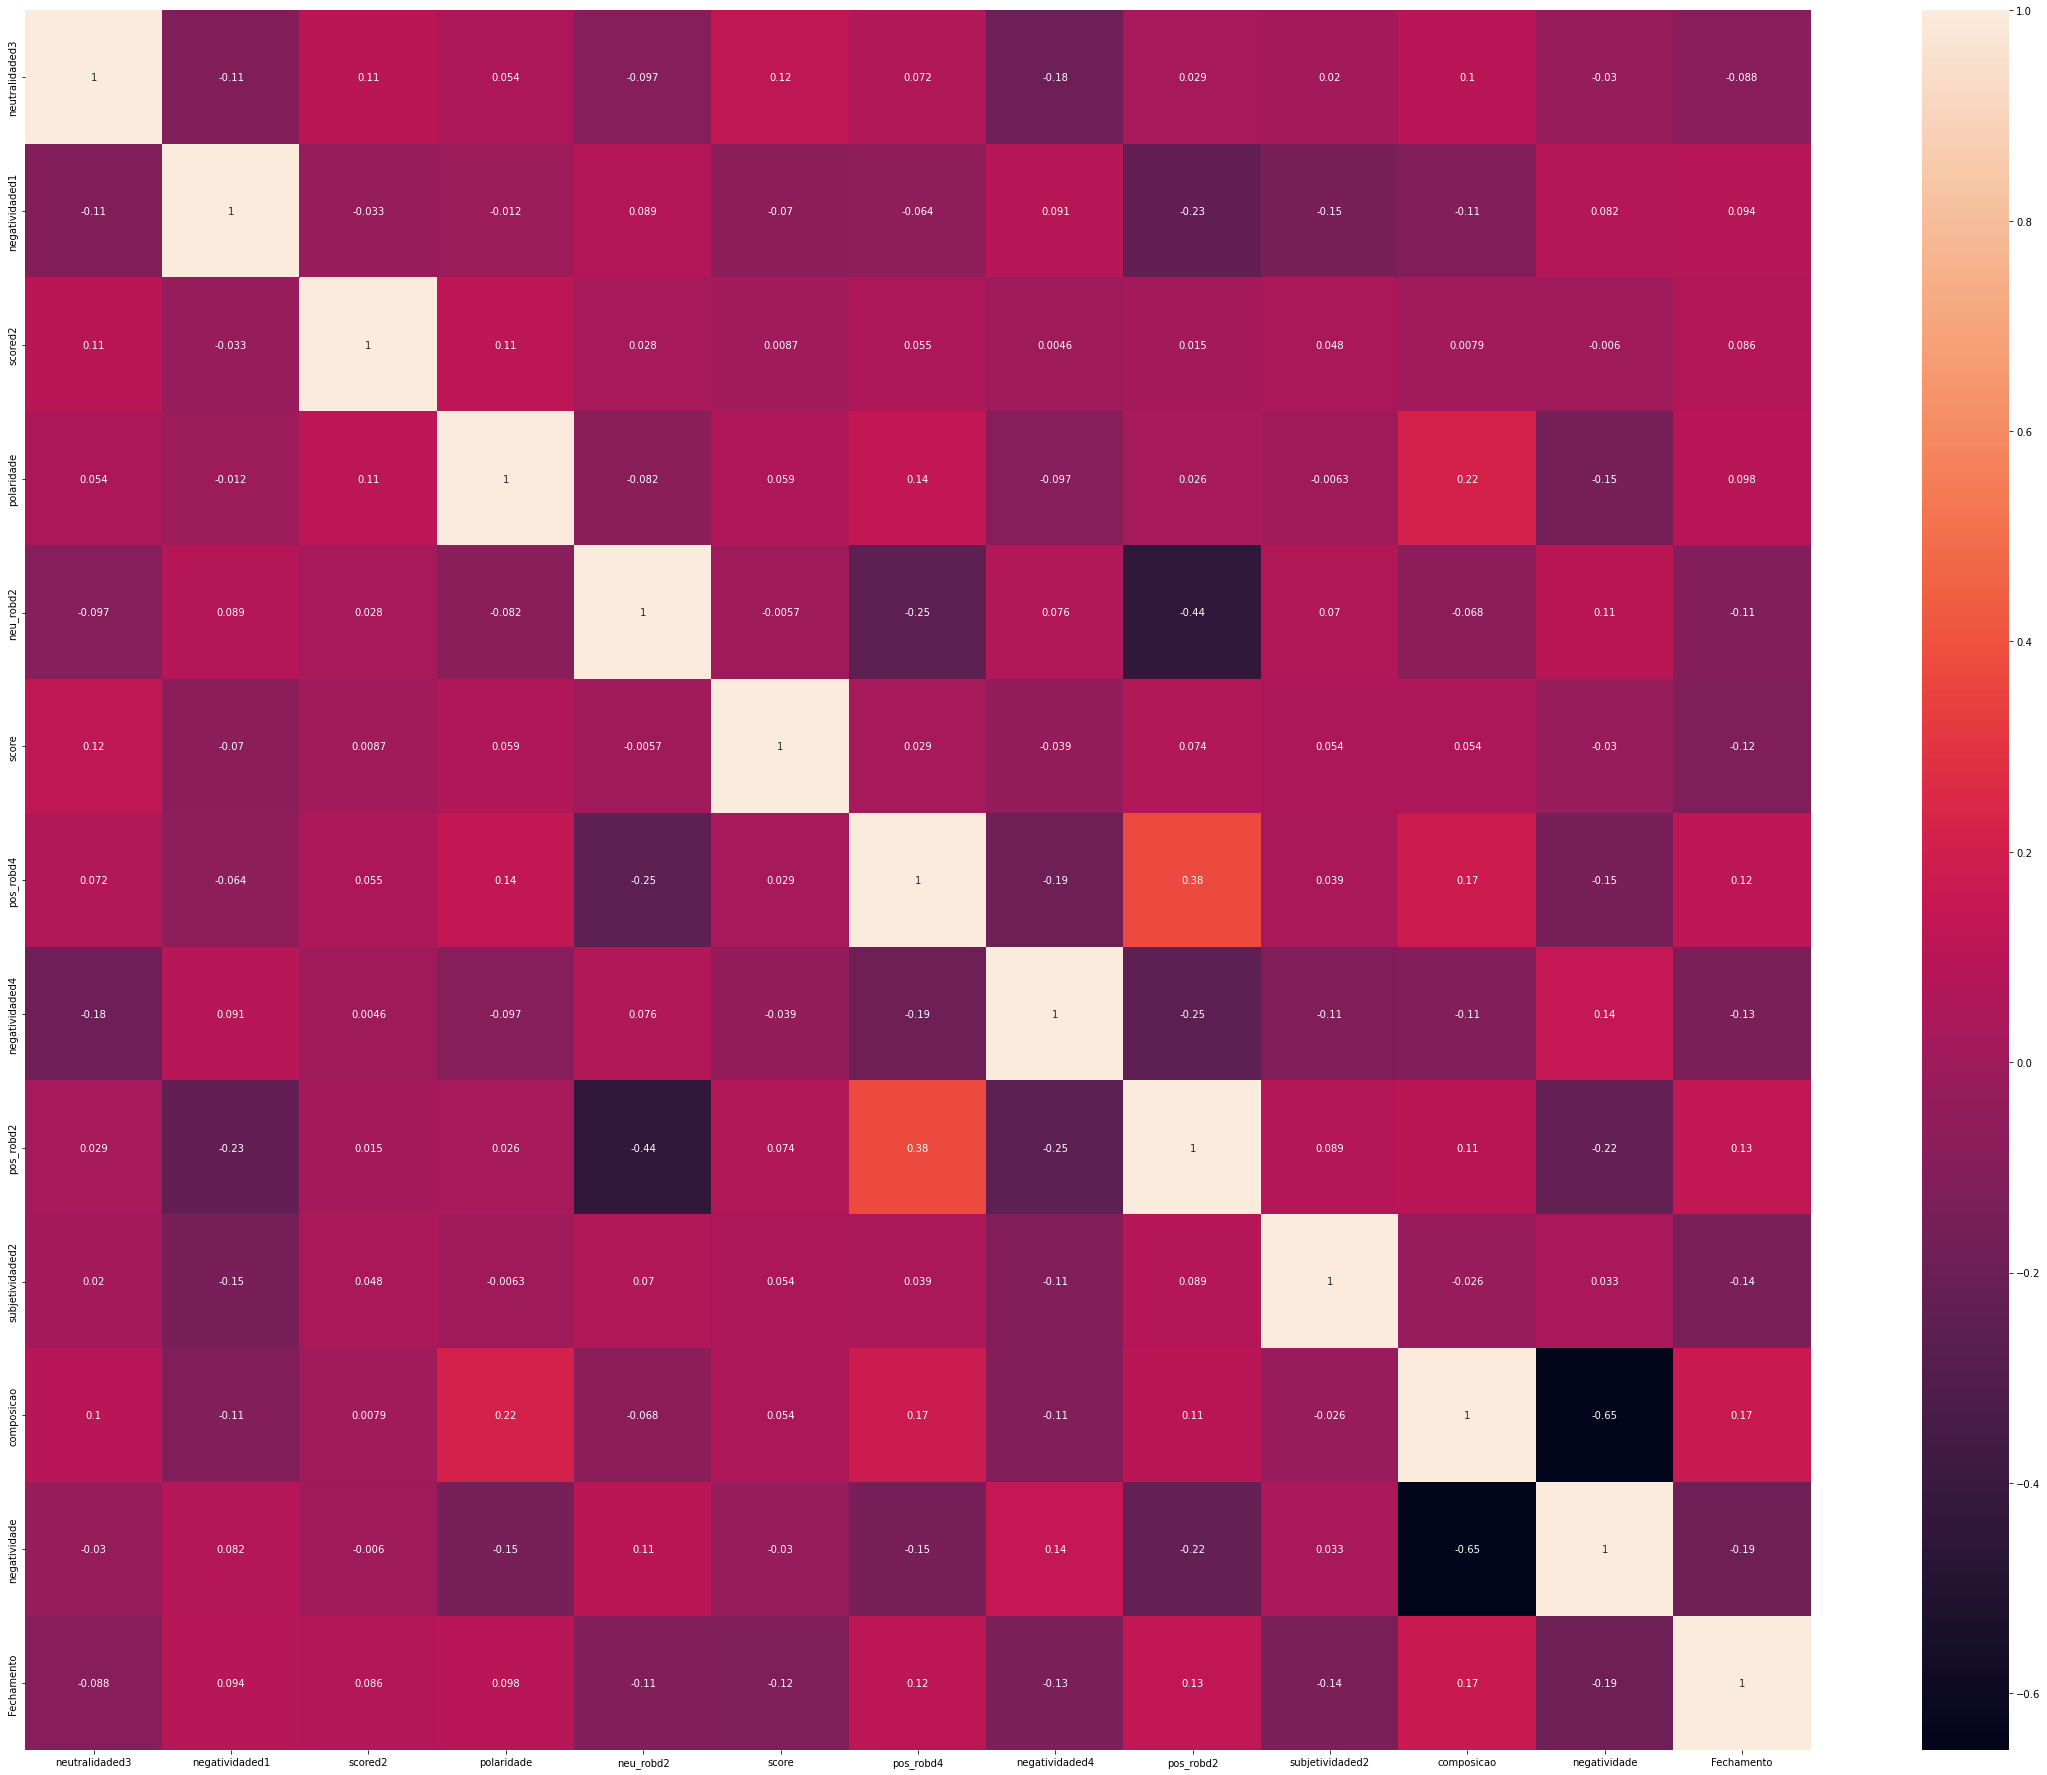

In [152]:
plt.figure(figsize=(40,32))
sns.heatmap(df_analise[conjunto_features_corr+variavel_alvo].corr(),annot=True)
plt.show()

As features composição e negatividade possuem alta correlação 0.65

## Itera sobre o conjunto das features do dia atual e de dia anteriores para descobrir a melhor combinação

In [166]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_analise[['scored2','polaridade','neu_robd2','score','pos_robd4','negatividaded4','pos_robd2','subjetividaded2','composicao','negatividade']]
    y = df_analise[variavel_alvo]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True)  

df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.18it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
BernoulliNB                        0.63               0.63     0.63      0.62
NearestCentroid                    0.62               0.62     0.62      0.62
GaussianNB                         0.61               0.61     0.61      0.61
LinearDiscriminantAnalysis         0.61               0.60     0.60      0.60
RidgeClassifier                    0.61               0.60     0.60      0.60
LinearSVC                          0.61               0.60     0.60      0.60
RidgeClassifierCV                  0.61               0.60     0.60      0.60
LogisticRegression                 0.60               0.60     0.60      0.60
SVC                                0.60               0.60     0.60      0.60
CalibratedClassifierCV             0.60               0.60     0.60      0.59
RandomForestClassifier             0.59               0.59     0.59      0.59
KNeighborsClassifier               0.58               0.58     0.58      0.58
QuadraticDiscriminantAnalysis      0.58               0.58     0.58      0.58
BaggingClassifier                  0.58               0.58     0.58      0.58
ExtraTreesClassifier               0.57               0.57     0.57      0.57
XGBClassifier                      0.56               0.56     0.56      0.56
LGBMClassifier                     0.56               0.56     0.56      0.56
NuSVC                              0.56               0.55     0.55      0.55
PassiveAggressiveClassifier        0.55               0.55     0.55      0.54
SGDClassifier                      0.55               0.55     0.55      0.54
LabelSpreading                     0.55               0.54     0.54      0.54
LabelPropagation                   0.55               0.54     0.54      0.54
AdaBoostClassifier                 0.54               0.54     0.54      0.54
DecisionTreeClassifier             0.54               0.54     0.54      0.54
ExtraTreeClassifier                0.53               0.53     0.53      0.53
Perceptron                         0.53               0.53     0.53      0.52
DummyClassifier                    0.49               0.48     0.48      0.48

'negatividaded4','pos_robd2','subjetividaded2','composicao','negatividade' é o conjunto de features mais efetivo, no entanto,

'scored2','polaridade','neu_robd2','score','pos_robd4','negatividaded4','pos_robd2','subjetividaded2','composicao','negatividade' é um conjunto de features maior que produz um efeito semelhante na performance.


Iremos testar os dois conjuntos de features com PCA e normalização para definição

In [143]:
conjunto1 = ['negatividaded4','pos_robd2','subjetividaded2','composicao','negatividade']
conjunto2 =['scored2','polaridade','neu_robd2','score','pos_robd4','negatividaded4','pos_robd2','subjetividaded2','composicao','negatividade']
conjuntototal = ['neutralidaded3','negatividaded1','scored2','polaridade','neu_robd2','score','pos_robd4','negatividaded4','pos_robd2','subjetividaded2','composicao','negatividade']

In [169]:
#Criando um dicionário com o conjunto de features 1 e 2
feature_conjunto = {'conjunto1': conjunto1, 'conjunto2': conjunto2}


In [174]:
df_models = pd.DataFrame()

## repetir o experimento 30x 
for rep in range(0,30,1):
    
    print("Repeticão = %s!" % rep)
    
    ## iterar sobre o conjunto de features entre a data e o dia -n (para 1<=n<=4)
    for k in feature_conjunto.keys():
    
        #Lista de features consideradas e definição de X e Y:
        lista_features = feature_conjunto[k]
        X = df_final99[lista_features]
        y = df_final99['Fechamento']  
    
        #Holdout em treino e teste
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rep) ###
           
    
         #Testando sem PCA e sem Normalizacao
        #print("Testando para conjunto de features %s!" % k)
        reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models, predictions = reg.fit(x_train, x_test, y_train, y_test)
        models['conjunto_features'] = k
        models['n_PCA'] = "N/A"
        models['Normalizado'] = False
        models['repeticao'] = rep
        df_models = df_models.append(models.reset_index(), ignore_index=True)
        
        
    
        ## iterar sobre a quantidade de reduções de dimensionalidade das features (PCA)
        for i in range(2,len(X.columns),1):
    
            #Aplicando PCA
            pca = PCA(n_components=i)
            x_train_pca = pca.fit_transform(x_train)
            x_test_pca = pca.fit_transform(x_test)
    
            #Aplicando Normalização
            scaler_train = StandardScaler()
            scaler_test = StandardScaler()

            scaler_train.fit(x_train_pca)
            scaler_test.fit(x_test_pca)

            x_train_pca_normalized = scaler_train.transform(x_train_pca)
            x_test_pca_normalized = scaler_test.transform(x_test_pca)


            #Testando PCA + normalizado
            print("Testando para conjunto de features %s com PCA = %s e Normalização - Rep %s!" % (k,i,rep)) 
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(x_train_pca_normalized, x_test_pca_normalized, y_train, y_test)
            models['conjunto_features'] = k
            models['n_PCA'] = i
            models['Normalizado'] = True
            models['repeticao'] = rep
        
            # Armazenando os modelos e resultados
            df_models = df_models.append(models.reset_index(), ignore_index=True)
    
            #Testando PCA
            #print("Testando para conjunto de features %s com PCA = %s! - Rep %s" % (k,i,rep))
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(x_train_pca, x_test_pca, y_train, y_test)
            models['conjunto_features'] = k
            models['n_PCA'] = i 
            models['Normalizado'] = False
            models['repeticao'] = rep
            # Armazenando os modelos e resultados
            df_models = df_models.append(models.reset_index(), ignore_index=True)    


Repeticão = 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.14it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.53it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.00it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.57it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.05it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.07it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.56it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.58it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.30it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 0!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.50it/s]


Repeticão = 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.22it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.37it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.69it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.67it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.09it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 1!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.51it/s]


Repeticão = 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.97it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.48it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.48it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.69it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.96it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.45it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.61it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.38it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.48it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.60it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.68it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.85it/s]


Repeticão = 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.68it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.91it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.91it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.22it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.74it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.00it/s]


Repeticão = 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.61it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.24it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.16it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.20it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.36it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.78it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.29it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.34it/s]


Repeticão = 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.45it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.25it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.13it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.57it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.13it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.79it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.12it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.62it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.38it/s]


Repeticão = 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.39it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.71it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.65it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.25it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.58it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.88it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.09it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.27it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.04it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.16it/s]


Repeticão = 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.12it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.17it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.39it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.60it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.98it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.39it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.72it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.56it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.26it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.87it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.98it/s]


Repeticão = 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.69it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.63it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.29it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.87it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.48it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.45it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.21it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.52it/s]


Repeticão = 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.55it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.56it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.90it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.17it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.26it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.71it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.22it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.44it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.48it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.39it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.74it/s]


Repeticão = 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.12it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.70it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.59it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.21it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.42it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.66it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.88it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.61it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 10!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.91it/s]


Repeticão = 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.98it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.86it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.92it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.86it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.04it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.49it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.94it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.50it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.69it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 11!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Repeticão = 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.00it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.54it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.74it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.93it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.12it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.84it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.45it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.60it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.35it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 12!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.56it/s]


Repeticão = 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.25it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.60it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.22it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.66it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.34it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.65it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.03it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.60it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.73it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 13!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Repeticão = 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.42it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.61it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.81it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.66it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.36it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.10it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.39it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.74it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 14!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.14it/s]


Repeticão = 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.81it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.70it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.29it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.27it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.43it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.29it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.07it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 15!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.73it/s]


Repeticão = 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.99it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.55it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.49it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.06it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.09it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.73it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.60it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.48it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.23it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 16!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.06it/s]


Repeticão = 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.29it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.24it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.18it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.85it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.77it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.73it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.05it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.93it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 17!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.22it/s]


Repeticão = 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.98it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.40it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.19it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.34it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.61it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.46it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.86it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.62it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.52it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 18!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.62it/s]


Repeticão = 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.13it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.54it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.29it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.70it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.14it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.52it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.73it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.78it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.58it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.52it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 19!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.30it/s]


Repeticão = 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.81it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.33it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.80it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.60it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.26it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.06it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.95it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.17it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 20!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.60it/s]


Repeticão = 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.77it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.22it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.87it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.25it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.81it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.29it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.89it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.57it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 21!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Repeticão = 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.25it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.55it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.61it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.30it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.96it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.80it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.22it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.75it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.58it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 22!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.62it/s]


Repeticão = 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.27it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.35it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.08it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.57it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.48it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.20it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.08it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.92it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.52it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 23!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Repeticão = 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.15it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.10it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.00it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.33it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.05it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.30it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.85it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.38it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.91it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.83it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.78it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 24!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.37it/s]


Repeticão = 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.07it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.52it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.67it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.49it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.31it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.27it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.60it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.72it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.40it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.15it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.90it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 25!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.12it/s]


Repeticão = 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.14it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.56it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.03it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.73it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.48it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.41it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.23it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.87it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.57it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.27it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 26!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.31it/s]


Repeticão = 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.74it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.24it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.97it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.47it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.30it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.29it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.07it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.41it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.35it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 27!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.41it/s]


Repeticão = 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.69it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.74it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.20it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.66it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.96it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.17it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.64it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.71it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.47it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.15it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 28!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.55it/s]


Repeticão = 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.18it/s]


Testando para conjunto de features conjunto1 com PCA = 2 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features conjunto1 com PCA = 3 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.86it/s]


Testando para conjunto de features conjunto1 com PCA = 4 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.70it/s]


Testando para conjunto de features conjunto2 com PCA = 2 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.49it/s]


Testando para conjunto de features conjunto2 com PCA = 3 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.83it/s]


Testando para conjunto de features conjunto2 com PCA = 4 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.51it/s]


Testando para conjunto de features conjunto2 com PCA = 5 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.50it/s]


Testando para conjunto de features conjunto2 com PCA = 6 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.40it/s]


Testando para conjunto de features conjunto2 com PCA = 7 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.69it/s]


Testando para conjunto de features conjunto2 com PCA = 8 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Testando para conjunto de features conjunto2 com PCA = 9 e Normalização - Rep 29!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.69it/s]


In [175]:
df_models.groupby(['Model','conjunto_features','n_PCA','Normalizado']).agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False).head(50)

Accuracy  \
Model                         conjunto_features n_PCA Normalizado             
GaussianNB                    conjunto1         N/A   False            0.62   
NearestCentroid               conjunto1         N/A   False            0.62   
BernoulliNB                   conjunto2         N/A   False            0.61   
NearestCentroid               conjunto1         4     True             0.61   
BernoulliNB                   conjunto1         N/A   False            0.60   
NearestCentroid               conjunto1         4     False            0.60   
RidgeClassifier               conjunto1         N/A   False            0.60   
NearestCentroid               conjunto2         N/A   False            0.60   
LinearSVC                     conjunto1         N/A   False            0.60   
LinearDiscriminantAnalysis    conjunto1         N/A   False            0.60   
RidgeClassifierCV             conjunto1         N/A   False            0.60   
QuadraticDiscriminantAnalysis conjunto1         N/A   False            0.60   
LogisticRegression            conjunto1         N/A   False            0.60   
LinearDiscriminantAnalysis    conjunto1         4     False            0.59   
LogisticRegression            conjunto1         4     True             0.59   
RidgeClassifier               conjunto1         4     True             0.59   
LinearSVC                     conjunto1         4     True             0.59   
LinearDiscriminantAnalysis    conjunto1         4     True             0.59   
RidgeClassifier               conjunto1         4     False            0.59   
LinearSVC                     conjunto1         4     False            0.59   
QuadraticDiscriminantAnalysis conjunto1         4     False            0.59   
NearestCentroid               conjunto1         3     False            0.60   
LogisticRegression            conjunto1         4     False            0.59   
QuadraticDiscriminantAnalysis conjunto1         4     True             0.59   
SVC                           conjunto1         N/A   False            0.59   
RidgeClassifierCV             conjunto1         3     False            0.59   
LinearSVC                     conjunto1         3     False            0.59   
LinearDiscriminantAnalysis    conjunto1         3     True             0.59   
RidgeClassifier               conjunto1         3     True             0.59   
NearestCentroid               conjunto1         3     True             0.59   
RidgeClassifier               conjunto1         3     False            0.59   
LinearDiscriminantAnalysis    conjunto1         3     False            0.59   
RidgeClassifierCV             conjunto1         3     True             0.58   
LogisticRegression            conjunto1         3     False            0.58   
RidgeClassifierCV             conjunto1         4     False            0.59   
SVC                           conjunto2         N/A   False            0.59   
CalibratedClassifierCV        conjunto1         4     True             0.58   
LinearSVC                     conjunto1         3     True             0.58   
LogisticRegression            conjunto1         3     True             0.58   
RidgeClassifierCV             conjunto2         N/A   False            0.59   
CalibratedClassifierCV        conjunto1         N/A   False            0.58   
RidgeClassifierCV             conjunto1         4     True             0.58   
CalibratedClassifierCV        conjunto1         4     False            0.58   
LinearSVC                     conjunto2         N/A   False            0.58   
RidgeClassifier               conjunto2         N/A   False            0.58   
LogisticRegression            conjunto2         N/A   False            0.58   
LinearDiscriminantAnalysis    conjunto2         N/A   False            0.58   
CalibratedClassifierCV        conjunto1         3     True             0.58   
GaussianNB                    conjunto2         N/A   False            0.58   
CalibratedClassifierCV        conjunto

## Itera sobre apenas o conjunto de features do dia atual para descobrir o melhor conjunto

In [166]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

df_models = pd.DataFrame()
    
for i in range(0,30,1):
    X = df_analise[['negatividade','polaridade','composicao','score', 'neg_rob']]
    y = df_analise[variavel_alvo]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)    
    df_models = df_models.append(models.reset_index(), ignore_index=True)  

df_models.groupby('Model').agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.33it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score
Model                                                                        
NearestCentroid                    0.63               0.62     0.62      0.62
SVC                                0.61               0.61     0.61      0.61
LinearDiscriminantAnalysis         0.61               0.61     0.61      0.61
RidgeClassifier                    0.61               0.61     0.61      0.61
LinearSVC                          0.61               0.61     0.61      0.61
RidgeClassifierCV                  0.61               0.61     0.61      0.61
LogisticRegression                 0.61               0.60     0.60      0.60
BernoulliNB                        0.59               0.59     0.59      0.59
GaussianNB                         0.59               0.59     0.59      0.58
LGBMClassifier                     0.58               0.58     0.58      0.58
ExtraTreesClassifier               0.59               0.58     0.58      0.58
RandomForestClassifier             0.59               0.58     0.58      0.58
CalibratedClassifierCV             0.58               0.58     0.58      0.57
XGBClassifier                      0.57               0.57     0.57      0.57
BaggingClassifier                  0.57               0.57     0.57      0.56
QuadraticDiscriminantAnalysis      0.57               0.57     0.57      0.56
KNeighborsClassifier               0.57               0.56     0.56      0.56
DecisionTreeClassifier             0.56               0.56     0.56      0.56
NuSVC                              0.56               0.55     0.55      0.55
AdaBoostClassifier                 0.55               0.54     0.54      0.54
LabelSpreading                     0.54               0.53     0.53      0.53
LabelPropagation                   0.54               0.53     0.53      0.53
ExtraTreeClassifier                0.53               0.53     0.53      0.53
Perceptron                         0.52               0.52     0.52      0.51
SGDClassifier                      0.52               0.52     0.52      0.50
PassiveAggressiveClassifier        0.51               0.51     0.51      0.48
DummyClassifier                    0.49               0.48     0.48      0.48

## Conclusão

- Considerando o conjunto de features de dias anteriores:
        O conjunto composto por todas as features do dia + do dia anterior apresentou maior performance de classificação   (top 5 algoritmos Acurácia entre 58 e 56%)
        conjunto = ['polaridade', 'subjetividade', 'negatividade', 'neutralidade', 'positividade', 'composicao', 'score', 'neg_rob', 'neu_rob', 'pos_rob', 'polaridaded1', 'subjetividaded1', 'negatividaded1', 'neutralidaded1', 'positividaded1', 'composicaod1', 'scored1', 'neg_robd1', 'neu_robd1', 'pos_robd1']

        NuSVC
        ExtraTreesClassifier	
        BernoulliNB	
        SVC	
        LGBMClassifier


- Considerando a melhor seleção das features do conjunto de features de dias anteriores:
        O conjunto 1 apresenta maior performance de classificação sem PCA e sem normalização  (top 5 algoritmos Acurácia entre 62 e 60%) sendo:
        conjunto1 = ['negatividaded4','pos_robd2','subjetividaded2','composicao','negatividade']  
        
       GaussianNB  
       NearestCentroid  
       RidgeClassifier  
       LinearSVC	
       LinearDiscriminantAnalysis	
        
- Considerando o conjunto de features apenas do dia atual:
        O conjunto de features das noticais do dia atual performou melhor com a aplicação de PCA e normalização em alguns casos (Acurácia entre 58% e 57%).

    
        features = ['polaridade', 'subjetividade', 'negatividade', 'neutralidade', 'positividade', 'composicao', 'score', 'neg_rob', 'neu_rob', 'pos_rob']
        KNeighborsClassifier c/ PCA = 2 e Normalização
        KNeighborsClassifier c/ PCA = 2 
        LabelPropagation c/ PCA = 2
        LabelSpreading	 c/ PCA = 2
        LabelSpreading	 c/ PCA = 2  Normalização

- Considerando a melhor seleção das features do conjunto de features do dia atual apenas:
        O conjunto que melhor performou foi o que apresentou acurácia entre 63% e 61%
        
        features = ['negatividade','polaridade','composicao','score', 'neg_rob']
        
        NearestCentroid	
        SVC	
        LinearDiscriminantAnalysis	
        RidgeClassifier	
        LinearSVC	

## Analise de separabilidade das classes

In [80]:
featurefechamento = ['Fechamento']

In [81]:
conjuntofeatures = features+featuresd1+featuresd2+featuresd3

NameError: name 'features' is not defined

In [179]:
sns.pairplot(df_analise[featurefechamento+conjuntofeatures], hue = 'Fechamento' )

In [ ]:
for i in conjuntofeatures:
    g = sns.FacetGrid(df_analise, sharex = True, sharey = False, hue = 'Fechamento',  )
    g.map_dataframe(sns.histplot, x = i)

Não há uma separabilidade evidente entre os dias com fechamento em baixa ou alta das ações da petrobras para cada feature gerada e atrelada às noticias

In [ ]:
sns.histplot(df_analise, x = "Volume", hue = "Fechamento")

## Analise de frequência de palavras

In [82]:
a = df_final2['Noticias']
list(a)
b = a.values[0]

In [83]:
#!pip install nltk

In [84]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [85]:
frase = b

In [86]:
palavras = nltk.word_tokenize(frase)

In [87]:
from nltk import FreqDist
frequencia = FreqDist(frase)

### Criando uma lista com as noticias de todos os dias

In [88]:
a = df_final2['Noticias']
a = list(a)
len(a)

219

In [89]:
c = ""
for i in a:
    c += i

In [90]:
frase = c
palavras = nltk.word_tokenize(frase)

In [91]:
frequencia = FreqDist(frase)
fdist = FreqDist(palavras)
fdist.most_common(80)

[('petrobras', 1513),
 ('de', 1104),
 ('da', 713),
 ('e', 529),
 (',', 522),
 ('em', 338),
 ('...', 299),
 ('do', 296),
 ('para', 289),
 ('a', 283),
 ('no', 225),
 ('na', 224),
 ('com', 196),
 ('(', 187),
 (')', 185),
 (':', 181),
 ('que', 178),
 ('$', 178),
 ('%', 154),
 ('por', 146),
 ('diz', 135),
 ('o', 127),
 ('r', 123),
 ('venda', 119),
 ('bolsonaro', 112),
 ('petr4', 108),
 ('mais', 107),
 ('gás', 104),
 (';', 103),
 ('gasolina', 96),
 ('preço', 88),
 ('é', 87),
 ('não', 82),
 ('preços', 82),
 ('ações', 79),
 ('petróleo', 70),
 ('após', 68),
 ('combustíveis', 64),
 ('diesel', 62),
 ('refinaria', 58),
 ('sobre', 57),
 ('us', 57),
 ('dos', 54),
 ('vale', 53),
 ('vai', 53),
 ('alta', 51),
 ('política', 51),
 ('dividendos', 51),
 ('à', 51),
 ('pela', 50),
 ('anuncia', 50),
 ("'", 49),
 ('pode', 46),
 ('presidente', 45),
 ('novo', 45),
 ('bi', 44),
 ('ao', 44),
 ('os', 44),
 ('tem', 42),
 ('bilhões', 41),
 ('campos', 40),
 ('se', 39),
 ('até', 39),
 ('?', 38),
 ('milhões', 37),
 ('re

### Remoçao de stopwords

In [92]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [93]:
def Removestopwords(instancia):
    instancia = instancia.lower()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [94]:

caracteres = [",","...", "("," )" ,":", "$",  "%",  ";", "'", "(PETR4)", "PETR4", "petr4","(petr4)" ]

In [95]:
d = Removestopwords(c)

### Remove Caracteres

In [96]:
carac = "!@#$;:,%')(?"
for i in range(0,len(carac)):
     d =d.replace(carac[i],"")

In [97]:
carac2 = "..."
for i in range(0,len(carac2)):
     d =d.replace(carac2[i],"")

In [98]:
frase = d
palavras = nltk.word_tokenize(frase)

In [99]:
frequencia = FreqDist(frase)
fdist = FreqDist(palavras)
fdist.most_common(15)

[('petrobras', 1512),
 ('diz', 135),
 ('venda', 118),
 ('r', 116),
 ('bolsonaro', 112),
 ('gás', 104),
 ('petr4', 103),
 ('gasolina', 96),
 ('preço', 88),
 ('preços', 82),
 ('ações', 79),
 ('petróleo', 70),
 ('após', 68),
 ('combustíveis', 64),
 ('diesel', 64)]

In [105]:
type(fdist.most_common(15)[1])

tuple

In [201]:
# Cria uma lista das n palavras mais frequentes
mais_frequentes = []
frequencia_values = []

for tupla in fdist.most_common(15):     ## fdist.most_common(15) retorna 15 palavras mais frequentes
    mais_frequentes.append(tupla[0])
    frequencia_values.append(tupla[1])

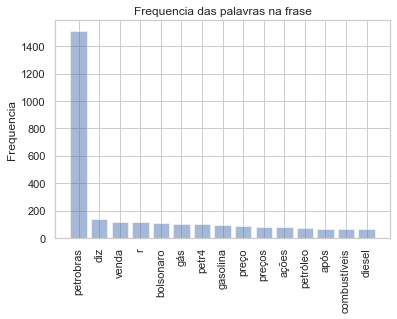

In [202]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

palavras = mais_frequentes
y_pos = np.arange(len(palavras))
contagem = frequencia_values

plt.bar(y_pos, contagem, align='center', alpha=0.5)
plt.xticks(y_pos, palavras,rotation='vertical' )
plt.ylabel('Frequencia')
plt.title('Frequencia das palavras na frase')

plt.show()

## Encontrando correlação palavras mais frequentes vs fechamento

In [203]:
df_palavras = df_final2.copy()
df_palavras.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2021-01-04      19.27  74719700  0.02           1   
1 2021-01-05      20.03  95181100  0.04           1   
2 2021-01-06      20.07  96562500  0.00           1   
3 2021-01-07      20.67  56171300  0.03           1   
5 2021-01-11      20.57  48744700 -0.01           0   

                                            Noticias  score Sentimento  
0   tcu avalia barrar venda de refinaria da petro...     -1   Negativo  
1   petrobras (petr4) inicia contratação de nona ...      0     Neutro  
2   valor de venda de refinaria da petrobras é qu...     -1   Negativo  
3   petrobras confirma venda da fatia na br distr...      0     Neutro  
5    silva e luna 'militariza' cúpula da petrobra...      0     Neutro

In [215]:
# Cria uma lista das n palavras mais frequentes
mais_frequentes = []
frequencia_values = []

for tupla in fdist.most_common(50):     ## fdist.most_common(15) retorna 15 palavras mais frequentes
    mais_frequentes.append(tupla[0])
    frequencia_values.append(tupla[1])

In [216]:
## Cria uma coluna no df com cada palavra retornada no passo anterior
for palavra in mais_frequentes:
    df_palavras[palavra] = df_palavras['Noticias'].apply(lambda x: 1 if palavra in x else 0)
df_palavras.head()

Date  Adj Close    Volume  Var%  Fechamento  \
0 2021-01-04      19.27  74719700  0.02           1   
1 2021-01-05      20.03  95181100  0.04           1   
2 2021-01-06      20.07  96562500  0.00           1   
3 2021-01-07      20.67  56171300  0.03           1   
5 2021-01-11      20.57  48744700 -0.01           0   

                                            Noticias  score Sentimento  \
0   tcu avalia barrar venda de refinaria da petro...     -1   Negativo   
1   petrobras (petr4) inicia contratação de nona ...      0     Neutro   
2   valor de venda de refinaria da petrobras é qu...     -1   Negativo   
3   petrobras confirma venda da fatia na br distr...      0     Neutro   
5    silva e luna 'militariza' cúpula da petrobra...      0     Neutro   

   petrobras  diz  ...  sobe  bacia  privatização  contrato  ação  bahia  \
0          1    1  ...     0      0             0         0     0      1   
1          1    0  ...     0      0             0         0     1      0   
2          1    0  ...     0      0             0         0     1      0   
3          1    0  ...     0      0             0         0     1      0   
5          1    1  ...     1      0             0         1     1      1   

   quer  maior  plataforma  ibovespa  
0     0      0           0         0  
1     0      0           0         0  
2     0      0           0         0  
3     0      0           0         0  
5     1      0           0         0  

[5 rows x 58 columns]

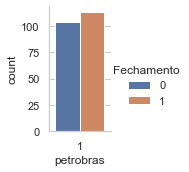

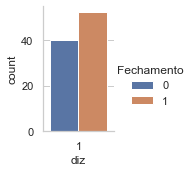

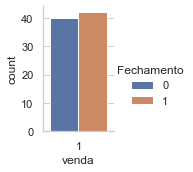

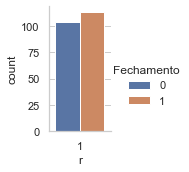

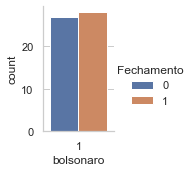

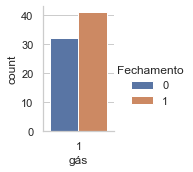

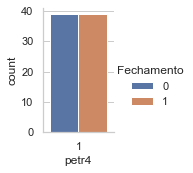

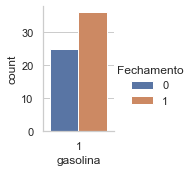

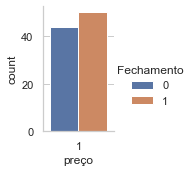

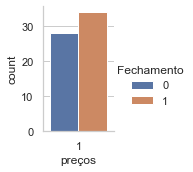

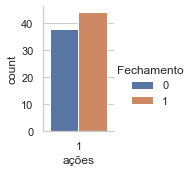

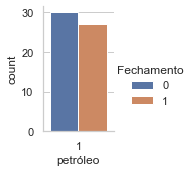

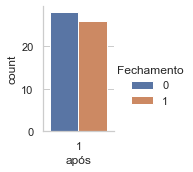

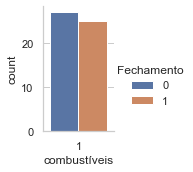

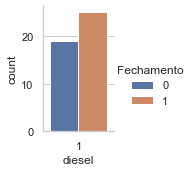

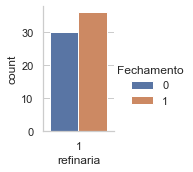

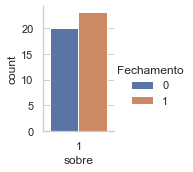

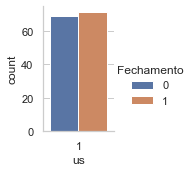

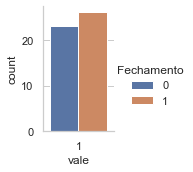

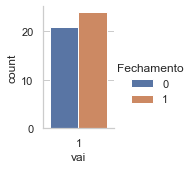

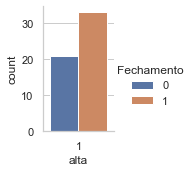

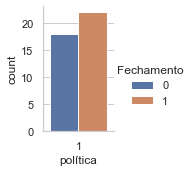

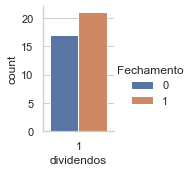

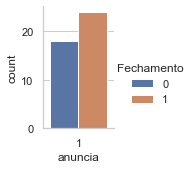

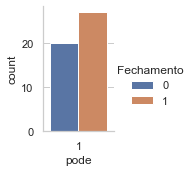

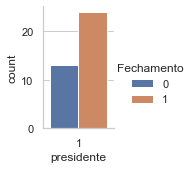

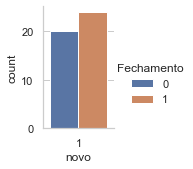

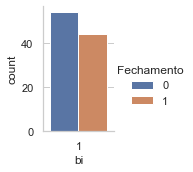

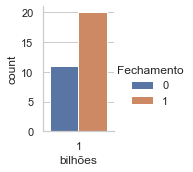

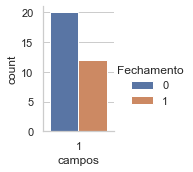

In [212]:
## Plotando as tendencias de baixa e queda por palavra:

for palavra in mais_frequentes:

    sns.catplot(data=df_palavras[df_palavras[palavra]==1], x=palavra, hue = 'Fechamento', kind="count", height=2.5, aspect=.8)

In [217]:
qtde_alta = []
qtde_baixa = []
tendencia_alta_valores = []

for palavra in mais_frequentes:
    
    #Filtrando a quantidade de fechamentos alta/baixa por palavra
    serie = df_palavras[df_palavras[palavra]==1].Fechamento.value_counts()
    
    baixas = serie[0]
    altas = serie[1]
    total = serie[0]+serie[1]
    tendencia_alta = altas/total
    
    #Armazenando os resultados
    qtde_alta.append(altas)
    qtde_baixa.append(baixas)
    tendencia_alta_valores.append(tendencia_alta)

In [218]:
df_palavras_freq = pd.DataFrame(list(zip(mais_frequentes, frequencia_values,qtde_alta,qtde_baixa,tendencia_alta_valores)),
               columns =['palavra', 'frequencia_df','qtde_alta','qtde_baixa', '%_tendencia_alta'])
df_palavras_freq.sort_values(by = "%_tendencia_alta", ascending = False)

palavra  frequencia_df  qtde_alta  qtde_baixa  %_tendencia_alta
43      contrato             30         25          13              0.66
25    presidente             45         24          13              0.65
28       bilhões             41         20          11              0.65
30       milhões             37         18          11              0.62
20          alta             51         33          21              0.61
39       mercado             31         18          12              0.60
7       gasolina             96         36          25              0.59
24          pode             46         27          20              0.57
40          sobe             31         20          15              0.57
23       anuncia             50         24          18              0.57
14        diesel             64         25          19              0.57
32    refinarias             35         17          13              0.57
47         maior             28         17          13              0.57
42  privatização             30         13          10              0.57
1            diz            135         52          40              0.57
34         vende             33         27          21              0.56
31      reajuste             35         18          14              0.56
5            gás            104         41          32              0.56
22    dividendos             51         21          17              0.55
21      política             51         22          18              0.55
9         preços             82         34          28              0.55
15     refinaria             58         36          30              0.55
26          novo             45         24          20              0.55
37        brasil             32         19          16              0.54
10         ações             79         44          38              0.54
38         lucro             32         15          13              0.54
16         sobre             57         23          20              0.53
19           vai             53         24          21              0.53
36       governo             33         16          14              0.53
8          preço             88         50          44              0.53
18          vale             53         26          23              0.53
44          ação             29         69          63              0.52
0      petrobras           1512        113         104              0.52
3              r            116        113         104              0.52
35       aumento             33         16          15              0.52
2          venda            118         42          40              0.51
4      bolsonaro            112         28          27              0.51
17            us             55         71          69              0.51
49      ibovespa             28         11          11              0.50
46          quer             28         14          14              0.50
6          petr4            103         39          39              0.50
12          após             68         26          28              0.48
13  combustíveis             64         25          27              0.48
45         bahia             28         12          13              0.48
33         campo             33         27          30              0.47
11      petróleo             70         27          30              0.47
41         bacia             31         13          15              0.46
27            bi             44         44          54              0.45
48    plataforma             28         14          23              0.38
29        campos             40         12          20              0.38

# 9.0 Treinamento e tunagem de modelos - features do dia até features de 3 dias anteriores

In [171]:
df_final9 = df_final99.copy()

## 8.1 PassiveAggressiveClassifier
- Gridsearch (Hiperparametros, PCA)
- CrossValidation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)

In [ ]:
scoring = {"accuracy": acuracia_dados, "f1":f1_dados}

In [ ]:
resultados = []


X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento']  

#Holdout fora do loop para não variar conjunto de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


#Validação cruzada com 10 kfolds
kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
#Repete os experimentos 20x
for i in range(20):
    
    print("Fazendo gridsearch - Repeticao %s" % (i))
    
    gs = GridSearchCV(
        PassiveAggressiveClassifier(random_state=i),
        param_grid={"max_iter": [25,50,100,200,500,700,1000,1200,1500], "tol": [0.01, 0.001, 0.0001], "C": [0.01,0.05,0.1,0.5,1.0,1.5]},
        scoring=scoring,
        refit="f1",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
      
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    
    
    #Calculando Recall clase 1
    rec0_teste = roc_auc_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = roc_auc_score(y_test, y_test_pred, pos_label=1)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_iter'],hyperparams['tol'],hyperparams['C'],acuracy_treino,accuracy_teste,f1_teste,auc_teste]))
    

In [ ]:
pd.set_option('display.precision',4)

In [ ]:
pd.reset_option('^display.',silent=True)

In [ ]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_iter', 'tol','C','acuracy_treino','acuracia_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'f1_teste', ascending = False)

Resultados:

- modelos com max_iter = 25 perfomou melhor (testaremos para valores <=25)
- modelos com tol = 0.001 e 0.0001 perfomaram melhor  
- modelos com C = 0.05, 0.01 e 0.1 performaram melhor (testaremos para mais valores entre 0.05 e 0.1)

Refinando a solução para os hiperparâmetros e aumentando as repetições:

In [ ]:
resultados = []


X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento']  

#Holdout fora do loop para não variar conjunto de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


#Validação cruzada com 10 kfolds
kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
#Repete os experimentos 20x
for i in range(20):
    
    print("Fazendo gridsearch - Repeticao %s" % (i))
    
    gs = GridSearchCV(
        PassiveAggressiveClassifier(random_state=i),
        param_grid={"max_iter": [6,8,10,12,14,16,18,20], "tol": [0.001, 0.0001], "C": [0.01,0.03,0.05,0.07,0.09,0.1]},
        scoring=scoring,
        refit="f1",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
      
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_iter'],hyperparams['tol'],hyperparams['C'],acuracy_treino,accuracy_teste,f1_teste,auc_teste]))
    

In [ ]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_iter', 'tol','C','acuracy_treino','acuracia_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'f1_teste', ascending = False)

Resultados

-  Modelos com max_iter = 8,10,14,20 performaram melhor
-  Modelos com tol = 0.001 perfomaram melhor

Refinando a solução para os hiperparâmetros:

In [ ]:
resultados = []


X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento']  

#Holdout fora do loop para não variar conjunto de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


#Validação cruzada com 10 kfolds
kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
#Repete os experimentos 30x
for i in range(30):
    
    print("Fazendo gridsearch - Repeticao %s" % (i))
    
    gs = GridSearchCV(
        PassiveAggressiveClassifier(random_state=i),
        param_grid={"max_iter": [8,10,14,20], "tol": [0.001], "C": [0.01,0.03,0.05,0.07,0.09,0.1]},
        scoring=scoring,
        refit="f1",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
      
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_iter'],hyperparams['tol'],hyperparams['C'],acuracy_treino,accuracy_teste,f1_teste,auc_teste]))
    

In [ ]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_iter', 'tol','C','acuracy_treino','acuracia_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'f1_teste', ascending = False)

Resultados

- Modelos com max_iter = 14 performaram melhor; 
- Modelos com tol = 0.001 performaram melhor;  
- Modelos com C = 0.03 e 0.09 performaram melhor; 

Refinando a solução para os hiperparâmetros:



In [ ]:
resultados = []


X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento']  

#Holdout fora do loop para não variar conjunto de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


#Validação cruzada com 10 kfolds
kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
#Repete os experimentos 30x
for i in range(30):
    
    print("Fazendo gridsearch - Repeticao %s" % (i))
    
    gs = GridSearchCV(
        PassiveAggressiveClassifier(random_state=i),
        param_grid={"max_iter": [14], "tol": [0.001], "C": [0.03,0.09]},
        scoring=scoring,
        refit="f1",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
      
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_iter'],hyperparams['tol'],hyperparams['C'],acuracy_treino,accuracy_teste,f1_teste,auc_teste]))
    

In [ ]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_iter', 'tol','C','acuracy_treino','acuracia_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'f1_teste', ascending = False)

Hiperparâmetros

max_iter = 14  
tol = 0.001  
C = 0.03   

### 8.1.1 Avaliação do PassiveAgressiveClassifier

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

passagress = PassiveAggressiveClassifier(random_state=1, max_iter = 14, tol = 0.001, C = 0.03)
passagress.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = passagress.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)


#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#calculando f1_score
f1 = f1_score(y_test, y_pred)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("F1_Score: %s" % (f1))
print("AUC: %s" % (auc))

O Modelo aprendeu a classificar bem quando há aumento nos valores das ações mas erra bastante quando há queda nos valores embora os dados estejam balanceados.

### 8.1.2 Hyperparâmetros PassiveAggressiveClassifier + balanceamento

In [ ]:
resultados = []


X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  


## Balanceamento dos dados:
nr = NearMiss()
X, y = nr.fit_resample(X_todos, y_todos)
    
 #Holdout:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    
#Repete os experimentos 10x
for i in range(30):
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        PassiveAggressiveClassifier(random_state=i),
        param_grid={"max_iter": [25,50,100,200,500,700,1000,1200,1500], "tol": [0.01, 0.001, 0.0001], "C": [0.01,0.05,0.1,0.5,1.0,1.5]},
        scoring=scoring,
        refit="f1",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_iter'],hyperparams['tol'],hyperparams['C'],acuracy_treino,accuracy_teste,accuracy_todos,rec0_teste,rec0_todos,rec1_teste,rec1_todos,f1_teste,f1_todos,auc_teste,auc_todos]))
    

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_iter', 'tol','C','acuracy_treino','acuracia_teste','acuracia_df','rec_0_teste','rec_0_df','rec_1_teste','rec_1_df','f1_teste','f1_df','auc_teste','auc_df'])
resultados.sort_values(by = 'f1_teste', ascending = False)

Mesmo após balancear os exemplos em 50/50%  os valores de recall não ficaram equilibrados para o maior valor de f1-score.

Recall 0: 32.2%; 
Recall 1: 81.25% 

materemos o modelo final:

In [ ]:
passagress

In [ ]:
print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("F1_Score: %s" % (f1))
print("AUC: %s" % (auc))

## 8.2 GaussianNB

In [ ]:
from sklearn.metrics import balanced_accuracy_score

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)

scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        GaussianNB(),
        param_grid={"var_smoothing": [0.0000000000000001,0.000000000000001,0.00000000000001,0.0000000000001,0.000000000001,0.00000000001,0.0000000001,0.000000001,0.00000001,0.0000001,0.000001,0.00001]}, #var_smoothing=1e-09 é o padrão
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['var_smoothing'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
pd.set_option('display.precision',10)
pd.reset_option('^display.',silent=True)

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','var_smoothing','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'acuracia_balanceada_teste', ascending = False)

Houve sempre a ocorrencia do mesmo hiperparâmetro e uma variância enorme nos resultados. Talvez esse não seja o melhor modelo!

Hiperparâmetros

- var_smoothing = 0.0000000000000001

### 8.2.1 GaussianNB Final

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22, stratify=y)

gaussianb = GaussianNB(var_smoothing=0.0000000000000001)
gaussianb.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = gaussianb.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

O modelo acerta muito as classes 0 e erra as classes 1. É o comportamento inverso ao modelo PassiveAgressive

In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)


#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

## 8.3 BernoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)

scoring = {"accuracy": acuracia_dados, "f1":f1_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        BernoulliNB(),
        param_grid={"alpha": [0,1,10,20,30,40,50], "binarize": np.linspace(0,1,11)}, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['alpha'],hyperparams['binarize'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','alpha','binarize','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros:

Alpha = 0 
Binarize = 0.1

### 8.3.1 BernoulliNB - Modelo Final

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

bernoullinb = BernoulliNB(alpha=0,binarize=0.1)
bernoullinb.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = bernoullinb.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")


In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)


#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Obs: Quando inputamos valores de Binazire tendendo á 1 o algorítmo tende a errar todas as classes 0 e acertar todas as classes 1. Como um dado viciado ou uma moeda de uma cara só.

## 8.4 QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)

scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        QuadraticDiscriminantAnalysis(),
        param_grid={"reg_param": np.linspace(0.1,1,10), "store_covariance":[True,False], "tol":[1000,100,10,1,0.1,0.01,0.001,0.0001]}, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['reg_param'],hyperparams['store_covariance'],hyperparams['tol'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
pd.set_option('display.precision',4)

In [ ]:
pd.reset_option('^display.',silent=True)

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','reg_param','store_covariance','tol','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- reg_param: entre 0.1 e 0.8 
- store_covarianve: true  
- tol: >=1000

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        QuadraticDiscriminantAnalysis(),
        param_grid={"reg_param": [0.1,0.8], "store_covariance":[True,False], "tol":[10000,1000,100]}, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['reg_param'],hyperparams['store_covariance'],hyperparams['tol'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','reg_param','store_covariance','tol','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- reg_param: 0.1
- store_covarianve: true  
- tol: 10000

### 8.4.1 QuadraticDiscriminantAnalysis Modelo Final

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

quadratic = QuadraticDiscriminantAnalysis(reg_param = 0.1, store_covariance= True, tol = 10000)
quadratic.fit(X_train,y_train)


In [ ]:
#Predizendo y
y_pred = quadratic.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)


#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

## 8.5 LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        LGBMClassifier(random_state=i),
        param_grid={"max_depth": [-1,100], 
                    "learning_rate": [0.1,0.2,0.3], 
                    "n_estimators": [100,50,150], 
                    "num_leaves": [31,10,50]   }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth: -1 (sem limite)
- learning_rate	: >=0.3
- num_estimator <=100
- num_leaves ?

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        LGBMClassifier(random_state=i),
        param_grid={"max_depth": [-1,100], 
                    "learning_rate": [0.3,0.5,0.7], 
                    "n_estimators": [20,30,40,50,60,70,80,90,100], 
                    "num_leaves": [31,10,50]   }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],hyperparams['num_leaves'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
pd.set_option('display.precision',4)

In [ ]:
pd.reset_option('^display.',silent=True)

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','num_leaves','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth: -1 (sem limite)
- learning_rate	: entre 0.7 e 0.5
- num_estimator entre 90 e 70
- num_leaves próximo a 31 (>10 e <50)

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
auc_dados = make_scorer(roc_auc_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 20x
for i in range(20):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        LGBMClassifier(random_state=i),
        param_grid={"max_depth": [-1], 
                    "learning_rate": [0.5,0.6,0.7,0.8], 
                    "n_estimators": [70,75,80,85,90], 
                    "num_leaves": [15,20,25,30,31,35,40,45]   }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],hyperparams['num_leaves'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','num_leaves','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth: -1 (sem limite)
- learning_rate	: 0,6
- num_estimator entre 80 e 85
- num_leaves próximo a <=15

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 20x
for i in range(20):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        LGBMClassifier(random_state=i),
        param_grid={"max_depth": [-1], 
                    "learning_rate": [0.6], 
                    "n_estimators": [76,77,78,79,80,81,82,83,84,85], 
                    "num_leaves": [2,4,6,8,10,11,12,13,14,15]   }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],hyperparams['num_leaves'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','num_leaves','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth: -1 (sem limite)
- learning_rate	: 0,6
- num_estimator: 78
- num_leaves: 4

### 8.5.1 LGBM Modelo final

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

lgbm = LGBMClassifier(max_depth = -1,learning_rate = 0.6, num_estimator = 78, num_leaves = 4,  random_state=3)
lgbm.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = lgbm.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")


In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)


#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

## 8.6 RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 10x
for i in range(10):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        RandomForestClassifier(random_state=i) ,
        param_grid={"max_depth": [10,20,30], 
                    "min_samples_leaf": [1,2,5,10,15], 
                    "min_samples_split": [2,5,10,15],
                    "criterion": ['gini','entropy','log_loss']}, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['min_samples_split'],hyperparams['criterion'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','min_samples_leaf','min_samples_split','criterion','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth: entre 10 e 20
- min_samples_leaf	: entre 2 e 1
- min_samples_split: entre 5 e 15 ou >=15
- criterion: entropy

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 10x
for i in range(10):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        RandomForestClassifier(random_state=i) ,
        param_grid={"max_depth": [10,12,14,16,18,20], 
                    "min_samples_leaf": [1,2], 
                    "min_samples_split": [5,15,20,25,30],
                    "criterion": ['entropy']}, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['min_samples_split'],hyperparams['criterion'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','min_samples_leaf','min_samples_split','criterion','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth: 10
- min_samples_leaf	: entre 2 e 1
- min_samples_split: entre 5 e 15
- criterion: entropy

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 10x
for i in range(10):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        RandomForestClassifier(random_state=i) ,
        param_grid={"max_depth": [10], 
                    "min_samples_leaf": [1,2], 
                    "min_samples_split": [5,7,9,11,13,15],
                    "criterion": ['entropy']}, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['min_samples_split'],hyperparams['criterion'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','min_samples_leaf','min_samples_split','criterion','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth = 10
- min_samples_leaf	= 2 
- min_samples_split = 5
- criterion = entropy

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

rf = RandomForestClassifier(random_state=1, max_depth = 10, min_samples_leaf = 2, 
                            min_samples_split = 5, criterion = 'entropy')
rf.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = rf.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")


In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)


#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

## 8.7 NearestCentroid

In [259]:
from sklearn.neighbors import NearestCentroid

In [260]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}


In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        NearestCentroid() ,
        param_grid={"metric": ['euclidean','manhattan'], 
                    "shrink_threshold": [None,0.2,0.5,1]}, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['metric'],hyperparams['shrink_threshold'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','metric','shrink_threshold','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

In [ ]:
resultados

Hiperparâmetros

- metric = 'euclidean'
- shrink_threshold = None 

In [261]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

nearestcentroid = NearestCentroid(metric = 'euclidean', shrink_threshold = None )
nearestcentroid.fit(X_train,y_train)

NearestCentroid()

In [262]:
#Predizendo y
y_pred = nearestcentroid.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.54      0.61      0.58        31
           1       0.60      0.53      0.56        34

    accuracy                           0.57        65
   macro avg       0.57      0.57      0.57        65
weighted avg       0.57      0.57      0.57        65


Confusion Matrix Dados de Producao:
 [[19 12]
 [16 18]]



In [263]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Recall_0: 0.6129032258064516
Recall_1: 0.5294117647058824
Acuracia: 0.5692307692307692
Acuracia Balanceada: 0.571157495256167
F1_Score_0: 0.5757575757575757
F1_Score_1: 0.5625
AUC: 0.571157495256167


## 8.8 NuSVC

In [ ]:
from sklearn.svm import NuSVC

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        NuSVC(random_state=i) ,
        param_grid={"nu": [0.2,0.4,0.5,0.6,0.8,1], 
                    "kernel": ['linear', 'poly', 'rbf','sigmoid'],
                    "gamma": ['scale','auto']}, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['nu'],hyperparams['kernel'],hyperparams['gamma'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','nu','kernel','gamma','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- nu = 0.8
- kernel = 'rbf'
- gamma = 'auto'

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

nusvc = NuSVC(random_state=10, nu = 0.8, kernel = 'rbf', gamma = 'auto')
nusvc.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = nusvc.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")


In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))


## 8.9 XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}


In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        XGBClassifier(random_state=i) ,
        param_grid={"max_depth": [-1,10,20,50],  #-1 is no limit
                    "learning_rate": [0.1,0.5,0.8], #0.1 is standard
                    "n_estimators": [70,100,150,200] ## 100 is standard
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
pd.set_option('display.precision',4)

In [ ]:
pd.reset_option('^display.',silent=True)

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth <=10
- learning_rate entre 0.5 e 0.1
- n_estimators >70 e <150 (próximo a 100)

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        XGBClassifier(random_state=i) ,
        param_grid={"max_depth": [-1,2,4,6,8,10],  #-1 is no limit
                    "learning_rate": [0.1,0.2,0.3,0.4,0.5], #0.1 is standard
                    "n_estimators": [80,90,100,110,120,130] ## 100 is standard
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

In [ ]:
Hiperparâmetros

- max_depth >=2 e <=5
- learning_rate entre 0.4 e 0.3
- n_estimators >=90 e <=120 

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        XGBClassifier(random_state=i) ,
        param_grid={"max_depth": [2,3,4,5],  
                    "learning_rate": [0.3,0.35,0.4], #0.1 is standard
                    "n_estimators": [90,95,100,105,110,115,120] ## 100 is standard
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth = 4
- learning_rate = 0.4
- n_estimators entre >=80 e <=90 ou >= 95 e <=115

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        XGBClassifier(random_state=i) ,
        param_grid={"max_depth": [4],  
                    "learning_rate": [0.4], #0.1 is standard
                    "n_estimators": [80,82,84,86,88,90,92,94,95,96,98,100,102,104,106,108,110,112,114,115] ## 100 is standard
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth = 4
- learning_rate = 0.4
- n_estimators >=115


In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        XGBClassifier(random_state=i) ,
        param_grid={"max_depth": [4],  
                    "learning_rate": [0.4], #0.1 is standard
                    "n_estimators": range(115,131,1) ## 100 is standard
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['max_depth'],hyperparams['learning_rate'],hyperparams['n_estimators'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- max_depth = 4
- learning_rate = 0.4
- n_estimators = 115

Durante a procura por hyperparâmetros outro modelo se destacou com n_estimator = 120, vamos armazená-lo também para verificar qual possui maior desempenho posteriormente


In [ ]:

X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29, stratify=y)

xgb = XGBClassifier(random_state=29, max_depth = 4, learning_rate = 0.4, n_estimators = 115)
xgb.fit(X_train,y_train)

xgb_2 = XGBClassifier(random_state=29, max_depth = 4, learning_rate = 0.4, n_estimators = 120)  ##Modelo2
xgb_2.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = xgb.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Desempenho modelo 1")
print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))


In [ ]:
#Predizendo y
y_pred = xgb_2.predict(X_test)
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Desempenho modelo 2")
print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))


## 8.10 SGDClassifier;

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        SGDClassifier(random_state=i) ,
        param_grid={"loss": ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],   #Hinge is default, modified huber é robusto a outliers
                    "max_iter": [500,800,900,1000,1100,1200,1500], #1000 is default
                    "learning_rate": ['optimal']
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['loss'],hyperparams['max_iter'],hyperparams['learning_rate'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','loss','max_iter','learning_rate','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- loss entre squared_epsilon_insensitive e hinge
- max_iter <= 500
- learning_rate = optimal

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        SGDClassifier(random_state=i) ,
        param_grid={"loss": ['hinge','squared_epsilon_insensitive'],   #Hinge is default, modified huber é robusto a outliers
                    "max_iter": [50,60,70,80,90,100,150,200,250,300,350,400,450,500], 
                    "learning_rate": ['optimal']
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['loss'],hyperparams['max_iter'],hyperparams['learning_rate'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','loss','max_iter','learning_rate','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- loss = squared_epsilon_insensitive
- max_iter <= 150
- learning_rate = optimal

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        SGDClassifier(random_state=i) ,
        param_grid={"loss": ['squared_epsilon_insensitive'],   #Hinge is default, modified huber é robusto a outliers
                    "max_iter": range(5,155,5), 
                    "learning_rate": ['optimal']
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['loss'],hyperparams['max_iter'],hyperparams['learning_rate'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','loss','max_iter','learning_rate','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

A repetição 7 está inviesada sempre prioriza valores altos de max_iter, o primeiro registro de acurácia 63% pode ser ignorado!

Hiperparâmetros

- loss = squared_epsilon_insensitive
- max_iter <= 80 e >=55
- learning_rate = optimal

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        SGDClassifier(random_state=i) ,
        param_grid={"loss": ['squared_epsilon_insensitive'],   #Hinge is default, modified huber é robusto a outliers
                    "max_iter": [55,60,65,70,75,80], 
                    "learning_rate": ['optimal']
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['loss'],hyperparams['max_iter'],hyperparams['learning_rate'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','loss','max_iter','learning_rate','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- loss = squared_epsilon_insensitive
- max_iter <= 80 e >=70
- learning_rate = optimal

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        SGDClassifier(random_state=i) ,
        param_grid={"loss": ['squared_epsilon_insensitive'],   #Hinge is default, modified huber é robusto a outliers
                    "max_iter": [70,72,74,76,78,80], 
                    "learning_rate": ['optimal']
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['loss'],hyperparams['max_iter'],hyperparams['learning_rate'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','loss','max_iter','learning_rate','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- loss = squared_epsilon_insensitive
- max_iter = 78
- learning_rate = optimal

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sgd = SGDClassifier(random_state=1,loss = 'squared_epsilon_insensitive',max_iter = 78,learning_rate = 'optimal')
sgd.fit(X_train,y_train)


In [ ]:
#Predizendo y
y_pred = sgd.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

## 8.11 Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        Perceptron(random_state=i) ,
        param_grid={"penalty": [None,'l2','l1','elasticnet'],   #None is default, modified huber é robusto a outliers
                    "alpha": [0.0001,0.001,0.01,0.00001], ## 0.0001 is default
                    "max_iter": [500,600,900,1000,1100,1200] ## 1000 is default
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['penalty'],hyperparams['alpha'],hyperparams['max_iter'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','penalty','alpha','max_iter','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados['auc_teste'] = resultados['auc_teste'].astype(float, errors = 'raise')
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- penalty entre None e l1
- alpha = 0.0001
- max_iter <=500

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        Perceptron(random_state=i) ,
        param_grid={"penalty": [None,'l1'],   #None is default, modified huber é robusto a outliers
                    "alpha": [0.0001], ## 0.0001 is default
                    "max_iter": [50,100,150,200,250,300,350,400,450,500] ## 1000 is default
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['penalty'],hyperparams['alpha'],hyperparams['max_iter'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','penalty','alpha','max_iter','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados['auc_teste'] = resultados['auc_teste'].astype(float, errors = 'raise')
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- penalty entre None e l1
- alpha = 0.0001
- max_iter <=100

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        Perceptron(random_state=i) ,
        param_grid={"penalty": [None,'l1'],   #None is default, modified huber é robusto a outliers
                    "alpha": [0.0001], ## 0.0001 is default
                    "max_iter": range(5,105,5) ## 1000 is default
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['penalty'],hyperparams['alpha'],hyperparams['max_iter'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))
    
    
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','penalty','alpha','max_iter','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados['auc_teste'] = resultados['auc_teste'].astype(float, errors = 'raise')
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- penalty entre None e l1
- alpha = 0.0001
- max_iter <=15

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        Perceptron(random_state=i) ,
        param_grid={"penalty": [None,'l1'],   #None is default, modified huber é robusto a outliers
                    "alpha": [0.0001], ## 0.0001 is default
                    "max_iter": range(2,16,1) ## 1000 is default
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['penalty'],hyperparams['alpha'],hyperparams['max_iter'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))
    
    
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','penalty','alpha','max_iter','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados['auc_teste'] = resultados['auc_teste'].astype(float, errors = 'raise')
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- penalty = None
- alpha = 0.0001
- max_iter <=8

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        Perceptron(random_state=i) ,
        param_grid={"penalty": [None],   #None is default, modified huber é robusto a outliers
                    "alpha": [0.0001], ## 0.0001 is default
                    "max_iter": [2,3,4,5,6,7,8] ## 1000 is default
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['penalty'],hyperparams['alpha'],hyperparams['max_iter'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))
    
    
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','penalty','alpha','max_iter','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados['auc_teste'] = resultados['auc_teste'].astype(float, errors = 'raise')
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- penalty = None
- alpha = 0.0001
- max_iter 2,3 ou 8

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        Perceptron(random_state=i) ,
        param_grid={"penalty": [None],   #None is default, modified huber é robusto a outliers
                    "alpha": [0.0001], ## 0.0001 is default
                    "max_iter": [2,3,8] ## 1000 is default
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['penalty'],hyperparams['alpha'],hyperparams['max_iter'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))
    
    
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','penalty','alpha','max_iter','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados['auc_teste'] = resultados['auc_teste'].astype(float, errors = 'raise')
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- penalty = None
- alpha = 0.0001
- max_iter 2 ou 3

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        Perceptron(random_state=i) ,
        param_grid={"penalty": [None],   #None is default, modified huber é robusto a outliers
                    "alpha": [0.0001], ## 0.0001 is default
                    "max_iter": [2,3] ## 1000 is default
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['penalty'],hyperparams['alpha'],hyperparams['max_iter'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))
    
    
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','penalty','alpha','max_iter','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados['auc_teste'] = resultados['auc_teste'].astype(float, errors = 'raise')
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- penalty = None
- alpha = 0.0001
- max_iter 3

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

perceptron = Perceptron(random_state=15,penalty = None,alpha = 0.0001, max_iter = 3)
perceptron.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = perceptron.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))


## 8.12 DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        DecisionTreeClassifier(random_state=i) ,
        param_grid={"criterion": ['gini', 'entropy','log_loss'],   #gini is default, modified huber é robusto a outliers
                    "splitter": ['best', 'random'], ## best is default
                    "max_depth": [None,10,50,100], ## None is default
                    "min_samples_split": [1,10,50], ##1 is default
                    "min_samples_leaf": [2,10,50] ##2 is default
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['criterion'],hyperparams['splitter'],hyperparams['max_depth'],hyperparams['min_samples_split'],hyperparams['min_samples_leaf'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))
    
    
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','criterion','splitter','max_depth','min_samples_split','min_samples_leaf','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados['auc_teste'] = resultados['auc_teste'].astype(float, errors = 'raise')
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- criterion = 'gini'
- splitter = 'best'
- max_depth = None
- min_samples_split por volta de 10 (>=2 e <=50)
- min_samples_leaf >=50

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        DecisionTreeClassifier(random_state=i) ,
        param_grid={"criterion": ['gini'],   #gini is default, modified huber é robusto a outliers
                    "splitter": ['best'], ## best is default
                    "max_depth": [None], ## None is default
                    "min_samples_split": [1,5,10,15,20,25,30,35,40,45,50], ##1 is default
                    "min_samples_leaf": [50,100,150,200] ##2 is default
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['criterion'],hyperparams['splitter'],hyperparams['max_depth'],hyperparams['min_samples_split'],hyperparams['min_samples_leaf'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))
    
    
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','criterion','splitter','max_depth','min_samples_split','min_samples_leaf','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados['auc_teste'] = resultados['auc_teste'].astype(float, errors = 'raise')
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- criterion = 'gini'
- splitter = 'best'
- max_depth = None
- min_samples_split por volta de 5 (<=10)
- min_samples_leaf por volta de 50 (<=100 e >=50)

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        DecisionTreeClassifier(random_state=i) ,
        param_grid={"criterion": ['gini'],   #gini is default, modified huber é robusto a outliers
                    "splitter": ['best'], ## best is default
                    "max_depth": [None], ## None is default
                    "min_samples_split": [1,2,3,4,5,6,7,8,9,10], ##1 is default
                    "min_samples_leaf": [50,55,60,65,70,75,80,85,90,95,100] ##2 is default
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['criterion'],hyperparams['splitter'],hyperparams['max_depth'],hyperparams['min_samples_split'],hyperparams['min_samples_leaf'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))
    
    
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','criterion','splitter','max_depth','min_samples_split','min_samples_leaf','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados['auc_teste'] = resultados['auc_teste'].astype(float, errors = 'raise')
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- criterion = 'gini'
- splitter = 'best'
- max_depth = None
- min_samples_split = 2
- min_samples_leaf <= 55 e >=50

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 50x
for i in range(50):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        DecisionTreeClassifier(random_state=i) ,
        param_grid={"criterion": ['gini'],   #gini is default, modified huber é robusto a outliers
                    "splitter": ['best'], ## best is default
                    "max_depth": [None], ## None is default
                    "min_samples_split": [2], ##1 is default
                    "min_samples_leaf": [50,51,52,53,54,55] ##2 is default
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['criterion'],hyperparams['splitter'],hyperparams['max_depth'],hyperparams['min_samples_split'],hyperparams['min_samples_leaf'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))
    
    
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','criterion','splitter','max_depth','min_samples_split','min_samples_leaf','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados['auc_teste'] = resultados['auc_teste'].astype(float, errors = 'raise')
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- criterion = 'gini'
- splitter = 'best'
- max_depth = None
- min_samples_split = 2
- min_samples_leaf entre 50, 54 e 52

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 50x
for i in range(50):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        DecisionTreeClassifier(random_state=i) ,
        param_grid={"criterion": ['gini'],   #gini is default, modified huber é robusto a outliers
                    "splitter": ['best'], ## best is default
                    "max_depth": [None], ## None is default
                    "min_samples_split": [2], ##1 is default
                    "min_samples_leaf": [50,52,54] ##2 is default
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['criterion'],hyperparams['splitter'],hyperparams['max_depth'],hyperparams['min_samples_split'],hyperparams['min_samples_leaf'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))
    
    
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','criterion','splitter','max_depth','min_samples_split','min_samples_leaf','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados['auc_teste'] = resultados['auc_teste'].astype(float, errors = 'raise')
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- criterion = 'gini'
- splitter = 'best'
- max_depth = None
- min_samples_split = 2
- min_samples_leaf = 50

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28, stratify=y)

dt = DecisionTreeClassifier(random_state=28, criterion = 'gini', splitter = 'best', max_depth = None, min_samples_split = 2,min_samples_leaf = 50 )
dt.fit(X_train,y_train)


In [ ]:
#Predizendo y
y_pred = dt.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

In [ ]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))


## 8.13 MLP

In [ ]:
from sklearn.neural_network import MLPClassifier 

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 10x
for i in range(10):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        MLPClassifier(random_state=i) ,
        param_grid={"hidden_layer_sizes": [10], 
                    "max_iter": [200], 
                    "activation": ['identity','logistic','tanh','relu'],
                    "learning_rate_init": [0.001],
                    "solver": ['lbfgs','sgd','adam'],
                    "alpha": [0.0001]   }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['hidden_layer_sizes'],hyperparams['max_iter'],hyperparams['activation'],hyperparams['learning_rate_init'],hyperparams['solver'],hyperparams['alpha'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','hidden_layer_sizes','max_iter','activation','learning_rate_init','solver','alpha','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- hidden_layer_sizes = 
- max_iter =
- activation = entre identity e relu
- learning_rate_init = 
- solver = entre adam e sgd
- alpha = 

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 10x
for i in range(10):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        MLPClassifier(random_state=i) ,
        param_grid={"hidden_layer_sizes": [10,20,30], 
                    "max_iter": [100,200,300], 
                    "activation": ['identity','relu'],
                    "learning_rate_init": [0.001,0.01,0.0001],
                    "solver": ['sgd','adam'],
                    "alpha": [0.0001, 0.001, 0.00001]   }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['hidden_layer_sizes'],hyperparams['max_iter'],hyperparams['activation'],hyperparams['learning_rate_init'],hyperparams['solver'],hyperparams['alpha'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','hidden_layer_sizes','max_iter','activation','learning_rate_init','solver','alpha','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- hidden_layer_sizes = entre 10 e 20
- max_iter = entre 200 e 300
- activation = relu
- learning_rate_init = 0.01
- solver = entre adam e sgd
- alpha = 0.0001

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 10x
for i in range(10):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        MLPClassifier(random_state=i) ,
        param_grid={"hidden_layer_sizes": [10,12,14,16,18,20], 
                    "max_iter": [200,220,240,260,280,300], 
                    "activation": ['relu'],
                    "learning_rate_init": [0.1,0.01],
                    "solver": ['sgd','adam'],
                    "alpha": [0.001]   }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['hidden_layer_sizes'],hyperparams['max_iter'],hyperparams['activation'],hyperparams['learning_rate_init'],hyperparams['solver'],hyperparams['alpha'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

In [ ]:
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','hidden_layer_sizes','max_iter','activation','learning_rate_init','solver','alpha','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- hidden_layer_sizes = 20
- max_iter = 280
- activation = relu
- learning_rate_init = 0.01
- solver = sgd
- alpha = 0.0001

### 8.13.1 MLP Modelo Final

In [ ]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

mlp = MLPClassifier(random_state=i, hidden_layer_sizes = 20,  max_iter = 280, activation = 'relu', 
                    learning_rate_init = 0.01, solver = 'sgd', alpha = 0.0001 )
mlp.fit(X_train,y_train)

In [ ]:
#Predizendo y
y_pred = mlp.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")


In [ ]:
#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

## 8.14 KNN

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [ ]:
resultados = []

#Definição dos dados
X_todos = df_final9[features+featuresd1+featuresd2+featuresd3]
y_todos = df_final9['Fechamento']  

    
#Repete os experimentos 30x
for i in range(30):
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    gs = GridSearchCV(
        KNeighborsClassifier() ,
        param_grid={"n_neighbors": [1,2,3,4,5,6,7],   ## 5 is default
                    "weights": ['uniform', 'distance'], ## uniform is default
                    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'], ## Auto is default
                    "metric": ['euclidean','manhattan','minkowski'], ## minkowski is default
                    }, 
        scoring=scoring,
        refit="bacuracy",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
            )
        
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    acuracy_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    #y_test_pred_todos = gs.predict(X_todos)
        
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)
        
    #calculando f1_score da classe 1
    f1_teste = f1_score(y_test, y_test_pred)
    #f1_todos = f1_score(y_todos, y_test_pred_todos)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)
        
    #Calculando Recall clase 1
    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)
    
    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)
    
    #Calculando a acurácia balanceada
    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['n_neighbors'],hyperparams['weights'],hyperparams['algorithm'],hyperparams['metric'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))
    
    
#transformando os resultados para dataframe e ordenando por recall da classe 0:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','n_neighbors','weights','algorithm','metric','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados['auc_teste'] = resultados['auc_teste'].astype(float, errors = 'raise')
resultados.sort_values(by = 'auc_teste', ascending = False)

Hiperparâmetros

- n_neighbors = 1
- weights = uniform
- algorithm = auto
- metric = manhattan

In [193]:
X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn = KNeighborsClassifier( n_neighbors = 1, weights = 'uniform', algorithm = 'auto',metric = 'manhattan' )
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [194]:
#Predizendo y
y_pred = knn.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")


Classification Report Dados:
               precision    recall  f1-score   support

           0       0.58      0.58      0.58        31
           1       0.62      0.62      0.62        34

    accuracy                           0.60        65
   macro avg       0.60      0.60      0.60        65
weighted avg       0.60      0.60      0.60        65


Confusion Matrix Dados de Producao:
 [[18 13]
 [13 21]]



In [195]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))


Recall_0: 0.5806451612903226
Recall_1: 0.6176470588235294
Acuracia: 0.6
Acuracia Balanceada: 0.599146110056926
F1_Score_0: 0.5806451612903226
F1_Score_1: 0.6176470588235294
AUC: 0.599146110056926


# 9.0 Avaliação estatística dos melhores algorítmos

Rodaremos 30 experimentos com 10 kfolds cada para cada algorítmo testado (14). (4200 experimentos no total)

- passagress
- gaussianb
- bernoullinb
- quadratic
- lgbm
- rf
- nearestcentroid
- nusvc
- xgb
- xgb_2
- sgd
- perceptron
- dt
- mlp
- knn

In [ ]:
resultados_passagress = []
resultados_gaussianb = []
resultados_bernoullinb = []
resultados_quadratic = []
resultados_lgbm = []
resultados_rf = []
resultados_nearestcentroid = []
resultados_nusvc = []
resultados_xgb = []
resultados_xgb_2 = []
resultados_sgd = []
resultados_perceptron = []
resultados_dt = []
resultados_mlp = []
resultados_knn = []

X = df_final9[features+featuresd1+featuresd2+featuresd3]
y = df_final9['Fechamento'] 

for i in range(30):

    #Holdout
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
    
    # 10 Kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    
    # Aplicação dos kfolds para avaliação estatística
    scores1 = cross_val_score(passagress, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores2 = cross_val_score(gaussianb, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores3 = cross_val_score(bernoullinb, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores4 = cross_val_score(quadratic, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores5 = cross_val_score(lgbm, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores6 = cross_val_score(rf, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores7 = cross_val_score(nearestcentroid, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores8 = cross_val_score(nusvc, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores9 = cross_val_score(xgb, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores10 = cross_val_score(xgb_2, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores11 = cross_val_score(sgd, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores12 = cross_val_score(perceptron, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores13 = cross_val_score(dt, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores14 = cross_val_score(mlp, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores15 = cross_val_score(knn, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    
    #Armazenando os resultados de cada algoritmo
    resultados_passagress.append(scores1.mean())   
    resultados_gaussianb.append(scores2.mean()) 
    resultados_bernoullinb.append(scores3.mean()) 
    resultados_quadratic.append(scores4.mean()) 
    resultados_lgbm.append(scores5.mean()) 
    resultados_rf.append(scores6.mean()) 
    resultados_nearestcentroid.append(scores7.mean()) 
    resultados_nusvc.append(scores8.mean()) 
    resultados_xgb.append(scores9.mean()) 
    resultados_xgb_2.append(scores10.mean()) 
    resultados_sgd.append(scores11.mean()) 
    resultados_perceptron.append(scores12.mean()) 
    resultados_dt.append(scores13.mean()) 
    resultados_mlp.append(scores14.mean()) 
    resultados_knn.append(scores15.mean()) 
    

In [ ]:
print("Results passagress: %.4f (%.4f) balanced_accuracy" % (scores1.mean(), scores1.std()))
print("Results gaussianb: %.4f (%.4f) balanced_accuracy" % (scores2.mean(), scores2.std()))
print("Results bernoullinb: %.4f (%.4f) balanced_accuracy" % (scores3.mean(), scores3.std()))
print("Results quadratic: %.4f (%.4f) balanced_accuracy" % (scores4.mean(), scores4.std()))
print("Results lgbm: %.4f (%.4f) balanced_accuracy" % (scores5.mean(), scores5.std()))
print("Results rf: %.4f (%.4f) balanced_accuracy" % (scores6.mean(), scores6.std()))
print("Results nearestcentroid: %.4f (%.4f) balanced_accuracy" % (scores7.mean(), scores7.std()))
print("Results nusvc: %.4f (%.4f) balanced_accuracy" % (scores8.mean(), scores8.std()))
print("Results xgb: %.4f (%.4f) balanced_accuracy" % (scores9.mean(), scores9.std()))
print("Results xgb_2: %.4f (%.4f) balanced_accuracy" % (scores10.mean(), scores10.std()))
print("Results sgd: %.4f (%.4f) balanced_accuracy" % (scores11.mean(), scores11.std()))
print("Results perceptron: %.4f (%.4f) balanced_accuracy" % (scores12.mean(), scores12.std()))
print("Results dt: %.4f (%.4f) balanced_accuracy" % (scores13.mean(), scores13.std()))
print("Results mlp: %.4f (%.4f) balanced_accuracy" % (scores14.mean(), scores14.std()))
print("Results knn: %.4f (%.4f) balanced_accuracy" % (scores15.mean(), scores15.std()))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
algoritmos = ['passagress', 'gaussianb', 'bernoullinb','quadratic','lgbm','rf','nearestcentroid','nusvc','xgb','xgb_2','sgd','perceptron','dt','mlp','knn']
resultados = [scores1,scores2,scores3,scores4,scores5,scores6,scores7,scores8,scores9,scores10,scores11,scores12,scores13,scores14,scores15]
# Comparando as performances nos conjunto de treinament/validacao
plt.figure(figsize=(10,6))
box_data = resultados
plt.boxplot(box_data, widths = 0.5)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], algoritmos, rotation='vertical')
# ax7.boxplot(box_data)
plt.show()

## 9.1 Testes de normalidade

In [ ]:
from scipy.stats import shapiro

In [ ]:
for i,results in enumerate(resultados):
    
    algor = algoritmos[i]
    _, p = shapiro(results)
    p
    alpha = 0.01
    if p > alpha:
      print('%s - p-value = %s - Distribuição normal' %(algor, str(p)))
    else:
      print('%s - p-value = %s - Distribuição não normal' %(algor, str(p)))

Todas distribuições de acurácia balanceada são normais iremos aplicar testes estatísticos paramétricos ANOVA para verificar se há diferença estatística significante entre os algorítmos

- nearestcentroid
- 

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(scores1,scores13)


alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Os dados possuem diferença estatística significante')
else:
  print('Hipótese alternativa rejeitada')

# 10.0 Machine Learning - Com features selecionadas

## Os experimentos da seção 6 - Experimentos features do dia atual, 7 - Experimentos com features de dias anteriores e 8 - Expermentos com melhor conjunto de features nos levaram as seguintes conclusões:

- Considerando todo o conjunto de features do dia atual + n dias anteriores:
        O conjunto composto por todas as features do dia + 1 dia anterior apresentou maior performance de classificação   (top 5 algoritmos Acurácia entre 58 e 56%)
        conjunto = ['polaridade', 'subjetividade', 'negatividade', 'neutralidade', 'positividade', 'composicao', 'score', 'neg_rob', 'neu_rob', 'pos_rob', 'polaridaded1', 'subjetividaded1', 'negatividaded1', 'neutralidaded1', 'positividaded1', 'composicaod1', 'scored1', 'neg_robd1', 'neu_robd1', 'pos_robd1']

        NuSVC
        ExtraTreesClassifier	
        BernoulliNB	
        SVC	
        LGBMClassifier


- Considerando a melhor seleção das features do conjunto de features do dia atual + n dias anteriores:
        O conjunto abaxo apresenta maior performance de classificação sem PCA e sem normalização  (top 5 algoritmos Acurácia entre 62 e 60%) sendo:
        conjunto1 = ['negatividaded4','pos_robd2','subjetividaded2','composicao','negatividade']  
        
       GaussianNB  
       NearestCentroid  
       RidgeClassifier  
       LinearSVC	
       LinearDiscriminantAnalysis	
        
- Considerando o conjunto de features apenas do dia atual:
        O conjunto de features das noticais do dia atual performou melhor com a aplicação de PCA e normalização em alguns casos (Acurácia entre 58% e 57%).

    
        features = ['polaridade', 'subjetividade', 'negatividade', 'neutralidade', 'positividade', 'composicao', 'score', 'neg_rob', 'neu_rob', 'pos_rob']
        KNeighborsClassifier c/ PCA = 2 e Normalização
        KNeighborsClassifier c/ PCA = 2 
        LabelPropagation c/ PCA = 2
        LabelSpreading	 c/ PCA = 2
        LabelSpreading	 c/ PCA = 2  Normalização

- Considerando a melhor seleção das features do conjunto de features do dia atual apenas:
        O conjunto abaixo apresentou melhor performance de classificação (top 5 algoritmos acurácia entre 63% e 61%)
        
        features = ['negatividade','polaridade','composicao','score', 'neg_rob']
        
        NearestCentroid	
        SVC	
        LinearDiscriminantAnalysis	
        RidgeClassifier	
        LinearSVC	
        
 ## Features selecionadas:
     De acordo com esses resultados selecionaremos as seguintes features
      
        features = ['negatividade','polaridade','composicao','score', 'neg_rob']
     
     
 ## Algoritmos selecionados:
 
    Também se destacaram os seguintes algorítmos:
    
    NearestCentroid  
    SVC  
    LinearDiscriminantAnalysis  
    RidgeClassifier  
    LinearSVC  
    RidgeClassifierCV  
    LogisticRegression  
    BernoulliNB  
    GaussianNB  
    LGBMClassifier  
    ExtraTreesClassifier  
    RandomForestClassifier  
    CalibratedClassifierCV  
    XGBClassifier  
    BaggingClassifier    
    QuadraticDiscriminantAnalysis  
    KNeighborsClassifier  
    DecisionTreeClassifier  
    NuSVC  

# 10.1 NearestCentroid

In [228]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}

In [230]:
resultados = []

#Definição dos dados
X_todos = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y_todos = df_final99['Fechamento']  

metric = ['euclidean','manhattan']
threshold = [None,0.2,0.5,1]

#Repete os experimentos 30x
for i in range(30):   
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in metric:
        
        # itera sobre parametro 2:
        for u in threshold:
        
            gs = GridSearchCV(
                NearestCentroid() ,
                param_grid={"metric": [k], 
                            "shrink_threshold":[u]}, 
                scoring=scoring,
                refit="bacuracy",
                n_jobs=2,
                return_train_score=True,
                cv = kfold
                    )

            #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
            gs.fit(X_train, y_train)

            #Melhores resultados e hiperparâmetros encontrados
            acuracy_treino = gs.best_score_
            hyperparams = gs.best_params_

            ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
            y_test_pred = gs.predict(X_test)
            #y_test_pred_todos = gs.predict(X_todos)

            #Calculando acurácia 
            accuracy_teste = accuracy_score(y_test, y_test_pred)
            #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

            #calculando f1_score da classe 1
            f1_teste = f1_score(y_test, y_test_pred)
            #f1_todos = f1_score(y_todos, y_test_pred_todos)

            #calculando área sobre a curva ROC_AUC:
            auc_teste = roc_auc_score(y_test, y_test_pred)
            #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

            #Calculando Recall clase 1
            rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
            rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

            #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
            #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

            #Calculando a acurácia balanceada
            accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

            # Adicionando todos resultados em uma única lista
            resultados.append(np.array([i,hyperparams['metric'],hyperparams['shrink_threshold'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [270]:
resultados = pd.DataFrame(np.array(resultados), columns=['repeticao','metric','shrink_threshold','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados['auc_teste'] = resultados['auc_teste'].astype(float, errors = 'raise')
resultados.astype({ 'shrink_threshold': 'str', 'metric': 'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['metric','shrink_threshold']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False)

acuracy_treino  acuracia_teste  \
metric    shrink_threshold                                   
euclidean None                        0.59            0.57   
          0.2                         0.58            0.56   
          0.5                         0.58            0.56   
          1                           0.55            0.55   
manhattan None                        0.56            0.55   
          0.2                         0.56            0.55   
          0.5                         0.56            0.55   
          1                           0.56            0.55   

                            acuracia_balanceada_teste  rec_0_teste  \
metric    shrink_threshold                                           
euclidean None                                   0.57         0.56   
          0.2                                    0.56         0.55   
          0.5                                    0.56         0.55   
          1                                      0.55         0.54   
manhattan None                                   0.55         0.55   
          0.2                                    0.55         0.55   
          0.5                                    0.55         0.54   
          1                                      0.55         0.54   

                            rec_1_teste  f1_teste  auc_teste  
metric    shrink_threshold                                    
euclidean None                     0.57      0.58       0.57  
          0.2                      0.57      0.58       0.56  
          0.5                      0.57      0.57       0.56  
          1                        0.56      0.56       0.55  
manhattan None                     0.55      0.56       0.55  
          0.2                      0.55      0.56       0.55  
          0.5                      0.55      0.56       0.55  
          1                        0.56      0.56       0.55

Hiperparâmetros

- shrink_threshold = None
- metric = Euclidian

In [275]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

nearestcentroid = NearestCentroid(metric = 'euclidean', shrink_threshold = None)
nearestcentroid.fit(X_train,y_train)

NearestCentroid()

In [268]:
#Predizendo y
y_pred = nearestcentroid.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69        31
           1       0.71      0.74      0.72        34

    accuracy                           0.71        65
   macro avg       0.71      0.71      0.71        65
weighted avg       0.71      0.71      0.71        65


Confusion Matrix Dados de Producao:
 [[21 10]
 [ 9 25]]



In [269]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Recall_0: 0.6774193548387096
Recall_1: 0.7352941176470589
Acuracia: 0.7076923076923077
Acuracia Balanceada: 0.7063567362428842
F1_Score_0: 0.6885245901639343
F1_Score_1: 0.7246376811594202
AUC: 0.7063567362428844


# 10.2 SVC

In [277]:
from sklearn.svm import SVC

In [304]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []

In [315]:
#Definição dos dados
X_todos = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y_todos = df_final99['Fechamento']  

#C = [1,0.1]
#kernel = ['linear', 'poly', 'rbf', 'sigmoid']
#gamma = ['scale', 'auto']

#C = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#kernel = ['linear', 'rbf']
#gamma = ['scale', 'auto']

#C = [1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
#kernel = ['linear', 'rbf']
#gamma = ['scale', 'auto']

#C = [0.05,0.1,0.15]
#kernel = ['linear']
#gamma = ['scale', 'auto']

#C = [1.32,1.34,1.36,1.38]
#kernel = ['rbf']
#gamma = ['auto']

C = [1.72,1.74,1.76,1.78]
kernel = ['rbf']
gamma = ['auto']

#Repete os experimentos 30x
for i in range(30):   
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in C:
        
        # itera sobre parametro 2:
        for u in kernel:
            
            #itera sobre o parametro 3:
            for w in gamma:
        
                gs = GridSearchCV(
                    SVC(random_state=i) ,
                    param_grid={"C": [k], 
                                "kernel":[u],
                                "gamma":[w]}, 
                    scoring=scoring,
                    refit="bacuracy",
                    n_jobs=2,
                    return_train_score=True,
                    cv = kfold
                        )

                #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                gs.fit(X_train, y_train)

                #Melhores resultados e hiperparâmetros encontrados
                acuracy_treino = gs.best_score_
                hyperparams = gs.best_params_

                ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                y_test_pred = gs.predict(X_test)
                #y_test_pred_todos = gs.predict(X_todos)

                #Calculando acurácia 
                accuracy_teste = accuracy_score(y_test, y_test_pred)
                #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                #calculando f1_score da classe 1
                f1_teste = f1_score(y_test, y_test_pred)
                #f1_todos = f1_score(y_todos, y_test_pred_todos)

                #calculando área sobre a curva ROC_AUC:
                auc_teste = roc_auc_score(y_test, y_test_pred)
                #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                #Calculando Recall clase 1
                rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                #Calculando a acurácia balanceada
                accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                # Adicionando todos resultados em uma única lista
                resultados.append(np.array([i,hyperparams['C'],hyperparams['kernel'],hyperparams['gamma'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [316]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','C','kernel','gamma','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'C': 'str', 'kernel': 'str','gamma': 'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['C','kernel','gamma']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)

acuracy_treino  acuracia_teste  acuracia_balanceada_teste  \
C    kernel gamma                                                              
1.76 rbf    auto             0.55            0.55                       0.54   
1.32 rbf    auto             0.55            0.55                       0.54   
1.3  rbf    auto             0.54            0.55                       0.54   
1.72 rbf    auto             0.55            0.55                       0.54   
1.78 rbf    auto             0.55            0.55                       0.54   
1.74 rbf    auto             0.55            0.55                       0.54   
1.7  rbf    auto             0.55            0.55                       0.54   
1.34 rbf    auto             0.55            0.55                       0.54   
1.8  rbf    auto             0.55            0.55                       0.54   
1.4  rbf    auto             0.55            0.55                       0.54   
1.36 rbf    auto             0.55            0.55                       0.54   
1.9  rbf    auto             0.55            0.55                       0.54   
1.38 rbf    auto             0.55            0.55                       0.54   
1.5  rbf    auto             0.55            0.55                       0.54   
2    rbf    auto             0.55            0.55                       0.54   
1.6  rbf    auto             0.55            0.55                       0.54   
0.1  linear scale            0.54            0.54                       0.54   
            auto             0.54            0.54                       0.54   
0.05 linear scale            0.55            0.54                       0.54   
            auto             0.55            0.54                       0.54   
1.2  rbf    auto             0.54            0.55                       0.54   
0.15 linear scale            0.53            0.54                       0.53   
            auto             0.53            0.54                       0.53   
0.8  rbf    scale            0.53            0.54                       0.53   
0.6  linear scale            0.53            0.53                       0.53   
            auto             0.53            0.53                       0.53   
0.7  rbf    scale            0.53            0.54                       0.53   
0.9  rbf    scale            0.53            0.54                       0.53   
0.3  linear scale            0.53            0.53                       0.53   
            auto             0.53            0.53                       0.53   
1    rbf    auto             0.53            0.54                       0.53   
1.1  rbf    auto             0.54            0.54                       0.53   
1    rbf    scale            0.53            0.54                       0.53   
1.1  rbf    scale            0.53            0.53                       0.53   
0.9  rbf    auto             0.53            0.54                       0.53   
0.5  linear scale            0.53            0.53                       0.53   
            auto             0.53            0.53                       0.53   
0.9  linear scale            0.53            0.53                       0.53   
            auto             0.53            0.53                       0.53   
0.7  linear scale            0.53            0.53                       0.53   
            auto             0.53            0.53                       0.53   
0.6  rbf    scale            0.53            0.53                       0.53   
0.2  linear scale            0.54            0.53                       0.53   
            auto             0.54            0.53                       0.53   
0.8  rbf    auto             0.52            0.54                       0.53   
     linear auto             0.53            0.53                       0.53   
            scale            0.53            0.53                       0.53   
0.4  linear auto             0.53            0.53                       0.53   
            scale  

In [278]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

svc = SVC(C=1.76, kernel = 'rbf', gamma = 'auto')
svc.fit(X_train,y_train)

SVC(C=1.76, gamma='auto')

In [500]:
#Predizendo y
y_pred = svc.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.61      0.45      0.52        31
           1       0.60      0.74      0.66        34

    accuracy                           0.60        65
   macro avg       0.60      0.59      0.59        65
weighted avg       0.60      0.60      0.59        65


Confusion Matrix Dados de Producao:
 [[14 17]
 [ 9 25]]



In [501]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))


Recall_0: 0.45161290322580644
Recall_1: 0.7352941176470589
Acuracia: 0.6
Acuracia Balanceada: 0.5934535104364327
F1_Score_0: 0.5185185185185185
F1_Score_1: 0.6578947368421053
AUC: 0.5934535104364327


# 10.3 LinearDiscriminantAnalysis

In [280]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []


In [459]:
#Definição dos dados
X_ = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

solver = ['svd', 'lsqr', 'eigen']
n_components = [None,1]


#Repete os experimentos 30x
for i in range(30):   
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in solver:
        
        # itera sobre parametro 2:
        for u in n_components:
            
        
                gs = GridSearchCV(
                    LinearDiscriminantAnalysis() ,
                    param_grid={"solver": [k], 
                                "n_components":[u]}, 
                    scoring=scoring,
                    refit="bacuracy",
                    n_jobs=2,
                    return_train_score=True,
                    cv = kfold
                        )

                #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                gs.fit(X_train, y_train)

                #Melhores resultados e hiperparâmetros encontrados
                acuracy_treino = gs.best_score_
                hyperparams = gs.best_params_

                ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                y_test_pred = gs.predict(X_test)
                #y_test_pred_todos = gs.predict(X_todos)

                #Calculando acurácia 
                accuracy_teste = accuracy_score(y_test, y_test_pred)
                #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                #calculando f1_score da classe 1
                f1_teste = f1_score(y_test, y_test_pred)
                #f1_todos = f1_score(y_todos, y_test_pred_todos)

                #calculando área sobre a curva ROC_AUC:
                auc_teste = roc_auc_score(y_test, y_test_pred)
                #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                #Calculando Recall clase 1
                rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                #Calculando a acurácia balanceada
                accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                # Adicionando todos resultados em uma única lista
                resultados.append(np.array([i,hyperparams['solver'],hyperparams['n_components'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))


Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [460]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','solver','n_components','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'solver': 'str', 'n_components': 'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['solver','n_components']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)


acuracy_treino  acuracia_teste  \
solver n_components                                   
eigen  1                       0.52            0.50   
       None                    0.52            0.50   
svd    1                       0.52            0.50   
       None                    0.52            0.50   
lsqr   1                       0.50            0.50   
       None                    0.50            0.50   

                     acuracia_balanceada_teste  rec_0_teste  rec_1_teste  \
solver n_components                                                        
eigen  1                                  0.50         0.46         0.55   
       None                               0.50         0.46         0.55   
svd    1                                  0.50         0.48         0.53   
       None                               0.50         0.48         0.53   
lsqr   1                                  0.50         0.50         0.50   
       None                               0.50         0.50         0.50   

                     f1_teste  auc_teste  
solver n_components                       
eigen  1                 0.53       0.50  
       None              0.53       0.50  
svd    1                 0.52       0.50  
       None              0.52       0.50  
lsqr   1                 0.34       0.50  
       None              0.34       0.50

In [281]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

lineardisc = LinearDiscriminantAnalysis(solver = 'eigen', n_components = 1)
lineardisc.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=1, solver='eigen')

In [509]:

#Predizendo y
y_pred = lineardisc.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69        31
           1       0.71      0.79      0.75        34

    accuracy                           0.72        65
   macro avg       0.73      0.72      0.72        65
weighted avg       0.72      0.72      0.72        65


Confusion Matrix Dados de Producao:
 [[20 11]
 [ 7 27]]



In [510]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Recall_0: 0.6451612903225806
Recall_1: 0.7941176470588235
Acuracia: 0.7230769230769231
Acuracia Balanceada: 0.719639468690702
F1_Score_0: 0.689655172413793
F1_Score_1: 0.7499999999999999
AUC: 0.719639468690702


# 10.4 RidgeClassifier

In [283]:
from sklearn.linear_model import RidgeClassifier
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []

In [341]:
#Definição dos dados
X_todos = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y_todos = df_final99['Fechamento']  

#alpha = [1,0.1,2]
#fit_intercept = [True,False]
#normalize = [True,False]
#solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

#alpha = [3,5,10,15]
#fit_intercept = [True,False]
#normalize = [True,False]
#solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

alpha = [2.2,2.4,2.6,2.8,3.2,3.4,3.6,3.8,4]
fit_intercept = [True]
normalize = [True]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']



#Repete os experimentos 30x
for i in range(30):   
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in alpha:
        
        # itera sobre parametro 2:
        for u in fit_intercept:
            
            #itera sobre o parametro 3:
            for w in normalize:
                
                #itera sobre o parametro 4:
                for v in solver:
        
                    gs = GridSearchCV(
                        RidgeClassifier(random_state=i) ,
                        param_grid={"alpha": [k], 
                                    "fit_intercept":[u],
                                    "normalize":[w],
                                    "solver":[v]}, 
                        scoring=scoring,
                        refit="bacuracy",
                        n_jobs=2,
                        return_train_score=True,
                        cv = kfold
                            )

                    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                    gs.fit(X_train, y_train)

                    #Melhores resultados e hiperparâmetros encontrados
                    acuracy_treino = gs.best_score_
                    hyperparams = gs.best_params_

                    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                    y_test_pred = gs.predict(X_test)
                    #y_test_pred_todos = gs.predict(X_todos)

                    #Calculando acurácia 
                    accuracy_teste = accuracy_score(y_test, y_test_pred)
                    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                    #calculando f1_score da classe 1
                    f1_teste = f1_score(y_test, y_test_pred)
                    #f1_todos = f1_score(y_todos, y_test_pred_todos)

                    #calculando área sobre a curva ROC_AUC:
                    auc_teste = roc_auc_score(y_test, y_test_pred)
                    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                    #Calculando Recall clase 1
                    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                    #Calculando a acurácia balanceada
                    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                    # Adicionando todos resultados em uma única lista
                    resultados.append(np.array([i,hyperparams['alpha'],hyperparams['fit_intercept'],hyperparams['normalize'],hyperparams['solver'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))


Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [342]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','alpha','fit_intercept','normalize','solver','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'alpha': 'str', 'fit_intercept': 'str','normalize': 'str','solver': 'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['alpha','fit_intercept','normalize','solver']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)

acuracy_treino  acuracia_teste  \
alpha fit_intercept normalize solver                                      
2.8   True          True      auto                 0.53            0.53   
                              cholesky             0.53            0.53   
                              svd                  0.53            0.53   
                              sparse_cg            0.53            0.53   
2.6   True          True      lsqr                 0.53            0.53   
3.4   True          True      saga                 0.53            0.53   
                              sag                  0.53            0.53   
2.8   True          True      saga                 0.53            0.53   
                              sag                  0.53            0.53   
3     True          True      sparse_cg            0.53            0.53   
                              saga                 0.53            0.53   
                              cholesky             0.53            0.53   
                              svd                  0.53            0.53   
                              auto                 0.53            0.53   
                              sag                  0.53            0.53   
3.2   True          True      sag                  0.53            0.53   
2.6   True          True      auto                 0.53            0.53   
                              cholesky             0.53            0.53   
                              saga                 0.53            0.53   
                              sparse_cg            0.53            0.53   
                              svd                  0.53            0.53   
3.4   True          True      svd                  0.53            0.53   
                              sparse_cg            0.53            0.53   
                              auto                 0.53            0.53   
                              cholesky             0.53            0.53   
3.8   True          True      lsqr                 0.53            0.53   
2.8   True          True      lsqr                 0.53            0.53   
3     True          True      lsqr                 0.53            0.53   
2.4   True          True      lsqr                 0.53            0.53   
3.6   True          True      saga                 0.53            0.53   
3.2   True          True      auto                 0.53            0.53   
                              svd                  0.53            0.53   
                              sparse_cg            0.53            0.53   
                              saga                 0.53            0.53   
                              cholesky             0.53            0.53   
2.6   True          True      sag                  0.53            0.53   
3.8   True          True      sag                  0.53            0.53   
                              saga                 0.53            0.53   
5     True          True      svd                  0.53            0.53   
                              auto                 0.53            0.53   
                              sparse_cg            0.53            0.53   
                              lsqr                 0.53            0.53   
                              cholesky             0.53            0.53   
2.2   True          True      cholesky             0.53            0.53   
                              saga                 0.53            0.53   
                              svd                  0.53            0.53   
                              auto                 0.53            0.53   
                              sag                  0.53            0.53   
2.4   True          True      sparse_cg            0.53            0.53   
                              saga                 0.53            0.53   

                                         acuracia_balanceada_teste  \
alpha fit_intercept normalize solver                                 


In [284]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

ridge = RidgeClassifier(alpha=2.8,fit_intercept=True,normalize=True, solver = 'auto' )
ridge.fit(X_train,y_train)


RidgeClassifier(alpha=2.8, normalize=True)

In [521]:
#Predizendo y
y_pred = ridge.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.74      0.55      0.63        31
           1       0.67      0.82      0.74        34

    accuracy                           0.69        65
   macro avg       0.70      0.69      0.68        65
weighted avg       0.70      0.69      0.69        65


Confusion Matrix Dados de Producao:
 [[17 14]
 [ 6 28]]



In [522]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))


Recall_0: 0.5483870967741935
Recall_1: 0.8235294117647058
Acuracia: 0.6923076923076923
Acuracia Balanceada: 0.6859582542694497
F1_Score_0: 0.6296296296296297
F1_Score_1: 0.7368421052631577
AUC: 0.6859582542694497


# 10.5 LinearSVC

In [286]:
from sklearn.svm import LinearSVC
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []

In [367]:
#Definição dos dados
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

#penalty = ['l2']
#loss = ['squared_hinge']
#dual = [True,False]
#C = [0.1,1,2]

#penalty = ['l2']
#loss = ['squared_hinge']
#dual = [True,False]
#C = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

penalty = ['l1']
loss = ['squared_hinge']
dual = [False]
C = [0.1]


#Repete os experimentos 30x
for i in range(30):   
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in penalty:
        
        # itera sobre parametro 2:
        for u in loss:

            #itera sobre o parametro 3:
            for w in dual:
                
                #itera sobre o parametro 4:
                for v in C:
        
                    gs = GridSearchCV(
                        LinearSVC(random_state=i) ,
                        param_grid={"penalty": [k], 
                                    "loss":[u],
                                    "dual":[w],
                                    "C":[v]}, 
                        scoring=scoring,
                        refit="bacuracy",
                        n_jobs=2,
                        return_train_score=True,
                        cv = kfold
                            )

                    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                    gs.fit(X_train, y_train)

                    #Melhores resultados e hiperparâmetros encontrados
                    acuracy_treino = gs.best_score_
                    hyperparams = gs.best_params_

                    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                    y_test_pred = gs.predict(X_test)
                    #y_test_pred_todos = gs.predict(X_todos)

                    #Calculando acurácia 
                    accuracy_teste = accuracy_score(y_test, y_test_pred)
                    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                    #calculando f1_score da classe 1
                    f1_teste = f1_score(y_test, y_test_pred)
                    #f1_todos = f1_score(y_todos, y_test_pred_todos)

                    #calculando área sobre a curva ROC_AUC:
                    auc_teste = roc_auc_score(y_test, y_test_pred)
                    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                    #Calculando Recall clase 1
                    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                    #Calculando a acurácia balanceada
                    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                    # Adicionando todos resultados em uma única lista
                    resultados.append(np.array([i,hyperparams['penalty'],hyperparams['loss'],hyperparams['dual'],hyperparams['C'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))


Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [368]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','penalty','loss','dual','C','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'penalty': 'str', 'loss': 'str','dual': 'str','C': 'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['penalty','loss','dual','C']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)

acuracy_treino  acuracia_teste  \
penalty loss          dual  C                                      
l2      hinge         True  0.1             0.45            0.60   
l1      squared_hinge False 0.1             0.55            0.55   
l2      squared_hinge False 0.05            0.53            0.52   
                      True  0.05            0.53            0.52   
                      False 0.1             0.53            0.52   
                      True  0.1             0.53            0.52   
                      False 0.2             0.52            0.52   
                      True  0.2             0.52            0.52   
                            0.3             0.52            0.51   
                      False 0.3             0.52            0.51   
                      True  0.4             0.52            0.51   
                      False 0.4             0.52            0.51   
                            0.7             0.52            0.51   
                      True  0.7             0.52            0.51   
                      False 0.5             0.52            0.51   
                      True  0.5             0.52            0.51   
                            0.6             0.52            0.51   
                      False 0.6             0.52            0.51   
                            0.9             0.52            0.51   
                      True  0.9             0.52            0.51   
                      False 0.8             0.52            0.51   
                      True  0.8             0.52            0.51   
                            1               0.51            0.51   
                      False 1               0.51            0.51   
                            2               0.51            0.51   
                      True  2               0.51            0.51   
        hinge         True  1               0.57            0.46   
                            2               0.58            0.45   

                                  acuracia_balanceada_teste  rec_0_teste  \
penalty loss          dual  C                                              
l2      hinge         True  0.1                        0.60         0.52   
l1      squared_hinge False 0.1                        0.54         0.49   
l2      squared_hinge False 0.05                       0.52         0.49   
                      True  0.05                       0.52         0.49   
                      False 0.1                        0.52         0.49   
                      True  0.1                        0.52         0.49   
                      False 0.2                        0.51         0.50   
                      True  0.2                        0.51         0.50   
                            0.3                        0.51         0.50   
                      False 0.3                        0.51         0.50   
                      True  0.4                        0.51         0.49   
                      False 0.4                        0.51         0.49   
                            0.7                        0.51         0.50   
                      True  0.7                        0.51         0.50   
                      False 0.5                        0.51         0.49   
                      True  0.5                        0.51         0.49   
                            0.6                        0.51         0.49   
                      False 0.6                        0.51         0.49   
                            0.9                        0.51         0.49   
                      True  0.9                        0.51         0.49   
                      False 0.8                        0.51         0.49   
                      True  0.8                        0.51         0.49   
                            1                          0.51         0.49   
                      False 1                          0.51         0.49   
                 

In [287]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

linearsvc =  LinearSVC(penalty='l2', loss='hinge',dual=True, C=0.1)
linearsvc.fit(X_train,y_train)


LinearSVC(C=0.1, loss='hinge')

In [530]:
#Predizendo y
y_pred = linearsvc.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.75      0.48      0.59        31
           1       0.64      0.85      0.73        34

    accuracy                           0.68        65
   macro avg       0.70      0.67      0.66        65
weighted avg       0.69      0.68      0.66        65


Confusion Matrix Dados de Producao:
 [[15 16]
 [ 5 29]]



In [531]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))


Recall_0: 0.4838709677419355
Recall_1: 0.8529411764705882
Acuracia: 0.676923076923077
Acuracia Balanceada: 0.6684060721062619
F1_Score_0: 0.5882352941176471
F1_Score_1: 0.7341772151898734
AUC: 0.6684060721062619


# 10.6 RidgeClassifierCV

In [288]:
from sklearn.linear_model import RidgeClassifierCV
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []

In [404]:
#Definição dos dados
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

#alphas = [[0.001,0.01,0.1,1],[0.01,0.1,1],[0.1,1],[1,10]]
#fit_intercept = [True,False]
#normalize = [False,True]
#cv = [5,8,10,12]

alphas = [[0.1,1]]
fit_intercept = [True,False]
normalize = [False,True]
cv = [5,8,10,12]

alphas = [[0.1,1]]
fit_intercept = [True]
normalize = [True]
cv = [2,3,4,6,7]


#Repete os experimentos 30x
for i in range(30):   
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in alphas:
        
        # itera sobre parametro 2:
        for u in fit_intercept:
            
            #itera sobre o parametro 3:
            for w in normalize:
                
                #itera sobre parametro 4
                for v in cv:
        
                    gs = RidgeClassifierCV(alphas=k, fit_intercept=u, normalize=w, cv = v, scoring = 'roc_auc')

                    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                    gs.fit(X_train, y_train)

                    #Melhores resultados e hiperparâmetros encontrados
                    acuracy_treino = gs.score(X_train, y_train)
                    #hyperparams = gs.best_params_

                    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                    y_test_pred = gs.predict(X_test)
                    #y_test_pred_todos = gs.predict(X_todos)

                    #Calculando acurácia 
                    accuracy_teste = accuracy_score(y_test, y_test_pred)
                    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                    #calculando f1_score da classe 1
                    f1_teste = f1_score(y_test, y_test_pred)
                    #f1_todos = f1_score(y_todos, y_test_pred_todos)

                    #calculando área sobre a curva ROC_AUC:
                    auc_teste = roc_auc_score(y_test, y_test_pred)
                    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                    #Calculando Recall clase 1
                    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                    #Calculando a acurácia balanceada
                    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                    # Adicionando todos resultados em uma única lista
                    resultados.append(np.array([i,k,u,w,v,acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))


Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [405]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','alpha','fit_intercept','normalize','cv','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'alpha': 'str', 'fit_intercept': 'str','normalize': 'str','cv':'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['alpha','fit_intercept','normalize','cv']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)



acuracy_treino  acuracia_teste  \
alpha    fit_intercept normalize cv                                   
[0.1, 1] True          True      5             0.72            0.53   
                                 4             0.71            0.53   
                                 12            0.71            0.53   
                                 10            0.71            0.53   
                                 3             0.71            0.53   
                                 8             0.72            0.53   
                                 2             0.71            0.53   
                                 7             0.71            0.52   
                                 6             0.71            0.52   
                       False     5             0.71            0.51   
                                 10            0.71            0.51   
                                 8             0.71            0.51   
                                 12            0.71            0.51   
         False         True      5             0.71            0.51   
                       False     5             0.71            0.51   
                       True      10            0.71            0.50   
                       False     10            0.71            0.50   
                                 12            0.70            0.50   
                       True      12            0.70            0.50   
                                 8             0.71            0.50   
                       False     8             0.71            0.50   

                                     acuracia_balanceada_teste  rec_0_teste  \
alpha    fit_intercept normalize cv                                           
[0.1, 1] True          True      5                        0.53         0.49   
                                 4                        0.53         0.48   
                                 12                       0.53         0.48   
                                 10                       0.53         0.48   
                                 3                        0.53         0.48   
                                 8                        0.52         0.48   
                                 2                        0.52         0.48   
                                 7                        0.52         0.48   
                                 6                        0.52         0.48   
                       False     5                        0.51         0.50   
                                 10                       0.51         0.49   
                                 8                        0.51         0.49   
                                 12                       0.51         0.49   
         False         True      5                        0.51         0.49   
                       False     5                        0.51         0.49   
                       True      10                       0.50         0.48   
                       False     10                       0.50         0.48   
                                 12                       0.50         0.48   
                       True      12                       0.50         0.48   
                                 8                        0.50         0.48   
                       False     8                        0.50         0.48   

                                     rec_1_teste  f1_teste  auc_teste  
alpha    fit_intercept normalize cv                                    
[0.1, 1] True          True      5          0.57      0.56       0.53  
                                 4          0.57      0.56       0.53  
                                 12         0.57      0.56       0.53  
                                 10         0.57      0.56       0.53  
                                 3          0.57      0.56       0.53  
                                 8          0.57      0.55       0.52  
         

In [289]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

ridgecv = RidgeClassifierCV(alphas = [0.1,1], fit_intercept=True, normalize=True, cv=5)
ridgecv.fit(X_train,y_train)


RidgeClassifierCV(alphas=array([0.1, 1. ]), cv=5, normalize=True)

In [539]:
#Predizendo y
y_pred = ridgecv.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.77      0.65      0.70        31
           1       0.72      0.82      0.77        34

    accuracy                           0.74        65
   macro avg       0.74      0.73      0.73        65
weighted avg       0.74      0.74      0.74        65


Confusion Matrix Dados de Producao:
 [[20 11]
 [ 6 28]]



In [540]:

#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Recall_0: 0.6451612903225806
Recall_1: 0.8235294117647058
Acuracia: 0.7384615384615385
Acuracia Balanceada: 0.7343453510436433
F1_Score_0: 0.7017543859649122
F1_Score_1: 0.767123287671233
AUC: 0.7343453510436433


# 10.7 LogisticRegression

In [290]:
from sklearn.linear_model import LogisticRegression
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []


In [479]:
#Definição dos dados
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y  = df_final99['Fechamento']  

#penalty = ['l1', 'l2']
#C = [0.1,1,2]
#fit_intercept = [False,True]
#solver = ['liblinear']

#penalty = ['l1', 'l2']
#C = [1.5,3,5,10]
#fit_intercept = [False,True]
#solver = ['liblinear']

#penalty = ['l1', 'l2']
#C = [15,30,50,100]
#fit_intercept = [False,True]
#solver = ['liblinear']


#penalty = ['l1', 'l2']
#C = [1500,2000,3000,5000]
#fit_intercept = [True]
#solver = ['liblinear']

penalty = ['l1', 'l2']
C = [210,220,230,240,250,260,270,280,290,300]
fit_intercept = [True]
solver = ['liblinear']

#penalty = ['l2','none']
#C = [0.1,1,2]
#fit_intercept = [False,True]
#solver = ['newton-cg','lbfgs', 'sag','saga']



#Repete os experimentos 30x
for i in range(30):   
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in penalty:

        
        # itera sobre parametro 2:
        for u in C:
            
            #itera sobre o parametro 3:
            for w in fit_intercept:
                
                #itera sobre parametro 4
                for v in solver:
                    
              
                    gs = GridSearchCV(
                        LogisticRegression(random_state=i) ,
                        param_grid={"penalty": [k], 
                                    "C":[u],
                                    "fit_intercept":[w],
                                    "solver":[v]}, 
                        scoring=scoring,
                        refit="bacuracy",
                        n_jobs=2,
                        return_train_score=True,
                        cv = kfold
                            )

                    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                    gs.fit(X_train, y_train)

                    #Melhores resultados e hiperparâmetros encontrados
                    acuracy_treino = gs.best_score_
                    #hyperparams = gs.best_params_

                    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                    y_test_pred = gs.predict(X_test)
                    #y_test_pred_todos = gs.predict(X_todos)

                    #Calculando acurácia 
                    accuracy_teste = accuracy_score(y_test, y_test_pred)
                    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                    #calculando f1_score da classe 1
                    f1_teste = f1_score(y_test, y_test_pred)
                    #f1_todos = f1_score(y_todos, y_test_pred_todos)

                    #calculando área sobre a curva ROC_AUC:
                    auc_teste = roc_auc_score(y_test, y_test_pred)
                    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                    #Calculando Recall clase 1
                    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                    #Calculando a acurácia balanceada
                    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                    # Adicionando todos resultados em uma única lista
                    resultados.append(np.array([i,k,u,w,v,acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))


Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [480]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','penalty','C','fit_intercept','solver','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'penalty': 'str', 'C': 'str','fit_intercept': 'str','solver':'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['penalty','C','fit_intercept','solver']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)


acuracy_treino  acuracia_teste  \
penalty C    fit_intercept solver                                      
l1      260  True          liblinear            0.61            0.61   
        200  True          liblinear            0.61            0.61   
        250  True          liblinear            0.61            0.61   
        240  True          liblinear            0.61            0.61   
        230  True          liblinear            0.61            0.61   
        220  True          liblinear            0.61            0.61   
        210  True          liblinear            0.61            0.61   
        270  True          liblinear            0.61            0.61   
        280  True          liblinear            0.61            0.61   
        290  True          liblinear            0.61            0.61   
l2      250  True          liblinear            0.61            0.61   
        230  True          liblinear            0.61            0.61   
        2000 True          liblinear            0.61            0.61   
        1500 True          liblinear            0.61            0.61   
        210  True          liblinear            0.61            0.61   
l1      300  True          liblinear            0.61            0.61   
l2      900  True          liblinear            0.61            0.61   
        700  True          liblinear            0.61            0.61   
        1000 True          liblinear            0.61            0.61   
        240  True          liblinear            0.61            0.61   
        260  True          liblinear            0.61            0.61   
        270  True          liblinear            0.61            0.61   
        280  True          liblinear            0.61            0.61   
        800  True          liblinear            0.61            0.61   
        600  True          liblinear            0.61            0.61   
        220  True          liblinear            0.61            0.61   
l1      400  True          liblinear            0.61            0.61   
        500  True          liblinear            0.61            0.61   
        100  True          liblinear            0.61            0.61   
l2      400  True          liblinear            0.61            0.61   
        200  True          liblinear            0.61            0.61   
l1      600  True          liblinear            0.61            0.60   
        800  True          liblinear            0.61            0.60   
l2      290  True          liblinear            0.61            0.60   
        3000 True          liblinear            0.61            0.60   
        5000 True          liblinear            0.61            0.60   
l1      700  True          liblinear            0.61            0.60   
l2      300  True          liblinear            0.61            0.60   
l1      1500 True          liblinear            0.61            0.60   
        1000 True          liblinear            0.61            0.60   
l2      500  True          liblinear            0.61            0.60   
l1      900  True          liblinear            0.61            0.60   
        2000 True          liblinear            0.61            0.60   
        5000 True          liblinear            0.61            0.60   
        3000 True          liblinear            0.61            0.60   
        50   True          liblinear            0.61            0.60   
        30   True          liblinear            0.61            0.60   
l2      100  True          liblinear            0.61            0.60   
        50   True          liblinear            0.60            0.60   
l1      15   True          liblinear            0.60            0.60   

                                      acuracia_balanceada_teste  rec_0_teste  \
penalty C    fit_intercept solver                                              
l1      260  True          liblinear                       0.60         0.53   
        200  True          liblinear                 

In [481]:
resultados_ratio = []

In [490]:
#Definição dos dados
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  



#penalty = ['elasticnet']
#C = [0.1,1,2]
#fit_intercept = [False,True]
#solver = ['saga']
#l1_ratio = [0,0.1,0.3,0.5,0.7,0.9,1]

#penalty = ['elasticnet']
#C = [10,15,30,50,100,150,200,300,400,500,600,700,800,900,1000]
#fit_intercept = [False,True]
#solver = ['saga']
#l1_ratio = [0,0.1,0.3]

#penalty = ['elasticnet']
#C = [1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,3]
#fit_intercept = [False,True]
#solver = ['saga']
#l1_ratio = [0,0.1]

#penalty = ['elasticnet']
#C = [4,5,6,7,8,9]
#fit_intercept = [False,True]
#solver = ['saga']
#l1_ratio = [0,0.1]

penalty = ['elasticnet']
C = [2.2,2.4,2.6,2.8,3.2,3.4,3.6,3.8]
fit_intercept = [False,True]
solver = ['saga']
l1_ratio = [0,0.1]


#Repete os experimentos 30x
for i in range(30):   
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in penalty:

        
        # itera sobre parametro 2:
        for u in C:
            
            #itera sobre o parametro 3:
            for w in fit_intercept:
                
                #itera sobre parametro 4
                for v in solver:
                    
                    #itera sobre o parametro 5:
                    for x in l1_ratio:
                    
              
                        gs = GridSearchCV(
                            LogisticRegression(random_state=i) ,
                            param_grid={"penalty": [k], 
                                        "C":[u],
                                        "fit_intercept":[w],
                                        "solver":[v],
                                        "l1_ratio":[x]}, 
                            scoring=scoring,
                            refit="bacuracy",
                            n_jobs=2,
                            return_train_score=True,
                            cv = kfold
                                )

                        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                        gs.fit(X_train, y_train)

                        #Melhores resultados e hiperparâmetros encontrados
                        acuracy_treino = gs.best_score_
                        #hyperparams = gs.best_params_

                        ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                        y_test_pred = gs.predict(X_test)
                        #y_test_pred_todos = gs.predict(X_todos)

                        #Calculando acurácia 
                        accuracy_teste = accuracy_score(y_test, y_test_pred)
                        #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                        #calculando f1_score da classe 1
                        f1_teste = f1_score(y_test, y_test_pred)
                        #f1_todos = f1_score(y_todos, y_test_pred_todos)

                        #calculando área sobre a curva ROC_AUC:
                        auc_teste = roc_auc_score(y_test, y_test_pred)
                        #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                        #Calculando Recall clase 1
                        rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                        rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                        #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                        #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                        #Calculando a acurácia balanceada
                        accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                        # Adicionando todos resultados em uma única lista
                        resultados_ratio.append(np.array([i,k,u,w,v,x,acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))


Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [491]:
resultados_df_ratio = pd.DataFrame(np.array(resultados_ratio), columns=['repeticao','penalty','C','fit_intercept','solver','l1_ratio','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df_ratio['auc_teste'] = resultados_df_ratio['auc_teste'].astype(float, errors = 'raise')
resultados_df_ratio.astype({ 'penalty': 'str', 'C': 'str','fit_intercept': 'str','solver':'str','l1_ratio':'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['penalty','C','fit_intercept','solver','l1_ratio']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)


acuracy_treino  acuracia_teste  \
penalty    C   fit_intercept solver l1_ratio                                   
elasticnet 3.6 False         saga   0                   0.59            0.58   
           3.4 False         saga   0                   0.59            0.58   
                                    0.1                 0.59            0.58   
           3.6 False         saga   0.1                 0.59            0.58   
           3   False         saga   0                   0.59            0.58   
           5   False         saga   0                   0.59            0.58   
           3.8 False         saga   0                   0.59            0.58   
                                    0.1                 0.59            0.58   
           3.2 False         saga   0.1                 0.59            0.58   
           3   False         saga   0.1                 0.59            0.58   
           2.8 False         saga   0                   0.59            0.58   
           2.4 False         saga   0                   0.59            0.58   
           1.8 True          saga   0                   0.58            0.58   
           2.2 False         saga   0                   0.59            0.58   
           1.5 True          saga   0                   0.58            0.58   
           1.7 True          saga   0                   0.58            0.58   
           4   False         saga   0.1                 0.59            0.58   
           3.2 False         saga   0                   0.59            0.58   
           6   True          saga   0                   0.58            0.58   
           2.6 False         saga   0.1                 0.59            0.58   
           2.8 False         saga   0.1                 0.59            0.58   
           1.9 True          saga   0                   0.58            0.58   
           1.6 True          saga   0                   0.58            0.58   
           4   False         saga   0                   0.59            0.58   
           6   True          saga   0.1                 0.58            0.58   
           2.4 False         saga   0.1                 0.59            0.58   
           2.6 False         saga   0                   0.59            0.58   
           5   False         saga   0.1                 0.59            0.58   
           1.4 True          saga   0                   0.58            0.58   
           1.7 True          saga   0.1                 0.58            0.58   
           2   False         saga   0                   0.59            0.58   
           800 True          saga   0.1                 0.59            0.58   
           300 True          saga   0.1                 0.59            0.58   
           600 True          saga   0.1                 0.59            0.58   
                                    0                   0.59            0.58   
           500 True          saga   0.3                 0.59            0.58   
                                    0.1                 0.59            0.58   
                                    0                   0.59            0.58   
           700 True          saga   0.1                 0.59            0.58   
           400 True          saga   0.3                 0.59            0.58   
           800 True          saga   0.3                 0.59            0.58   
           400 True          saga   0                   0.59            0.58   
           300 True          saga   0.3                 0.59            0.58   
           400 True          saga   0.1                 0.59            0.58   
           300 True          saga   0                   0.59            0.58   
           700 True          saga   0.3                 0.59            0.58   
           900 True          saga   0                   0.59            0.58   
           600 True          saga   0.3                 0.59            0.58   
           800 True          saga   0         

In [492]:
resultados = []

In [497]:
#Definição dos dados
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y  = df_final99['Fechamento']  

#penalty = ['l2','none']
#C = [0.1,1,2]
#fit_intercept = [False,True]
#solver = ['newton-cg','lbfgs', 'sag','saga']

#penalty = ['l2','none']
#C = [1.5,3,5,10]
#fit_intercept = [False,True]
#solver = ['newton-cg','lbfgs', 'sag','saga']

penalty = ['l2','none']
C = [2.2,2.4,2.6,2.8,3.2,3.4,3.6,3.8,4,4.2,4.4,4.6,4.8]
fit_intercept = [True]
solver = ['newton-cg','lbfgs']



#penalty = ['l1', 'l2']
#C = [1.5,3,5,10]
#fit_intercept = [False,True]
#solver = ['liblinear']

#penalty = ['l1', 'l2']
#C = [15,30,50,100]
#fit_intercept = [False,True]
#solver = ['liblinear']


#penalty = ['l1', 'l2']
#C = [1500,2000,3000,5000]
#fit_intercept = [True]
#solver = ['liblinear']


#Repete os experimentos 30x
for i in range(30):   
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in penalty:

        
        # itera sobre parametro 2:
        for u in C:
            
            #itera sobre o parametro 3:
            for w in fit_intercept:
                
                #itera sobre parametro 4
                for v in solver:
                    
              
                    gs = GridSearchCV(
                        LogisticRegression(random_state=i) ,
                        param_grid={"penalty": [k], 
                                    "C":[u],
                                    "fit_intercept":[w],
                                    "solver":[v]}, 
                        scoring=scoring,
                        refit="bacuracy",
                        n_jobs=2,
                        return_train_score=True,
                        cv = kfold
                            )

                    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                    gs.fit(X_train, y_train)

                    #Melhores resultados e hiperparâmetros encontrados
                    acuracy_treino = gs.best_score_
                    #hyperparams = gs.best_params_

                    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                    y_test_pred = gs.predict(X_test)
                    #y_test_pred_todos = gs.predict(X_todos)

                    #Calculando acurácia 
                    accuracy_teste = accuracy_score(y_test, y_test_pred)
                    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                    #calculando f1_score da classe 1
                    f1_teste = f1_score(y_test, y_test_pred)
                    #f1_todos = f1_score(y_todos, y_test_pred_todos)

                    #calculando área sobre a curva ROC_AUC:
                    auc_teste = roc_auc_score(y_test, y_test_pred)
                    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                    #Calculando Recall clase 1
                    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                    #Calculando a acurácia balanceada
                    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                    # Adicionando todos resultados em uma única lista
                    resultados.append(np.array([i,k,u,w,v,acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))


Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [498]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','penalty','C','fit_intercept','solver','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'penalty': 'str', 'C': 'str','fit_intercept': 'str','solver':'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['penalty','C','fit_intercept','solver']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)


acuracy_treino  acuracia_teste  \
penalty C   fit_intercept solver                                      
none    2.8 True          lbfgs                0.61            0.60   
        4.2 True          lbfgs                0.61            0.60   
        4.6 True          newton-cg            0.61            0.60   
        3.6 True          lbfgs                0.61            0.60   
        10  True          newton-cg            0.61            0.60   
        0.1 True          lbfgs                0.61            0.60   
                          newton-cg            0.61            0.60   
        10  True          lbfgs                0.61            0.60   
        2.8 True          newton-cg            0.61            0.60   
        4   True          newton-cg            0.61            0.60   
                          lbfgs                0.61            0.60   
        3.8 True          newton-cg            0.61            0.60   
                          lbfgs                0.61            0.60   
        1   True          lbfgs                0.61            0.60   
                          newton-cg            0.61            0.60   
        3.2 True          lbfgs                0.61            0.60   
                          newton-cg            0.61            0.60   
        3.6 True          newton-cg            0.61            0.60   
        1.5 True          newton-cg            0.61            0.60   
                          lbfgs                0.61            0.60   
        3.4 True          lbfgs                0.61            0.60   
        4.8 True          lbfgs                0.61            0.60   
        4.6 True          lbfgs                0.61            0.60   
        4.2 True          newton-cg            0.61            0.60   
        2.2 True          lbfgs                0.61            0.60   
        5   True          newton-cg            0.61            0.60   
                          lbfgs                0.61            0.60   
        2.6 True          newton-cg            0.61            0.60   
                          lbfgs                0.61            0.60   
        4.8 True          newton-cg            0.61            0.60   
        2.4 True          newton-cg            0.61            0.60   
        4.4 True          lbfgs                0.61            0.60   
        2.2 True          newton-cg            0.61            0.60   
        2.4 True          lbfgs                0.61            0.60   
        3.4 True          newton-cg            0.61            0.60   
        2   True          newton-cg            0.61            0.60   
        4.4 True          newton-cg            0.61            0.60   
        2   True          lbfgs                0.61            0.60   
        3   True          lbfgs                0.61            0.60   
                          newton-cg            0.61            0.60   
        1.5 True          sag                  0.60            0.59   
        5   True          sag                  0.60            0.59   
        10  True          sag                  0.60            0.59   
        2   True          sag                  0.60            0.59   
        1   True          sag                  0.60            0.59   
        3   True          sag                  0.60            0.59   
        0.1 True          sag                  0.60            0.59   
l2      3   False         lbfgs                0.59            0.58   
                          newton-cg            0.59            0.58   
                          sag                  0.59            0.58   

                                     acuracia_balanceada_teste  rec_0_teste  \
penalty C   fit_intercept solver                                              
none    2.8 True          lbfgs                           0.60         0.53   
        4.2 True          lbfgs                           0.60         0.53   
        4.6 True          ne

In [291]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

logreg = LogisticRegression(penalty= 'l1', C=260, fit_intercept=True, solver = 'liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(C=260, penalty='l1', solver='liblinear')

In [550]:
#Predizendo y
y_pred = logreg.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69        31
           1       0.71      0.79      0.75        34

    accuracy                           0.72        65
   macro avg       0.73      0.72      0.72        65
weighted avg       0.72      0.72      0.72        65


Confusion Matrix Dados de Producao:
 [[20 11]
 [ 7 27]]



In [552]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Recall_0: 0.6451612903225806
Recall_1: 0.7941176470588235
Acuracia: 0.7230769230769231
Acuracia Balanceada: 0.719639468690702
F1_Score_0: 0.689655172413793
F1_Score_1: 0.7499999999999999
AUC: 0.719639468690702


# 10.8 BernoulliNB

In [292]:
from sklearn.naive_bayes import BernoulliNB
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []


In [565]:
#Definição dos dados
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y  = df_final99['Fechamento']  


#alpha = [0,0.001,0.01,0.1,1,10,100]
#binarize = [None,0,1,5,10,100]
#fit_prior = [True,False]

#alpha = [200,400,800,1000,2000,5000]
#binarize = [None]
#fit_prior = [True,False]

#alpha = [20,30,40,50,60,70,80,90,110,120,130,140,150,160,170,180,190,210,220,230,240,250,260,270,280,290,300]
#binarize = [None]
#fit_prior = [False]

alpha = [11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29]
binarize = [None]
fit_prior = [False]



#Repete os experimentos 30x
for i in range(30):   
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in alpha:

        
        # itera sobre parametro 2:
        for u in binarize:
            
            #itera sobre o parametro 3:
            for w in fit_prior:
                
                    
              
                    gs = GridSearchCV(
                        BernoulliNB() ,
                        param_grid={"alpha": [k], 
                                    "binarize":[u],
                                    "fit_prior":[w]}, 
                        scoring=scoring,
                        refit="bacuracy",
                        n_jobs=2,
                        return_train_score=True,
                        cv = kfold
                            )

                    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                    gs.fit(X_train, y_train)

                    #Melhores resultados e hiperparâmetros encontrados
                    acuracy_treino = gs.best_score_
                    #hyperparams = gs.best_params_

                    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                    y_test_pred = gs.predict(X_test)
                    #y_test_pred_todos = gs.predict(X_todos)

                    #Calculando acurácia 
                    accuracy_teste = accuracy_score(y_test, y_test_pred)
                    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                    #calculando f1_score da classe 1
                    f1_teste = f1_score(y_test, y_test_pred)
                    #f1_todos = f1_score(y_todos, y_test_pred_todos)

                    #calculando área sobre a curva ROC_AUC:
                    auc_teste = roc_auc_score(y_test, y_test_pred)
                    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                    #Calculando Recall clase 1
                    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                    #Calculando a acurácia balanceada
                    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                    # Adicionando todos resultados em uma única lista
                    resultados.append(np.array([i,k,u,w,acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [566]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','alpha','binarize','fit_prior','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'alpha': 'str', 'binarize': 'str','fit_prior': 'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['alpha','binarize','fit_prior']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)


acuracy_treino  acuracia_teste  \
alpha binarize fit_prior                                   
21    None     False                0.59            0.59   
24    None     False                0.59            0.59   
25    None     False                0.59            0.59   
26    None     False                0.59            0.59   
23    None     False                0.59            0.59   
27    None     False                0.59            0.59   
22    None     False                0.59            0.59   
29    None     False                0.59            0.59   
28    None     False                0.59            0.59   
18    None     False                0.59            0.59   
19    None     False                0.59            0.59   
20    None     False                0.59            0.59   
30    None     False                0.59            0.59   
40    None     False                0.59            0.58   
16    None     False                0.58            0.59   
17    None     False                0.59            0.58   
50    None     False                0.59            0.58   
60    None     False                0.58            0.58   
70    None     False                0.58            0.58   
15    None     False                0.58            0.58   
14    None     False                0.57            0.58   
80    None     False                0.58            0.58   
90    None     False                0.58            0.58   
100   None     False                0.58            0.57   
110   None     False                0.58            0.57   
140   None     False                0.58            0.57   
120   None     False                0.58            0.57   
130   None     False                0.58            0.57   
160   None     False                0.58            0.57   
13    None     False                0.57            0.57   
150   None     False                0.57            0.57   
170   None     False                0.57            0.57   
180   None     False                0.57            0.57   
190   None     False                0.57            0.57   
12    None     False                0.56            0.57   
200   None     False                0.57            0.57   
230   None     False                0.57            0.57   
210   None     False                0.57            0.57   
220   None     False                0.57            0.57   
240   None     False                0.57            0.57   
250   None     False                0.57            0.57   
260   None     False                0.57            0.57   
270   None     False                0.57            0.57   
280   None     False                0.57            0.57   
290   None     False                0.57            0.56   
300   None     False                0.57            0.56   
400   None     False                0.57            0.56   
11    None     False                0.56            0.56   
1000  None     False                0.57            0.56   
800   None     False                0.57            0.56   

                          acuracia_balanceada_teste  rec_0_teste  rec_1_teste  \
alpha binarize fit_prior                                                        
21    None     False                           0.59         0.44         0.73   
24    None     False                           0.59         0.45         0.72   
25    None     False                           0.58         0.45         0.72   
26    None     False                           0.58         0.45         0.72   
23    None     False                           0.58         0.45         0.72   
27    None     False                           0.58         0.45         0.72   
22    None     False                           0.58         0.45         0.72   
29    None     False                           0.58         0.45         0.72   
28    None     False                           0.58         0.45         0.72   
18    None    

In [293]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

bernoullinb = BernoulliNB(alpha=21,binarize=None,fit_prior=False)
bernoullinb.fit(X_train,y_train)

BernoulliNB(alpha=21, binarize=None, fit_prior=False)

In [569]:
#Predizendo y
y_pred = bernoullinb.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")


Classification Report Dados:
               precision    recall  f1-score   support

           0       0.72      0.58      0.64        31
           1       0.68      0.79      0.73        34

    accuracy                           0.69        65
   macro avg       0.70      0.69      0.69        65
weighted avg       0.70      0.69      0.69        65


Confusion Matrix Dados de Producao:
 [[18 13]
 [ 7 27]]



In [570]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Recall_0: 0.5806451612903226
Recall_1: 0.7941176470588235
Acuracia: 0.6923076923076923
Acuracia Balanceada: 0.687381404174573
F1_Score_0: 0.6428571428571428
F1_Score_1: 0.7297297297297296
AUC: 0.6873814041745729


# 10.9 GaussianNB

In [294]:
from sklearn.naive_bayes import GaussianNB
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []

In [584]:
#Definição dos dados
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y  = df_final99['Fechamento']  


#var_smoothing = [0.0000000001,0.000000001,0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100]

#var_smoothing = [0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009]

var_smoothing = [0.00002,0.00003,0.00004,0.00005,0.00006,0.00007,0.00008,0.00009]

#Repete os experimentos 30x
for i in range(30):   
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in var_smoothing:

            
                    
              
                    gs = GridSearchCV(
                        GaussianNB() ,
                        param_grid={"var_smoothing":[u]}, 
                        scoring=scoring,
                        refit="bacuracy",
                        n_jobs=2,
                        return_train_score=True,
                        cv = kfold
                            )

                    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                    gs.fit(X_train, y_train)

                    #Melhores resultados e hiperparâmetros encontrados
                    acuracy_treino = gs.best_score_
                    #hyperparams = gs.best_params_

                    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                    y_test_pred = gs.predict(X_test)
                    #y_test_pred_todos = gs.predict(X_todos)

                    #Calculando acurácia 
                    accuracy_teste = accuracy_score(y_test, y_test_pred)
                    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                    #calculando f1_score da classe 1
                    f1_teste = f1_score(y_test, y_test_pred)
                    #f1_todos = f1_score(y_todos, y_test_pred_todos)

                    #calculando área sobre a curva ROC_AUC:
                    auc_teste = roc_auc_score(y_test, y_test_pred)
                    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                    #Calculando Recall clase 1
                    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                    #Calculando a acurácia balanceada
                    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                    # Adicionando todos resultados em uma única lista
                    resultados.append(np.array([i,k,acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [585]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','var_smoothing','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'var_smoothing': 'str', 'acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['var_smoothing']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)

acuracy_treino  acuracia_teste  acuracia_balanceada_teste  \
var_smoothing                                                              
0.0001                   0.59            0.59                       0.59   
1e-05                    0.59            0.59                       0.59   
8e-05                    0.59            0.59                       0.59   
7e-05                    0.59            0.59                       0.59   
6e-05                    0.59            0.59                       0.59   
5e-05                    0.59            0.59                       0.59   
4e-05                    0.59            0.59                       0.59   
3e-05                    0.59            0.59                       0.59   
2e-05                    0.59            0.59                       0.59   
1e-10                    0.59            0.59                       0.59   
1e-09                    0.59            0.59                       0.59   
1e-08                    0.59            0.59                       0.59   
1e-07                    0.59            0.59                       0.59   
1e-06                    0.59            0.59                       0.59   
100.0                    0.59            0.59                       0.59   
0.0002                   0.59            0.59                       0.59   
10.0                     0.59            0.59                       0.59   
1.0                      0.59            0.59                       0.59   
0.1                      0.59            0.59                       0.59   
0.01                     0.59            0.59                       0.59   
0.001                    0.59            0.59                       0.59   
0.0009                   0.59            0.59                       0.59   
0.0008                   0.59            0.59                       0.59   
0.0007                   0.59            0.59                       0.59   
0.0006                   0.59            0.59                       0.59   
0.0005                   0.59            0.59                       0.59   
0.0004                   0.59            0.59                       0.59   
0.0003                   0.59            0.59                       0.59   
9e-05                    0.59            0.59                       0.59   

               rec_0_teste  rec_1_teste  f1_teste  auc_teste  
var_smoothing                                                 
0.0001                0.46         0.71      0.65       0.59  
1e-05                 0.46         0.71      0.65       0.59  
8e-05                 0.46         0.71      0.65       0.59  
7e-05                 0.46         0.71      0.65       0.59  
6e-05                 0.46         0.71      0.65       0.59  
5e-05                 0.46         0.71      0.65       0.59  
4e-05                 0.46         0.71      0.65       0.59  
3e-05                 0.46         0.71      0.65       0.59  
2e-05                 0.46         0.71      0.65       0.59  
1e-10                 0.46         0.71      0.65       0.59  
1e-09                 0.46         0.71      0.65       0.59  
1e-08                 0.46         0.71      0.65       0.59  
1e-07                 0.46         0.71      0.65       0.59  
1e-06                 0.46         0.71      0.65       0.59  
100.0                 0.46         0.71      0.65       0.59  
0.0002                0.46         0.71      0.65       0.59  
10.0                  0.46         0.71      0.65       0.59  
1.0                   0.46         0.71      0.65       0.59  
0.1                   0.46         0.71      0.65       0.59  
0.01                  0.46         0.71      0.65       0.59  
0.001                 0.46         0.71      0.65       0.59  
0.0009                0.46         0.71      0.65       0.59  
0.0008                0.46         0.71      0.65       0.59  
0.0007                0.46         0.71      0.65       0.59  
0.0006              

In [295]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

gaussiannb = GaussianNB(var_smoothing = 0.0001)
gaussiannb.fit(X_train,y_train)

GaussianNB(var_smoothing=0.0001)

In [593]:
#Predizendo y
y_pred = gaussiannb.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")


Classification Report Dados:
               precision    recall  f1-score   support

           0       0.62      0.58      0.60        31
           1       0.64      0.68      0.66        34

    accuracy                           0.63        65
   macro avg       0.63      0.63      0.63        65
weighted avg       0.63      0.63      0.63        65


Confusion Matrix Dados de Producao:
 [[18 13]
 [11 23]]



In [594]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Recall_0: 0.5806451612903226
Recall_1: 0.6764705882352942
Acuracia: 0.6307692307692307
Acuracia Balanceada: 0.6285578747628084
F1_Score_0: 0.6000000000000001
F1_Score_1: 0.6571428571428571
AUC: 0.6285578747628082


# 10.10 LGBMClassifier

In [296]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []

In [604]:
#Definição dos dados
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y  = df_final99['Fechamento']  


#max_depth = [-1,10,20,50,100,200]
#learning_rate = [0.1,0.01,0.001,1]
#n_estimators = [100,50,200]
#num_leaves = [31,5,10,50]

#max_depth = [-1,15,25,30,40]
#learning_rate = [0.01]
#n_estimators = [60,80,120,140,160,180]
#num_leaves = [2,4,8]

#max_depth = [-1,25,30,35,40]
#learning_rate = [0.01]
#n_estimators = [55,60,65,70,75,80]
#num_leaves = [2,3,4,5]

max_depth = [25,26,27,28,29,30]
learning_rate = [0.01]
n_estimators = [55,56,57,58,59,60]
num_leaves = [2]


#Repete os experimentos 30x
for i in range(30):   
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in max_depth:

        
        # itera sobre parametro 2:
        for u in learning_rate:
            
            #itera sobre o parametro 3:
            for w in n_estimators:
                
                #itera sobre parametro 4
                for v in num_leaves:
                    
              
                    gs = GridSearchCV(
                        LGBMClassifier(random_state=i) ,
                        param_grid={"max_depth": [k], 
                                    "learning_rate": [u], 
                                    "n_estimators": [w], 
                                    "num_leaves": [v]   }, 
                        scoring=scoring,
                        refit="bacuracy",
                        n_jobs=2,
                        return_train_score=True,
                        cv = kfold
                            )

                    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                    gs.fit(X_train, y_train)

                    #Melhores resultados e hiperparâmetros encontrados
                    acuracy_treino = gs.best_score_
                    #hyperparams = gs.best_params_

                    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                    y_test_pred = gs.predict(X_test)
                    #y_test_pred_todos = gs.predict(X_todos)

                    #Calculando acurácia 
                    accuracy_teste = accuracy_score(y_test, y_test_pred)
                    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                    #calculando f1_score da classe 1
                    f1_teste = f1_score(y_test, y_test_pred)
                    #f1_todos = f1_score(y_todos, y_test_pred_todos)

                    #calculando área sobre a curva ROC_AUC:
                    auc_teste = roc_auc_score(y_test, y_test_pred)
                    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                    #Calculando Recall clase 1
                    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                    #Calculando a acurácia balanceada
                    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                    # Adicionando todos resultados em uma única lista
                    resultados.append(np.array([i,k,u,w,v,acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))


Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [605]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','num_leaves','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'max_depth': 'str', 'learning_rate': 'str','n_estimators': 'str','num_leaves':'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['max_depth','learning_rate','n_estimators','num_leaves']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)

acuracy_treino  \
max_depth learning_rate n_estimators num_leaves                   
29.0      0.01          59.0         2.0                   0.59   
26.0      0.01          55.0         2.0                   0.59   
25.0      0.01          57.0         2.0                   0.59   
                        56.0         2.0                   0.59   
                        55.0         2.0                   0.59   
30.0      0.01          55.0         2.0                   0.59   
                        56.0         2.0                   0.59   
                        57.0         2.0                   0.59   
                        58.0         2.0                   0.59   
-1.0      0.01          55.0         2.0                   0.59   
30.0      0.01          59.0         2.0                   0.59   
-1.0      0.01          60.0         2.0                   0.59   
35.0      0.01          55.0         2.0                   0.59   
                        60.0         2.0                   0.59   
15.0      0.01          60.0         2.0                   0.59   
-1.0      0.01          61.0         2.0                   0.59   
                        62.0         2.0                   0.59   
                        64.0         2.0                   0.59   
29.0      0.01          60.0         2.0                   0.59   
40.0      0.01          55.0         2.0                   0.59   
                        60.0         2.0                   0.59   
25.0      0.01          58.0         2.0                   0.59   
                        59.0         2.0                   0.59   
26.0      0.01          56.0         2.0                   0.59   
29.0      0.01          55.0         2.0                   0.59   
28.0      0.01          60.0         2.0                   0.59   
                        59.0         2.0                   0.59   
                        58.0         2.0                   0.59   
                        57.0         2.0                   0.59   
                        56.0         2.0                   0.59   
29.0      0.01          57.0         2.0                   0.59   
28.0      0.01          55.0         2.0                   0.59   
29.0      0.01          58.0         2.0                   0.59   
27.0      0.01          60.0         2.0                   0.59   
                        59.0         2.0                   0.59   
                        58.0         2.0                   0.59   
                        57.0         2.0                   0.59   
                        56.0         2.0                   0.59   
                        55.0         2.0                   0.59   
26.0      0.01          60.0         2.0                   0.59   
                        59.0         2.0                   0.59   
                        58.0         2.0                   0.59   
                        57.0         2.0                   0.59   
29.0      0.01          56.0         2.0                   0.59   
30.0      0.01          60.0         2.0                   0.59   
25.0      0.01          60.0         2.0                   0.59   
40.0      0.01          70.0         2.0                   0.59   
                        75.0         2.0                   0.59   
30.0      0.01          70.0         2.0                   0.59   
35.0      0.01          70.0         2.0                   0.59   

                                                 acuracia_teste  \
max_depth learning_rate n_estimators num_leaves                   
29.0      0.01          59.0         2.0                   0.60   
26.0      0.01          55.0         2.0                   0.60   
25.0      0.01          57.0         2.0                   0.60   
                        56.0         2.0                   0.60   
                        55.0         2.0                   0.60   
30.0      0.01          55.0         2.0                   0.60   
                        56.0

In [297]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

lgbm = LGBMClassifier(max_depth=29,learning_rate=0.01,n_estimators=59, num_leaves=2)
lgbm.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.01, max_depth=29, n_estimators=59, num_leaves=2)

In [618]:
#Predizendo y
y_pred = lgbm.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.62      0.42      0.50        31
           1       0.59      0.76      0.67        34

    accuracy                           0.60        65
   macro avg       0.60      0.59      0.58        65
weighted avg       0.60      0.60      0.59        65


Confusion Matrix Dados de Producao:
 [[13 18]
 [ 8 26]]



In [619]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Recall_0: 0.41935483870967744
Recall_1: 0.7647058823529411
Acuracia: 0.6
Acuracia Balanceada: 0.5920303605313093
F1_Score_0: 0.5
F1_Score_1: 0.6666666666666667
AUC: 0.5920303605313093


# 10.11 ExtraTreesClassifier

In [298]:
from sklearn.tree import ExtraTreeClassifier
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []

In [650]:
#Definição dos dados
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  


#criterion = ['gini', 'entropy']
#splitter = ['random','best']
#max_depth = [None,10,30,50]
#min_samples_split = [2,5,10,20]
#min_samples_leaf = [1,5,10,20]
#max_features = ['auto', 'sqrt']


#criterion = ['gini']
#splitter = ['best']
#max_depth = [10,30,50,70,90,100]
#min_samples_split = [2,5,10,15,20]
#min_samples_leaf = [20,40,50]
#max_features = ['auto', 'sqrt']
#max_features = ['auto']

#criterion = ['gini']
#splitter = ['best']
#max_depth = [2,4,6,8,10,12,14,16,18,20]
#min_samples_split = [2,3,4,5]
#min_samples_leaf = [35,40,45]
#max_features = ['sqrt']

#criterion = ['gini']
#splitter = ['best']
#max_depth = [10,12,14,16,18,20,22,24,26,28,30]
#min_samples_split = [2,3,4,5]
#min_samples_leaf = [36,38,40,42,44,46,48,50]
#max_features = ['sqrt']

criterion = ['gini']
splitter = ['best']
max_depth = [24]
min_samples_split = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
min_samples_leaf = [38]
max_features = ['sqrt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#Repete os experimentos 30x
for i in range(30):   
    
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in criterion:

        
        # itera sobre parametro 2:
        for u in splitter:
            
            #itera sobre o parametro 3:
            for w in max_depth:
                
                #itera sobre parametro 4
                for v in min_samples_split:
                    
                  #itera sobre parametro 5
                    for x in min_samples_leaf:
                        
                        #itera sobre parametro 6
                        for y in max_features:
                    
                            #print(k,u,w,v,x,y)
                        
                            gs = GridSearchCV(
                                ExtraTreeClassifier(random_state=i) ,
                                param_grid={"criterion": [k], 
                                            "splitter":[u],
                                            "max_depth":[w],
                                            "min_samples_split":[v],
                                            "min_samples_leaf":[x],
                                            "max_features":[y]}, 
                                scoring=scoring,
                                refit="bacuracy",
                                n_jobs=2,
                                return_train_score=True,
                                cv = kfold
                                    )

                            #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                            gs.fit(X_train, y_train)

                            #Melhores resultados e hiperparâmetros encontrados
                            acuracy_treino = gs.best_score_
                            #hyperparams = gs.best_params_

                            ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                            y_test_pred = gs.predict(X_test)
                            #y_test_pred_todos = gs.predict(X_todos)

                            #Calculando acurácia 
                            accuracy_teste = accuracy_score(y_test, y_test_pred)
                            #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                            #calculando f1_score da classe 1
                            f1_teste = f1_score(y_test, y_test_pred)
                            #f1_todos = f1_score(y_todos, y_test_pred_todos)

                            #calculando área sobre a curva ROC_AUC:
                            auc_teste = roc_auc_score(y_test, y_test_pred)
                            #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                            #Calculando Recall clase 1
                            rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                            rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                            #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                            #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                            #Calculando a acurácia balanceada
                            accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                            # Adicionando todos resultados em uma única lista
                            resultados.append(np.array([i,k,u,w,v,x,y,acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [651]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','criterion','splitter','max_depth','min_samples_split','min_samples_leaf','max_features','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'criterion': 'str', 'splitter': 'str','max_depth': 'str','min_samples_split':'str','min_samples_leaf':'str','max_features':'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['criterion','splitter','max_depth','min_samples_split','min_samples_leaf','max_features']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)

acuracy_treino  \
criterion splitter max_depth min_samples_split min_samples_leaf max_features                   
gini      best     14        3                 38               sqrt                    0.53   
                   20        3                 38               sqrt                    0.53   
                   24        20                38               sqrt                    0.53   
                             3                 38               sqrt                    0.53   
                   10        3                 38               sqrt                    0.53   
                   24        4                 38               sqrt                    0.53   
                   20        4                 38               sqrt                    0.53   
                   24        5                 38               sqrt                    0.53   
                             6                 38               sqrt                    0.53   
                             2                 38               sqrt                    0.53   
                             7                 38               sqrt                    0.53   
                             8                 38               sqrt                    0.53   
                             9                 38               sqrt                    0.53   
                   26        2                 38               sqrt                    0.53   
                             3                 38               sqrt                    0.53   
                   20        2                 38               sqrt                    0.53   
                   14        2                 38               sqrt                    0.53   
                   24        19                38               sqrt                    0.53   
                   26        5                 38               sqrt                    0.53   
                   24        10                38               sqrt                    0.53   
                   20        5                 38               sqrt                    0.53   
                   22        3                 38               sqrt                    0.53   
                   10        5                 38               sqrt                    0.53   
                   22        4                 38               sqrt                    0.53   
                             5                 38               sqrt                    0.53   
                   10        4                 38               sqrt                    0.53   
                   24        11                38               sqrt                    0.53   
                             18                38               sqrt                    0.53   
                             12                38               sqrt                    0.53   
                             13                38               sqrt                    0.53   
                             14                38               sqrt                    0.53   
                             15                38               sqrt                    0.53   
                             16                38               sqrt                    0.53   
                             17                38               sqrt                    0.53   
                   26        4                 38               sqrt                    0.53   
                   22        2                 38               sqrt                    0.53   
                   18        2                 38               sqrt                    0.53   
                   30        5                 38               sqrt                    0.53   
                             4                 38               sqrt                    0.53   
                   16        4                 38               sqrt                    0.53   
                   30        3                

In [299]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

extratree = ExtraTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 14, min_samples_split=3, min_samples_leaf=38)
extratree.fit(X_train,y_train)

ExtraTreeClassifier(max_depth=14, min_samples_leaf=38, min_samples_split=3,
                    splitter='best')

In [653]:
#Predizendo y
y_pred = extratree.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.64      0.58      0.61        31
           1       0.65      0.71      0.68        34

    accuracy                           0.65        65
   macro avg       0.65      0.64      0.64        65
weighted avg       0.65      0.65      0.64        65


Confusion Matrix Dados de Producao:
 [[18 13]
 [10 24]]



In [654]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Recall_0: 0.5806451612903226
Recall_1: 0.7058823529411765
Acuracia: 0.6461538461538462
Acuracia Balanceada: 0.6432637571157496
F1_Score_0: 0.6101694915254238
F1_Score_1: 0.676056338028169
AUC: 0.6432637571157496


# 10.11 RandomForestClassifier

In [661]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []

In [672]:
#Definição dos dados
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  


#max_depth = [None,10,20,30]
#min_samples_split = [2,5,10,15]
#min_samples_leaf = [1,2,5,10,15] 
#criterion = ['gini','entropy']

#max_depth = [50,100,150]
#min_samples_split = [10,15]
#min_samples_leaf = [15] 
#criterion = ['entropy']

#max_depth = [25,30,35,40]
#min_samples_split = [20,30,40,50,100]
#min_samples_leaf = [20,30,40,50,100] 
#criterion = ['entropy']

#max_depth = [10,15,20]
#min_samples_split = [15,17,20,23,25]
#min_samples_leaf = [15,20,25] 
#criterion = ['entropy']


#max_depth = [15,16,17,18,19,20]
#min_samples_split = [20]
#min_samples_leaf = [25,30,40] 
#criterion = ['entropy']

max_depth = [15]
min_samples_split = [15]
min_samples_leaf = [22,24,26,28,30] 
criterion = ['entropy']

#Repete os experimentos 30x
for i in range(30):   
    
    #holdout
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in max_depth:

        
        # itera sobre parametro 2:
        for u in min_samples_split:
            
            #itera sobre o parametro 3:
            for w in min_samples_leaf:
                
                #itera sobre parametro 4
                for v in criterion:
                    
                    
                            #print(k,u,w,v,x,y)
                        
                            gs = GridSearchCV(
                                RandomForestClassifier(random_state=i) ,
                                param_grid={"max_depth": [k], 
                                            "min_samples_split":[u],
                                            "min_samples_leaf":[w],
                                            "criterion":[v]}, 
                                scoring=scoring,
                                refit="bacuracy",
                                n_jobs=2,
                                return_train_score=True,
                                cv = kfold
                                    )

                            #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                            gs.fit(X_train, y_train)

                            #Melhores resultados e hiperparâmetros encontrados
                            acuracy_treino = gs.best_score_
                            #hyperparams = gs.best_params_

                            ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                            y_test_pred = gs.predict(X_test)
                            #y_test_pred_todos = gs.predict(X_todos)

                            #Calculando acurácia 
                            accuracy_teste = accuracy_score(y_test, y_test_pred)
                            #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                            #calculando f1_score da classe 1
                            f1_teste = f1_score(y_test, y_test_pred)
                            #f1_todos = f1_score(y_todos, y_test_pred_todos)

                            #calculando área sobre a curva ROC_AUC:
                            auc_teste = roc_auc_score(y_test, y_test_pred)
                            #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                            #Calculando Recall clase 1
                            rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                            rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                            #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                            #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                            #Calculando a acurácia balanceada
                            accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                            # Adicionando todos resultados em uma única lista
                            resultados.append(np.array([i,k,u,w,v,acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [673]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','min_samples_split','min_samples_leaf','criterion','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'max_depth': 'str', 'min_samples_split': 'str','min_samples_leaf': 'str','criterion':'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['max_depth','min_samples_split','min_samples_leaf','criterion']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)

acuracy_treino  \
max_depth min_samples_split min_samples_leaf criterion                   
15        15                26               entropy              0.60   
                            28               entropy              0.60   
20        25                25               entropy              0.60   
19        20                25               entropy              0.60   
10        25                25               entropy              0.60   
          20                25               entropy              0.60   
15        15                25               entropy              0.60   
          20                25               entropy              0.60   
          25                25               entropy              0.60   
16        20                25               entropy              0.60   
17        20                25               entropy              0.60   
18        20                25               entropy              0.60   
10        15                25               entropy              0.60   
20        20                25               entropy              0.60   
          15                25               entropy              0.60   
15        15                22               entropy              0.60   
None      10                15               entropy              0.60   
          2                 15               entropy              0.60   
100       10                15               entropy              0.60   
          15                15               entropy              0.60   
None      15                15               entropy              0.60   
15        15                15               entropy              0.60   
30        10                15               entropy              0.60   
20        5                 15               entropy              0.60   
          25                15               entropy              0.60   
15        20                15               entropy              0.60   
          25                15               entropy              0.60   
20        15                15               entropy              0.60   
          20                15               entropy              0.60   
150       10                15               entropy              0.60   
          15                15               entropy              0.60   
30        15                15               entropy              0.60   
20        2                 15               entropy              0.60   
30        2                 15               entropy              0.60   
10        5                 15               entropy              0.60   
50        15                15               entropy              0.60   
None      5                 15               entropy              0.60   
20        10                15               entropy              0.60   
30        5                 15               entropy              0.60   
50        10                15               entropy              0.60   
10        20                15               entropy              0.60   
          2                 15               entropy              0.60   
          15                15               entropy              0.60   
          25                15               entropy              0.60   
          10                15               entropy              0.60   
20        5                 10               gini                 0.60   
10        15                10               gini                 0.60   
30        2                 10               gini                 0.60   
20        2                 10               gini                 0.60   
None      5                 10               gini                 0.60   

                                                        acuracia_teste  \
max_depth min_samples_split min_samples_leaf criterion                   
15        15                26               entropy       

In [300]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

rf = RandomForestClassifier(max_depth=15, min_samples_split=15,min_samples_leaf=26,criterion='entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=26,
                       min_samples_split=15)

In [675]:
#Predizendo y
y_pred = rf.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        31
           1       0.71      0.71      0.71        34

    accuracy                           0.69        65
   macro avg       0.69      0.69      0.69        65
weighted avg       0.69      0.69      0.69        65


Confusion Matrix Dados de Producao:
 [[21 10]
 [10 24]]



In [676]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Recall_0: 0.6774193548387096
Recall_1: 0.7058823529411765
Acuracia: 0.6923076923076923
Acuracia Balanceada: 0.6916508538899431
F1_Score_0: 0.6774193548387096
F1_Score_1: 0.7058823529411765
AUC: 0.6916508538899432


# 10.12 XGBClassifier

In [230]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []

In [235]:
#Definição dos dados
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y  = df_final99['Fechamento']  


#max_depth = [10,20,50,100]  #-1 is no limit
#learning_rate = [0.01,0.001,0.1,0.5,0.8] #0.1 is default
#n_estimators = [20,50,100,150,200] ## 100 is default


#max_depth = [10,15,20,25,30,35]  #-1 is no limit
#learning_rate = [0.1] #0.1 is default
#n_estimators = [80,90,100,110,120] ## 100 is default

max_depth = [25,26,27,28,29,30]  #-1 is no limit
learning_rate = [0.1] #0.1 is default
n_estimators = [82,84,86,88,90,92,94,96,98] ## 100 is default

#Repete os experimentos 30x
for i in range(30):   
    
    #Holdout:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in max_depth:

        
        # itera sobre parametro 2:
        for u in learning_rate:
            
            #itera sobre o parametro 3:
            for w in n_estimators:
                
                    
              
                    gs = GridSearchCV(
                        XGBClassifier(random_state=i) ,
                        param_grid={"max_depth": [k], 
                                    "learning_rate":[u],
                                    "n_estimators":[w]}, 
                        scoring=scoring,
                        refit="bacuracy",
                        n_jobs=2,
                        return_train_score=True,
                        cv = kfold
                            )

                    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                    gs.fit(X_train, y_train)

                    #Melhores resultados e hiperparâmetros encontrados
                    acuracy_treino = gs.best_score_
                    #hyperparams = gs.best_params_

                    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                    y_test_pred = gs.predict(X_test)
                    #y_test_pred_todos = gs.predict(X_todos)

                    #Calculando acurácia 
                    accuracy_teste = accuracy_score(y_test, y_test_pred)
                    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                    #calculando f1_score da classe 1
                    f1_teste = f1_score(y_test, y_test_pred)
                    #f1_todos = f1_score(y_todos, y_test_pred_todos)

                    #calculando área sobre a curva ROC_AUC:
                    auc_teste = roc_auc_score(y_test, y_test_pred)
                    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                    #Calculando Recall clase 1
                    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                    #Calculando a acurácia balanceada
                    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                    # Adicionando todos resultados em uma única lista
                    resultados.append(np.array([i,k,u,w,acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [236]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','max_depth','learning_rate','n_estimators','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'max_depth': 'str', 'learning_rate': 'str','n_estimators': 'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['max_depth','learning_rate','n_estimators']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)

acuracy_treino  acuracia_teste  \
max_depth learning_rate n_estimators                                   
28.0      0.1           92.0                    0.56            0.58   
25.0      0.1           92.0                    0.56            0.58   
30.0      0.1           92.0                    0.56            0.58   
26.0      0.1           92.0                    0.56            0.58   
27.0      0.1           92.0                    0.56            0.58   
29.0      0.1           92.0                    0.56            0.58   
                        86.0                    0.57            0.58   
27.0      0.1           86.0                    0.57            0.58   
28.0      0.1           86.0                    0.57            0.58   
30.0      0.1           86.0                    0.57            0.58   
26.0      0.1           86.0                    0.57            0.58   
25.0      0.1           86.0                    0.57            0.58   
30.0      0.1           88.0                    0.57            0.58   
29.0      0.1           88.0                    0.57            0.58   
28.0      0.1           88.0                    0.57            0.58   
26.0      0.1           88.0                    0.57            0.58   
27.0      0.1           88.0                    0.57            0.58   
25.0      0.1           88.0                    0.57            0.58   
27.0      0.1           84.0                    0.56            0.58   
30.0      0.1           84.0                    0.56            0.58   
26.0      0.1           84.0                    0.56            0.58   
29.0      0.1           84.0                    0.56            0.58   
25.0      0.1           84.0                    0.56            0.58   
28.0      0.1           84.0                    0.56            0.58   
30.0      0.1           90.0                    0.56            0.58   
25.0      0.1           90.0                    0.56            0.58   
27.0      0.1           90.0                    0.56            0.58   
29.0      0.1           90.0                    0.56            0.58   
28.0      0.1           90.0                    0.56            0.58   
15.0      0.1           90.0                    0.56            0.58   
26.0      0.1           90.0                    0.56            0.58   
20.0      0.1           90.0                    0.56            0.58   
35.0      0.1           90.0                    0.56            0.58   
20.0      0.1           110.0                   0.57            0.58   
35.0      0.1           110.0                   0.57            0.58   
30.0      0.1           110.0                   0.57            0.58   
25.0      0.1           110.0                   0.57            0.58   
15.0      0.1           110.0                   0.57            0.58   
20.0      0.1           100.0                   0.57            0.58   
15.0      0.1           100.0                   0.57            0.58   
50.0      0.1           100.0                   0.57            0.58   
25.0      0.1           100.0                   0.57            0.58   
100.0     0.1           100.0                   0.57            0.58   
30.0      0.1           100.0                   0.57            0.58   
35.0      0.1           100.0                   0.57            0.58   
27.0      0.1           94.0                    0.57            0.58   
25.0      0.1           94.0                    0.57            0.58   
28.0      0.1           94.0                    0.57            0.58   
29.0      0.1           94.0                    0.57            0.58   
26.0      0.1           94.0                    0.57            0.58   

                                      acuracia_balanceada_teste  rec_0_teste  \
max_depth learning_rate n_estimators                                           
28.0      0.1           92.0                               0.58         0.55   
25.0      0.1           92.0                         

In [301]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

xgb = XGBClassifier(max_depth=28,learning_rate=0.1,n_estimators=92)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=28,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=92, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [238]:
#Predizendo y
y_pred = xgb.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60        31
           1       0.64      0.62      0.63        34

    accuracy                           0.62        65
   macro avg       0.62      0.62      0.62        65
weighted avg       0.62      0.62      0.62        65


Confusion Matrix Dados de Producao:
 [[19 12]
 [13 21]]



In [239]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Recall_0: 0.6129032258064516
Recall_1: 0.6176470588235294
Acuracia: 0.6153846153846154
Acuracia Balanceada: 0.6152751423149905
F1_Score_0: 0.6031746031746031
F1_Score_1: 0.6268656716417911
AUC: 0.6152751423149905


# 10.13 QuadraticDiscriminantAnalysis

In [244]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []


In [251]:
#Definição dos dados
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

#reg_param = [0,0.1,1,10] 
#store_covariance = [True,False] 
#tol = [0.0001,0.00001,0.000001,0.0000001]

reg_param = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] 
store_covariance = [True,False] 
tol = [0.0001,0.001,0.01,0.1,1,10,100]

#Repete os experimentos 30x
for i in range(30):   
    
    #holdout
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in reg_param:

        
        # itera sobre parametro 2:
        for u in store_covariance:
            
            #itera sobre o parametro 3:
            for w in tol:
                
                   
                    
                            #print(k,u,w,v,x,y)
                        
                            gs = GridSearchCV(
                                QuadraticDiscriminantAnalysis() ,
                                param_grid={"reg_param": [k], 
                                            "store_covariance":[u],
                                            "tol":[w]}, 
                                scoring=scoring,
                                refit="bacuracy",
                                n_jobs=2,
                                return_train_score=True,
                                cv = kfold
                                    )

                            #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                            gs.fit(X_train, y_train)

                            #Melhores resultados e hiperparâmetros encontrados
                            acuracy_treino = gs.best_score_
                            #hyperparams = gs.best_params_

                            ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                            y_test_pred = gs.predict(X_test)
                            #y_test_pred_todos = gs.predict(X_todos)

                            #Calculando acurácia 
                            accuracy_teste = accuracy_score(y_test, y_test_pred)
                            #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                            #calculando f1_score da classe 1
                            f1_teste = f1_score(y_test, y_test_pred)
                            #f1_todos = f1_score(y_todos, y_test_pred_todos)

                            #calculando área sobre a curva ROC_AUC:
                            auc_teste = roc_auc_score(y_test, y_test_pred)
                            #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                            #Calculando Recall clase 1
                            rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                            rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                            #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                            #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                            #Calculando a acurácia balanceada
                            accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                            # Adicionando todos resultados em uma única lista
                            resultados.append(np.array([i,k,u,w,acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [252]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','reg_param','store_covariance','tol','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'reg_param': 'str', 'store_covariance': 'str','tol': 'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['reg_param','store_covariance','tol']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)

acuracy_treino  acuracia_teste  \
reg_param store_covariance tol                                      
0.9       0.0              10.0              0.58            0.59   
                           100.0             0.58            0.59   
          1.0              10.0              0.58            0.59   
                           1.0               0.58            0.59   
                           0.1               0.58            0.59   
                           0.01              0.58            0.59   
                           0.001             0.58            0.59   
                           0.0001            0.58            0.59   
                           100.0             0.58            0.59   
          0.0              1.0               0.58            0.59   
                           0.1               0.58            0.59   
                           0.01              0.58            0.59   
                           0.001             0.58            0.59   
                           0.0001            0.58            0.59   
1.0       0.0              0.0001            0.58            0.59   
          1.0              0.01              0.58            0.59   
                           0.001             0.58            0.59   
                           0.1               0.58            0.59   
          0.0              0.001             0.58            0.59   
          1.0              0.0001            0.58            0.59   
                           1e-07             0.58            0.59   
          0.0              0.01              0.58            0.59   
          1.0              1e-06             0.58            0.59   
                           1e-05             0.58            0.59   
                           100.0             0.58            0.59   
                           1.0               0.58            0.59   
                           10.0              0.58            0.59   
          0.0              1e-07             0.58            0.59   
                           1e-06             0.58            0.59   
                           1e-05             0.58            0.59   
                           100.0             0.58            0.59   
                           10.0              0.58            0.59   
                           1.0               0.58            0.59   
                           0.1               0.58            0.59   
0.8       0.0              100.0             0.58            0.59   
                           0.001             0.58            0.59   
                           0.01              0.58            0.59   
                           0.1               0.58            0.59   
                           1.0               0.58            0.59   
                           10.0              0.58            0.59   
                           0.0001            0.58            0.59   
          1.0              0.0001            0.58            0.59   
                           10.0              0.58            0.59   
                           0.001             0.58            0.59   
                           100.0             0.58            0.59   
                           0.01              0.58            0.59   
                           1.0               0.58            0.59   
                           0.1               0.58            0.59   
0.7       0.0              100.0             0.58            0.59   
          1.0              100.0             0.58            0.59   

                                   acuracia_balanceada_teste  rec_0_teste  \
reg_param store_covariance tol                                              
0.9       0.0              10.0                         0.59         0.45   
                           100.0                        0.59         0.45   
          1.0              10.0                         0.59         0.45   
                           1.0                          0.59 

In [302]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

quadratic = QuadraticDiscriminantAnalysis(reg_param=0.9,store_covariance=False, tol=10)
quadratic.fit(X_train,y_train)

QuadraticDiscriminantAnalysis(reg_param=0.9, tol=10)

In [254]:
#Predizendo y
y_pred = quadratic.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.79      0.48      0.60        31
           1       0.65      0.88      0.75        34

    accuracy                           0.69        65
   macro avg       0.72      0.68      0.68        65
weighted avg       0.72      0.69      0.68        65


Confusion Matrix Dados de Producao:
 [[15 16]
 [ 4 30]]



In [255]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Recall_0: 0.4838709677419355
Recall_1: 0.8823529411764706
Acuracia: 0.6923076923076923
Acuracia Balanceada: 0.683111954459203
F1_Score_0: 0.6
F1_Score_1: 0.75
AUC: 0.683111954459203


# 10.14 KNeighborsClassifier

In [269]:
from sklearn.neighbors import KNeighborsClassifier
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []

In [270]:
#Definição dos dados
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  


n_neighbors = [1,2,3,4,5,6,7]   ## 5 is default
weights = ['uniform', 'distance'] ## uniform is default
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'] ## Auto is default
metric = ['euclidean','manhattan','minkowski'] #default=’minkowski’

#Repete os experimentos 30x
for i in range(30):   
    
    #holdout
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in n_neighbors:
       
        # itera sobre parametro 2:
        for u in weights:
            
            #itera sobre o parametro 3:
            for w in algorithm:
                
                #itera sobre parametro 4
                for v in metric:
                    
                    
                            #print(k,u,w,v)
                        
                            gs = GridSearchCV(
                                KNeighborsClassifier() ,
                                param_grid={"n_neighbors": [k], 
                                            "weights":[u],
                                            "algorithm":[w],
                                            "metric":[v]}, 
                                scoring=scoring,
                                refit="bacuracy",
                                n_jobs=2,
                                return_train_score=True,
                                cv = kfold
                                    )

                            #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                            gs.fit(X_train, y_train)

                            #Melhores resultados e hiperparâmetros encontrados
                            acuracy_treino = gs.best_score_
                            #hyperparams = gs.best_params_

                            ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                            y_test_pred = gs.predict(X_test)
                            #y_test_pred_todos = gs.predict(X_todos)

                            #Calculando acurácia 
                            accuracy_teste = accuracy_score(y_test, y_test_pred)
                            #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                            #calculando f1_score da classe 1
                            f1_teste = f1_score(y_test, y_test_pred)
                            #f1_todos = f1_score(y_todos, y_test_pred_todos)

                            #calculando área sobre a curva ROC_AUC:
                            auc_teste = roc_auc_score(y_test, y_test_pred)
                            #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                            #Calculando Recall clase 1
                            rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                            rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                            #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                            #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                            #Calculando a acurácia balanceada
                            accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                            # Adicionando todos resultados em uma única lista
                            resultados.append(np.array([i,k,u,w,v,acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [271]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','n_neighbors','weights','algorithm','metric','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'n_neighbors': 'str', 'weights': 'str','algorithm': 'str','metric':'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['n_neighbors','weights','algorithm','metric']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)


acuracy_treino  acuracia_teste  \
n_neighbors weights  algorithm metric                                      
3           distance kd_tree   manhattan            0.55            0.58   
                     brute     manhattan            0.55            0.58   
                     ball_tree manhattan            0.55            0.58   
                     auto      manhattan            0.55            0.58   
5           distance kd_tree   manhattan            0.56            0.58   
                     brute     manhattan            0.56            0.58   
                     auto      manhattan            0.56            0.58   
                     ball_tree manhattan            0.56            0.58   
3           uniform  kd_tree   minkowski            0.57            0.57   
                               euclidean            0.57            0.57   
                     brute     minkowski            0.57            0.57   
                               euclidean            0.57            0.57   
                     ball_tree euclidean            0.57            0.57   
                     auto      minkowski            0.57            0.57   
                               euclidean            0.57            0.57   
                     ball_tree minkowski            0.57            0.57   
                     brute     manhattan            0.56            0.57   
                     kd_tree   manhattan            0.56            0.57   
                     ball_tree manhattan            0.56            0.57   
                     auto      manhattan            0.56            0.57   
            distance kd_tree   minkowski            0.56            0.57   
                               euclidean            0.56            0.57   
                     brute     minkowski            0.56            0.57   
                               euclidean            0.56            0.57   
                     ball_tree minkowski            0.56            0.57   
                               euclidean            0.56            0.57   
                     auto      minkowski            0.56            0.57   
                               euclidean            0.56            0.57   
4           distance ball_tree manhattan            0.56            0.57   
                     auto      manhattan            0.56            0.57   
                     kd_tree   manhattan            0.56            0.57   
                     brute     manhattan            0.56            0.57   
6           distance kd_tree   minkowski            0.56            0.57   
                     brute     euclidean            0.56            0.57   
                     ball_tree minkowski            0.56            0.57   
                     kd_tree   euclidean            0.56            0.57   
                     ball_tree euclidean            0.56            0.57   
                     brute     minkowski            0.56            0.57   
                     auto      minkowski            0.56            0.57   
                               euclidean            0.56            0.57   
5           uniform  kd_tree   manhattan            0.57            0.57   
                     ball_tree manhattan            0.57            0.57   
                     auto      manhattan            0.57            0.57   
                     brute     manhattan            0.57            0.57   
            distance ball_tree minkowski            0.56            0.57   
                               euclidean            0.56            0.57   
                     kd_tree   euclidean            0.56            0.57   
                     brute     euclidean            0.56            0.57   
                               minkowski            0.56            0.57   
                     auto      euclidean            0.56            0.57   

                                          acuracia_balanceada_teste  \
n_neighbors weight

In [303]:
X = df_final99[['negatividade','polaridade','composicao','score', 'neg_rob']]
y = df_final99['Fechamento']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm = 'kd_tree', metric = 'manhattan')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=3,
                     weights='distance')

In [273]:
#Predizendo y
y_pred = knn.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.54      0.45      0.49        31
           1       0.56      0.65      0.60        34

    accuracy                           0.55        65
   macro avg       0.55      0.55      0.55        65
weighted avg       0.55      0.55      0.55        65


Confusion Matrix Dados de Producao:
 [[14 17]
 [12 22]]



In [274]:
#Calculando o recall
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

#Calculando acurácia 
accuracy = accuracy_score(y_test, y_pred)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

#calculando f1_score
f1_0 = f1_score(y_test, y_pred,pos_label=0)
f1_1 = f1_score(y_test, y_pred,pos_label=1)

#Calculando AUC
auc = roc_auc_score(y_test, y_pred)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("F1_Score_0: %s" % (f1_0))
print("F1_Score_1: %s" % (f1_1))
print("AUC: %s" % (auc))

Recall_0: 0.45161290322580644
Recall_1: 0.6470588235294118
Acuracia: 0.5538461538461539
Acuracia Balanceada: 0.5493358633776091
F1_Score_0: 0.4912280701754386
F1_Score_1: 0.6027397260273972
AUC: 0.5493358633776091


# 11. Avaliação estatística dos modelos

Rodaremos 30 experimentos com 10 kfolds cada para cada algorítmo testado (14). (4200 experimentos no total)

- nearestcentroid
- svc
- lineardisc
- ridge
- linearsvc
- ridgecv
- logreg
- bernoullinb
- gaussiannb
- lgbm
- extratree
- rf
- xgb
- quadratic
- knn

In [306]:
resultados_nearestcentroid = []
resultados_svc = []
resultados_lineardisc = []
resultados_ridge = []
resultados_linearsvc = []
resultados_ridgecv = []
resultados_logreg = []
resultados_bernoullinb = []
resultados_gaussiannb = []
resultados_lgbm = []
resultados_extratree = []
resultados_rf = []
resultados_xgb = []
resultados_quadratic = []
resultados_knn = []

X = df_final99[features+featuresd1+featuresd2+featuresd3]
y = df_final99['Fechamento'] 

In [312]:
for i in range(100):
    print("Repetição %s" % (i+1))
    #Holdout
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
    
    # 10 Kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    
    # Aplicação dos kfolds para avaliação estatística
    scores1 = cross_val_score(nearestcentroid, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores2 = cross_val_score(svc, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores3 = cross_val_score(lineardisc, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores4 = cross_val_score(ridge, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores5 = cross_val_score(linearsvc, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores6 = cross_val_score(ridgecv, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores7 = cross_val_score(logreg, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores8 = cross_val_score(bernoullinb, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores9 = cross_val_score(gaussiannb, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores10 = cross_val_score(lgbm, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores11 = cross_val_score(extratree, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores12 = cross_val_score(rf, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores13 = cross_val_score(xgb, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores14 = cross_val_score(quadratic, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    scores15 = cross_val_score(knn, X_train, y_train, cv = kfold, scoring = "balanced_accuracy")
    
    #Armazenando os resultados de cada algoritmo
    resultados_nearestcentroid.append(scores1.mean())   
    resultados_svc.append(scores2.mean()) 
    resultados_lineardisc.append(scores3.mean()) 
    resultados_ridge.append(scores4.mean()) 
    resultados_linearsvc.append(scores5.mean()) 
    resultados_ridgecv.append(scores6.mean()) 
    resultados_logreg.append(scores7.mean()) 
    resultados_bernoullinb.append(scores8.mean()) 
    resultados_gaussiannb.append(scores9.mean()) 
    resultados_lgbm.append(scores10.mean()) 
    resultados_extratree.append(scores11.mean()) 
    resultados_rf.append(scores12.mean()) 
    resultados_xgb.append(scores13.mean()) 
    resultados_quadratic.append(scores14.mean()) 
    resultados_knn.append(scores15.mean()) 

Repetição 1
Repetição 2
Repetição 3
Repetição 4
Repetição 5
Repetição 6
Repetição 7
Repetição 8
Repetição 9
Repetição 10
Repetição 11
Repetição 12
Repetição 13
Repetição 14
Repetição 15
Repetição 16
Repetição 17
Repetição 18
Repetição 19
Repetição 20
Repetição 21
Repetição 22
Repetição 23
Repetição 24
Repetição 25
Repetição 26
Repetição 27
Repetição 28
Repetição 29
Repetição 30
Repetição 31
Repetição 32
Repetição 33
Repetição 34
Repetição 35
Repetição 36
Repetição 37
Repetição 38
Repetição 39
Repetição 40
Repetição 41
Repetição 42
Repetição 43
Repetição 44
Repetição 45
Repetição 46
Repetição 47
Repetição 48
Repetição 49
Repetição 50
Repetição 51
Repetição 52
Repetição 53
Repetição 54
Repetição 55
Repetição 56
Repetição 57
Repetição 58
Repetição 59
Repetição 60
Repetição 61
Repetição 62
Repetição 63
Repetição 64
Repetição 65
Repetição 66
Repetição 67
Repetição 68
Repetição 69
Repetição 70
Repetição 71
Repetição 72
Repetição 73
Repetição 74
Repetição 75
Repetição 76
Repetição 77
Repetiçã

In [328]:
scores1 = np.array(resultados_nearestcentroid)
scores2 = np.array(resultados_svc)
scores3 = np.array(resultados_lineardisc)
scores4 = np.array(resultados_ridge)
scores5 = np.array(resultados_linearsvc)
scores6 = np.array(resultados_ridgecv)
scores7 = np.array(resultados_logreg)
scores8 = np.array(resultados_bernoullinb)
scores9 = np.array(resultados_gaussiannb)
scores10 = np.array(resultados_lgbm)
scores11 = np.array(resultados_extratree)
scores12 = np.array(resultados_rf)
scores13 = np.array(resultados_xgb)
scores14 = np.array(resultados_quadratic)
scores15 = np.array(resultados_knn)

In [329]:
print("Results nearestcentroid: %.4f (%.4f) balanced_accuracy" % (scores1.mean(), scores1.std()))
print("Results svc: %.4f (%.4f) balanced_accuracy" % (scores2.mean(), scores2.std()))
print("Results lineardisc: %.4f (%.4f) balanced_accuracy" % (scores3.mean(), scores3.std()))
print("Results ridge: %.4f (%.4f) balanced_accuracy" % (scores4.mean(), scores4.std()))
print("Results linearsvc: %.4f (%.4f) balanced_accuracy" % (scores5.mean(), scores5.std()))
print("Results ridgecv: %.4f (%.4f) balanced_accuracy" % (scores6.mean(), scores6.std()))
print("Results logreg: %.4f (%.4f) balanced_accuracy" % (scores7.mean(), scores7.std()))
print("Results bernoullinb: %.4f (%.4f) balanced_accuracy" % (scores8.mean(), scores8.std()))
print("Results gaussiannb: %.4f (%.4f) balanced_accuracy" % (scores9.mean(), scores9.std()))
print("Results lgbm: %.4f (%.4f) balanced_accuracy" % (scores10.mean(), scores10.std()))
print("Results extratee: %.4f (%.4f) balanced_accuracy" % (scores11.mean(), scores11.std()))
print("Results rf: %.4f (%.4f) balanced_accuracy" % (scores12.mean(), scores12.std()))
print("Results xgb: %.4f (%.4f) balanced_accuracy" % (scores13.mean(), scores13.std()))
print("Results quadratic: %.4f (%.4f) balanced_accuracy" % (scores14.mean(), scores14.std()))
print("Results knn: %.4f (%.4f) balanced_accuracy" % (scores15.mean(), scores15.std()))

Results nearestcentroid: 0.5306 (0.0402) balanced_accuracy
Results svc: 0.5445 (0.0415) balanced_accuracy
Results lineardisc: 0.5215 (0.0412) balanced_accuracy
Results ridge: 0.5345 (0.0417) balanced_accuracy
Results linearsvc: 0.5435 (0.0398) balanced_accuracy
Results ridgecv: 0.5309 (0.0407) balanced_accuracy
Results logreg: 0.5207 (0.0383) balanced_accuracy
Results bernoullinb: 0.5200 (0.0387) balanced_accuracy
Results gaussiannb: 0.5287 (0.0422) balanced_accuracy
Results lgbm: 0.5713 (0.0602) balanced_accuracy
Results extratee: 0.5220 (0.0448) balanced_accuracy
Results rf: 0.5458 (0.0456) balanced_accuracy
Results xgb: 0.5418 (0.0469) balanced_accuracy
Results quadratic: 0.5350 (0.0383) balanced_accuracy
Results knn: 0.4991 (0.0428) balanced_accuracy


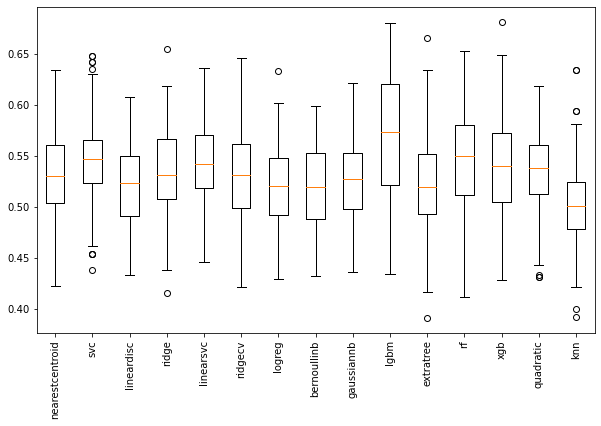

In [330]:
algoritmos = ['nearestcentroid', 'svc', 'lineardisc','ridge','linearsvc','ridgecv','logreg','bernoullinb','gaussiannb','lgbm','extratree','rf','xgb','quadratic','knn']
resultados = [scores1,scores2,scores3,scores4,scores5,scores6,scores7,scores8,scores9,scores10,scores11,scores12,scores13,scores14,scores15]
# Comparando as performances nos conjunto de treinament/validacao
plt.figure(figsize=(10,6))
box_data = resultados
plt.boxplot(box_data, widths = 0.5)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], algoritmos, rotation='vertical')
# ax7.boxplot(box_data)
plt.show()